In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [10]:
df = pd.read_csv("finaldata.csv", index_col = False)
df = df.drop(["FractionalIncrease", "High", "Low", "Positive"],axis=1)
df = df.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Delta"], axis=1), df["Delta"], test_size=0.20, random_state=4)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [11]:
df

,Open,Delta,ReuterCredit,reuter_score,InvestCredit,invest_score,FoolCredit,fool_score,CnbcCredit,cnbc_score,MarketCredit,market_score
0,778.550,-4.060,0.973861,0.378063,0.976303,0.911567,0.973861,0.996175,0.972168,0.970089,0.976303,0.974950
1,792.950,14.400,0.949589,0.776000,0.931008,0.873125,0.945323,0.995257,0.947928,0.745560,0.947762,0.328733
2,817.360,24.410,0.945488,0.468813,0.937707,0.959300,0.945956,0.988333,0.936020,0.936578,0.950255,0.000000
3,809.100,-8.260,0.958241,0.093980,0.950460,0.982900,0.953223,0.994040,0.958978,0.957580,0.959143,0.000000
4,802.330,-6.770,0.968660,0.634683,0.957466,0.952050,0.961919,0.992733,0.971298,0.985720,0.969111,0.990033
5,807.500,5.170,0.971340,0.520433,0.961143,0.963560,0.970175,0.994886,0.971668,0.970120,0.973771,0.827050
6,828.380,20.880,0.951983,0.970550,0.950226,0.875420,0.951400,0.975860,0.955913,0.707400,0.954343,0.572450
7,829.000,0.620,0.958883,0.427571,0.957756,0.981425,0.958249,0.964033,0.961983,0.851680,0.960198,0.950140
8,859.050,30.050,0.955338,0.360867,0.949628,0.968350,0.954678,0.980267,0.958023,0.317280,0.956130,0.595620
9,815.000,-44.050,0.945884,0.240483,0.946424,0.988067,0.945554,0.991900,0.948000,0.508890,0.946853,0.501175


In [12]:
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               6144      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 269,313
Trainable params: 269,313
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam = Adam(lr=0.1)
model.compile(loss='mean_squared_error',
 optimizer='adam',
 metrics=['mse'])

In [15]:
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=10000,
 verbose=1,
 validation_split=0.1)

Train on 216 samples, validate on 24 samples
Epoch 1/10000
216/216 [==============================] - 0s 1ms/step - loss: 1282.5437 - mean_squared_error: 1282.5437 - val_loss: 526.1547 - val_mean_squared_error: 526.1547
Epoch 2/10000
216/216 [==============================] - 0s 47us/step - loss: 332.6983 - mean_squared_error: 332.6983 - val_loss: 883.9815 - val_mean_squared_error: 883.9815
Epoch 3/10000
216/216 [==============================] - 0s 46us/step - loss: 879.5743 - mean_squared_error: 879.5743 - val_loss: 402.5476 - val_mean_squared_error: 402.5476
Epoch 4/10000
216/216 [==============================] - 0s 44us/step - loss: 257.5306 - mean_squared_error: 257.5306 - val_loss: 321.4685 - val_mean_squared_error: 321.4685
Epoch 5/10000
216/216 [==============================] - 0s 47us/step - loss: 390.8978 - mean_squared_error: 390.8978 - val_loss: 594.7402 - val_mean_squared_error: 594.7402
Epoch 6/10000
216/216 [==============================] - 0s 48us/step - loss: 374.96

Epoch 48/10000
216/216 [==============================] - 0s 43us/step - loss: 148.0792 - mean_squared_error: 148.0792 - val_loss: 88.2144 - val_mean_squared_error: 88.2144
Epoch 49/10000
216/216 [==============================] - 0s 44us/step - loss: 105.1322 - mean_squared_error: 105.1322 - val_loss: 79.7658 - val_mean_squared_error: 79.7658
Epoch 50/10000
216/216 [==============================] - 0s 40us/step - loss: 110.4320 - mean_squared_error: 110.4320 - val_loss: 79.3676 - val_mean_squared_error: 79.3676
Epoch 51/10000
216/216 [==============================] - 0s 43us/step - loss: 133.8850 - mean_squared_error: 133.8850 - val_loss: 82.1656 - val_mean_squared_error: 82.1656
Epoch 52/10000
216/216 [==============================] - 0s 38us/step - loss: 101.0687 - mean_squared_error: 101.0687 - val_loss: 81.0910 - val_mean_squared_error: 81.0910
Epoch 53/10000
216/216 [==============================] - 0s 43us/step - loss: 128.1557 - mean_squared_error: 128.1557 - val_loss: 79.3

216/216 [==============================] - 0s 48us/step - loss: 112.5615 - mean_squared_error: 112.5615 - val_loss: 82.9592 - val_mean_squared_error: 82.9592
Epoch 96/10000
216/216 [==============================] - 0s 52us/step - loss: 100.5611 - mean_squared_error: 100.5611 - val_loss: 80.7369 - val_mean_squared_error: 80.7369
Epoch 97/10000
216/216 [==============================] - 0s 53us/step - loss: 99.5610 - mean_squared_error: 99.5610 - val_loss: 88.0147 - val_mean_squared_error: 88.0147
Epoch 98/10000
216/216 [==============================] - 0s 47us/step - loss: 132.4760 - mean_squared_error: 132.4760 - val_loss: 79.4914 - val_mean_squared_error: 79.4914
Epoch 99/10000
216/216 [==============================] - 0s 41us/step - loss: 93.4635 - mean_squared_error: 93.4635 - val_loss: 77.9869 - val_mean_squared_error: 77.9869
Epoch 100/10000
216/216 [==============================] - 0s 41us/step - loss: 111.4251 - mean_squared_error: 111.4251 - val_loss: 81.0819 - val_mean_squ

216/216 [==============================] - 0s 38us/step - loss: 105.3300 - mean_squared_error: 105.3300 - val_loss: 78.2644 - val_mean_squared_error: 78.2644
Epoch 143/10000
216/216 [==============================] - 0s 41us/step - loss: 101.8006 - mean_squared_error: 101.8006 - val_loss: 78.1621 - val_mean_squared_error: 78.1621
Epoch 144/10000
216/216 [==============================] - 0s 46us/step - loss: 98.0239 - mean_squared_error: 98.0239 - val_loss: 77.9414 - val_mean_squared_error: 77.9414
Epoch 145/10000
216/216 [==============================] - 0s 46us/step - loss: 102.3194 - mean_squared_error: 102.3194 - val_loss: 77.8677 - val_mean_squared_error: 77.8677
Epoch 146/10000
216/216 [==============================] - 0s 45us/step - loss: 101.2475 - mean_squared_error: 101.2475 - val_loss: 77.9975 - val_mean_squared_error: 77.9975
Epoch 147/10000
216/216 [==============================] - 0s 44us/step - loss: 102.6401 - mean_squared_error: 102.6401 - val_loss: 78.1888 - val_me

216/216 [==============================] - 0s 49us/step - loss: 98.0621 - mean_squared_error: 98.0621 - val_loss: 80.5617 - val_mean_squared_error: 80.5617
Epoch 190/10000
216/216 [==============================] - 0s 45us/step - loss: 91.9091 - mean_squared_error: 91.9091 - val_loss: 77.9701 - val_mean_squared_error: 77.9701
Epoch 191/10000
216/216 [==============================] - 0s 44us/step - loss: 103.9886 - mean_squared_error: 103.9886 - val_loss: 78.1524 - val_mean_squared_error: 78.1524
Epoch 192/10000
216/216 [==============================] - 0s 44us/step - loss: 102.4992 - mean_squared_error: 102.4992 - val_loss: 79.5590 - val_mean_squared_error: 79.5590
Epoch 193/10000
216/216 [==============================] - 0s 47us/step - loss: 105.2517 - mean_squared_error: 105.2517 - val_loss: 78.6246 - val_mean_squared_error: 78.6246
Epoch 194/10000
216/216 [==============================] - 0s 43us/step - loss: 105.9960 - mean_squared_error: 105.9960 - val_loss: 77.9403 - val_mean

216/216 [==============================] - 0s 37us/step - loss: 110.1511 - mean_squared_error: 110.1511 - val_loss: 78.5386 - val_mean_squared_error: 78.5386
Epoch 237/10000
216/216 [==============================] - 0s 37us/step - loss: 97.9008 - mean_squared_error: 97.9008 - val_loss: 80.9265 - val_mean_squared_error: 80.9265
Epoch 238/10000
216/216 [==============================] - 0s 37us/step - loss: 90.4781 - mean_squared_error: 90.4781 - val_loss: 80.0577 - val_mean_squared_error: 80.0577
Epoch 239/10000
216/216 [==============================] - 0s 38us/step - loss: 101.9179 - mean_squared_error: 101.9179 - val_loss: 77.8727 - val_mean_squared_error: 77.8727
Epoch 240/10000
216/216 [==============================] - 0s 40us/step - loss: 104.6611 - mean_squared_error: 104.6611 - val_loss: 77.7877 - val_mean_squared_error: 77.7877
Epoch 241/10000
216/216 [==============================] - 0s 42us/step - loss: 93.2792 - mean_squared_error: 93.2792 - val_loss: 78.2895 - val_mean_s

216/216 [==============================] - 0s 43us/step - loss: 94.5925 - mean_squared_error: 94.5925 - val_loss: 77.8776 - val_mean_squared_error: 77.8776
Epoch 284/10000
216/216 [==============================] - 0s 51us/step - loss: 89.5161 - mean_squared_error: 89.5161 - val_loss: 78.2399 - val_mean_squared_error: 78.2399
Epoch 285/10000
216/216 [==============================] - 0s 45us/step - loss: 101.3212 - mean_squared_error: 101.3212 - val_loss: 77.8975 - val_mean_squared_error: 77.8975
Epoch 286/10000
216/216 [==============================] - 0s 41us/step - loss: 95.0718 - mean_squared_error: 95.0718 - val_loss: 78.0127 - val_mean_squared_error: 78.0127
Epoch 287/10000
216/216 [==============================] - 0s 44us/step - loss: 101.8287 - mean_squared_error: 101.8287 - val_loss: 78.7925 - val_mean_squared_error: 78.7925
Epoch 288/10000
216/216 [==============================] - 0s 46us/step - loss: 99.6215 - mean_squared_error: 99.6215 - val_loss: 78.4029 - val_mean_squ

216/216 [==============================] - 0s 38us/step - loss: 90.4419 - mean_squared_error: 90.4419 - val_loss: 78.3737 - val_mean_squared_error: 78.3737
Epoch 331/10000
216/216 [==============================] - 0s 38us/step - loss: 102.2777 - mean_squared_error: 102.2777 - val_loss: 77.9668 - val_mean_squared_error: 77.9668
Epoch 332/10000
216/216 [==============================] - 0s 38us/step - loss: 89.0793 - mean_squared_error: 89.0793 - val_loss: 77.8599 - val_mean_squared_error: 77.8599
Epoch 333/10000
216/216 [==============================] - 0s 41us/step - loss: 100.8258 - mean_squared_error: 100.8258 - val_loss: 77.8142 - val_mean_squared_error: 77.8142
Epoch 334/10000
216/216 [==============================] - 0s 39us/step - loss: 95.2973 - mean_squared_error: 95.2973 - val_loss: 78.5411 - val_mean_squared_error: 78.5411
Epoch 335/10000
216/216 [==============================] - 0s 38us/step - loss: 96.9904 - mean_squared_error: 96.9904 - val_loss: 80.0993 - val_mean_squ

216/216 [==============================] - 0s 40us/step - loss: 93.6678 - mean_squared_error: 93.6678 - val_loss: 77.8150 - val_mean_squared_error: 77.8150
Epoch 378/10000
216/216 [==============================] - 0s 40us/step - loss: 102.7515 - mean_squared_error: 102.7515 - val_loss: 77.8997 - val_mean_squared_error: 77.8997
Epoch 379/10000
216/216 [==============================] - 0s 46us/step - loss: 103.3886 - mean_squared_error: 103.3886 - val_loss: 78.0034 - val_mean_squared_error: 78.0034
Epoch 380/10000
216/216 [==============================] - 0s 47us/step - loss: 97.3792 - mean_squared_error: 97.3792 - val_loss: 77.8066 - val_mean_squared_error: 77.8066
Epoch 381/10000
216/216 [==============================] - 0s 44us/step - loss: 92.3239 - mean_squared_error: 92.3239 - val_loss: 78.2972 - val_mean_squared_error: 78.2972
Epoch 382/10000
216/216 [==============================] - 0s 46us/step - loss: 95.2220 - mean_squared_error: 95.2220 - val_loss: 79.4885 - val_mean_squ

216/216 [==============================] - 0s 44us/step - loss: 99.9409 - mean_squared_error: 99.9409 - val_loss: 80.5768 - val_mean_squared_error: 80.5768
Epoch 425/10000
216/216 [==============================] - 0s 41us/step - loss: 96.7045 - mean_squared_error: 96.7045 - val_loss: 79.0121 - val_mean_squared_error: 79.0121
Epoch 426/10000
216/216 [==============================] - 0s 41us/step - loss: 97.5528 - mean_squared_error: 97.5528 - val_loss: 77.9242 - val_mean_squared_error: 77.9242
Epoch 427/10000
216/216 [==============================] - 0s 45us/step - loss: 97.6491 - mean_squared_error: 97.6491 - val_loss: 78.2257 - val_mean_squared_error: 78.2257
Epoch 428/10000
216/216 [==============================] - 0s 44us/step - loss: 94.8815 - mean_squared_error: 94.8815 - val_loss: 78.7002 - val_mean_squared_error: 78.7002
Epoch 429/10000
216/216 [==============================] - 0s 48us/step - loss: 94.5712 - mean_squared_error: 94.5712 - val_loss: 78.6507 - val_mean_squared

216/216 [==============================] - 0s 39us/step - loss: 100.7016 - mean_squared_error: 100.7016 - val_loss: 77.8821 - val_mean_squared_error: 77.8821
Epoch 472/10000
216/216 [==============================] - 0s 45us/step - loss: 95.1215 - mean_squared_error: 95.1215 - val_loss: 77.9864 - val_mean_squared_error: 77.9864
Epoch 473/10000
216/216 [==============================] - 0s 42us/step - loss: 101.1072 - mean_squared_error: 101.1072 - val_loss: 77.8098 - val_mean_squared_error: 77.8098
Epoch 474/10000
216/216 [==============================] - 0s 40us/step - loss: 94.4166 - mean_squared_error: 94.4166 - val_loss: 77.8025 - val_mean_squared_error: 77.8025
Epoch 475/10000
216/216 [==============================] - 0s 45us/step - loss: 97.1306 - mean_squared_error: 97.1306 - val_loss: 77.8350 - val_mean_squared_error: 77.8350
Epoch 476/10000
216/216 [==============================] - 0s 41us/step - loss: 98.9837 - mean_squared_error: 98.9837 - val_loss: 77.8910 - val_mean_squ

216/216 [==============================] - 0s 44us/step - loss: 95.1802 - mean_squared_error: 95.1802 - val_loss: 77.8109 - val_mean_squared_error: 77.8109
Epoch 519/10000
216/216 [==============================] - 0s 41us/step - loss: 98.0973 - mean_squared_error: 98.0973 - val_loss: 77.8633 - val_mean_squared_error: 77.8633
Epoch 520/10000
216/216 [==============================] - 0s 44us/step - loss: 93.9596 - mean_squared_error: 93.9596 - val_loss: 78.1332 - val_mean_squared_error: 78.1332
Epoch 521/10000
216/216 [==============================] - 0s 45us/step - loss: 92.3317 - mean_squared_error: 92.3317 - val_loss: 78.3187 - val_mean_squared_error: 78.3187
Epoch 522/10000
216/216 [==============================] - 0s 47us/step - loss: 96.5086 - mean_squared_error: 96.5086 - val_loss: 78.2251 - val_mean_squared_error: 78.2251
Epoch 523/10000
216/216 [==============================] - 0s 43us/step - loss: 96.7794 - mean_squared_error: 96.7794 - val_loss: 78.1057 - val_mean_squared

216/216 [==============================] - 0s 44us/step - loss: 100.1866 - mean_squared_error: 100.1866 - val_loss: 77.8663 - val_mean_squared_error: 77.8663
Epoch 566/10000
216/216 [==============================] - 0s 44us/step - loss: 99.8687 - mean_squared_error: 99.8687 - val_loss: 77.8057 - val_mean_squared_error: 77.8057
Epoch 567/10000
216/216 [==============================] - 0s 44us/step - loss: 97.4319 - mean_squared_error: 97.4319 - val_loss: 77.7839 - val_mean_squared_error: 77.7839
Epoch 568/10000
216/216 [==============================] - 0s 44us/step - loss: 95.0374 - mean_squared_error: 95.0374 - val_loss: 77.7827 - val_mean_squared_error: 77.7827
Epoch 569/10000
216/216 [==============================] - 0s 44us/step - loss: 92.1682 - mean_squared_error: 92.1682 - val_loss: 77.7258 - val_mean_squared_error: 77.7258
Epoch 570/10000
216/216 [==============================] - 0s 39us/step - loss: 100.3928 - mean_squared_error: 100.3928 - val_loss: 78.0084 - val_mean_squ

216/216 [==============================] - 0s 38us/step - loss: 93.4280 - mean_squared_error: 93.4280 - val_loss: 77.8583 - val_mean_squared_error: 77.8583
Epoch 613/10000
216/216 [==============================] - 0s 46us/step - loss: 101.4451 - mean_squared_error: 101.4451 - val_loss: 77.9035 - val_mean_squared_error: 77.9035
Epoch 614/10000
216/216 [==============================] - 0s 39us/step - loss: 104.1428 - mean_squared_error: 104.1428 - val_loss: 77.8619 - val_mean_squared_error: 77.8619
Epoch 615/10000
216/216 [==============================] - 0s 41us/step - loss: 101.8224 - mean_squared_error: 101.8224 - val_loss: 77.9288 - val_mean_squared_error: 77.9288
Epoch 616/10000
216/216 [==============================] - 0s 38us/step - loss: 96.4556 - mean_squared_error: 96.4556 - val_loss: 77.8965 - val_mean_squared_error: 77.8965
Epoch 617/10000
216/216 [==============================] - 0s 39us/step - loss: 93.7733 - mean_squared_error: 93.7733 - val_loss: 77.9557 - val_mean_s

216/216 [==============================] - 0s 41us/step - loss: 96.3494 - mean_squared_error: 96.3494 - val_loss: 77.9953 - val_mean_squared_error: 77.9953
Epoch 660/10000
216/216 [==============================] - 0s 42us/step - loss: 95.8416 - mean_squared_error: 95.8416 - val_loss: 78.0917 - val_mean_squared_error: 78.0917
Epoch 661/10000
216/216 [==============================] - 0s 41us/step - loss: 98.8834 - mean_squared_error: 98.8834 - val_loss: 78.2524 - val_mean_squared_error: 78.2524
Epoch 662/10000
216/216 [==============================] - 0s 40us/step - loss: 97.8307 - mean_squared_error: 97.8307 - val_loss: 78.4344 - val_mean_squared_error: 78.4344
Epoch 663/10000
216/216 [==============================] - 0s 39us/step - loss: 97.6636 - mean_squared_error: 97.6636 - val_loss: 78.5944 - val_mean_squared_error: 78.5944
Epoch 664/10000
216/216 [==============================] - 0s 40us/step - loss: 96.2526 - mean_squared_error: 96.2526 - val_loss: 78.3835 - val_mean_squared

Epoch 707/10000
216/216 [==============================] - 0s 42us/step - loss: 102.8136 - mean_squared_error: 102.8136 - val_loss: 77.8980 - val_mean_squared_error: 77.8980
Epoch 708/10000
216/216 [==============================] - 0s 44us/step - loss: 95.9565 - mean_squared_error: 95.9565 - val_loss: 78.1769 - val_mean_squared_error: 78.1769
Epoch 709/10000
216/216 [==============================] - 0s 47us/step - loss: 97.2693 - mean_squared_error: 97.2693 - val_loss: 78.6893 - val_mean_squared_error: 78.6893
Epoch 710/10000
216/216 [==============================] - 0s 45us/step - loss: 102.0666 - mean_squared_error: 102.0666 - val_loss: 79.0601 - val_mean_squared_error: 79.0601
Epoch 711/10000
216/216 [==============================] - 0s 44us/step - loss: 98.4126 - mean_squared_error: 98.4126 - val_loss: 78.9716 - val_mean_squared_error: 78.9716
Epoch 712/10000
216/216 [==============================] - 0s 44us/step - loss: 94.9527 - mean_squared_error: 94.9527 - val_loss: 78.629

216/216 [==============================] - 0s 38us/step - loss: 99.1217 - mean_squared_error: 99.1217 - val_loss: 77.8313 - val_mean_squared_error: 77.8313
Epoch 755/10000
216/216 [==============================] - 0s 40us/step - loss: 100.0358 - mean_squared_error: 100.0358 - val_loss: 77.8708 - val_mean_squared_error: 77.8708
Epoch 756/10000
216/216 [==============================] - 0s 39us/step - loss: 96.8451 - mean_squared_error: 96.8451 - val_loss: 78.0791 - val_mean_squared_error: 78.0791
Epoch 757/10000
216/216 [==============================] - 0s 40us/step - loss: 98.8938 - mean_squared_error: 98.8938 - val_loss: 78.6709 - val_mean_squared_error: 78.6709
Epoch 758/10000
216/216 [==============================] - 0s 41us/step - loss: 98.8859 - mean_squared_error: 98.8859 - val_loss: 78.8093 - val_mean_squared_error: 78.8093
Epoch 759/10000
216/216 [==============================] - 0s 40us/step - loss: 98.5548 - mean_squared_error: 98.5548 - val_loss: 78.7923 - val_mean_squar

216/216 [==============================] - 0s 51us/step - loss: 98.2453 - mean_squared_error: 98.2453 - val_loss: 78.1218 - val_mean_squared_error: 78.1218
Epoch 802/10000
216/216 [==============================] - 0s 46us/step - loss: 93.9594 - mean_squared_error: 93.9594 - val_loss: 78.2330 - val_mean_squared_error: 78.2330
Epoch 803/10000
216/216 [==============================] - 0s 44us/step - loss: 97.5773 - mean_squared_error: 97.5773 - val_loss: 78.2786 - val_mean_squared_error: 78.2786
Epoch 804/10000
216/216 [==============================] - 0s 45us/step - loss: 96.0802 - mean_squared_error: 96.0802 - val_loss: 78.3609 - val_mean_squared_error: 78.3609
Epoch 805/10000
216/216 [==============================] - 0s 45us/step - loss: 99.5088 - mean_squared_error: 99.5088 - val_loss: 78.0296 - val_mean_squared_error: 78.0296
Epoch 806/10000
216/216 [==============================] - 0s 44us/step - loss: 97.2313 - mean_squared_error: 97.2313 - val_loss: 77.8377 - val_mean_squared

216/216 [==============================] - 0s 47us/step - loss: 95.3107 - mean_squared_error: 95.3107 - val_loss: 77.8284 - val_mean_squared_error: 77.8284
Epoch 849/10000
216/216 [==============================] - 0s 48us/step - loss: 96.7734 - mean_squared_error: 96.7734 - val_loss: 77.8281 - val_mean_squared_error: 77.8281
Epoch 850/10000
216/216 [==============================] - 0s 48us/step - loss: 96.7102 - mean_squared_error: 96.7102 - val_loss: 77.9488 - val_mean_squared_error: 77.9488
Epoch 851/10000
216/216 [==============================] - 0s 47us/step - loss: 98.7611 - mean_squared_error: 98.7611 - val_loss: 78.0593 - val_mean_squared_error: 78.0593
Epoch 852/10000
216/216 [==============================] - 0s 48us/step - loss: 98.6468 - mean_squared_error: 98.6468 - val_loss: 78.1435 - val_mean_squared_error: 78.1435
Epoch 853/10000
216/216 [==============================] - 0s 54us/step - loss: 96.5511 - mean_squared_error: 96.5511 - val_loss: 78.0899 - val_mean_squared

Epoch 896/10000
216/216 [==============================] - 0s 52us/step - loss: 95.9049 - mean_squared_error: 95.9049 - val_loss: 77.8163 - val_mean_squared_error: 77.8163
Epoch 897/10000
216/216 [==============================] - 0s 48us/step - loss: 96.3742 - mean_squared_error: 96.3742 - val_loss: 77.8853 - val_mean_squared_error: 77.8853
Epoch 898/10000
216/216 [==============================] - 0s 50us/step - loss: 97.6518 - mean_squared_error: 97.6518 - val_loss: 77.9614 - val_mean_squared_error: 77.9614
Epoch 899/10000
216/216 [==============================] - 0s 49us/step - loss: 95.8369 - mean_squared_error: 95.8369 - val_loss: 78.0184 - val_mean_squared_error: 78.0184
Epoch 900/10000
216/216 [==============================] - 0s 51us/step - loss: 94.3198 - mean_squared_error: 94.3198 - val_loss: 77.9504 - val_mean_squared_error: 77.9504
Epoch 901/10000
216/216 [==============================] - 0s 62us/step - loss: 96.3498 - mean_squared_error: 96.3498 - val_loss: 77.9079 - 

216/216 [==============================] - 0s 48us/step - loss: 95.8760 - mean_squared_error: 95.8760 - val_loss: 77.8986 - val_mean_squared_error: 77.8986
Epoch 944/10000
216/216 [==============================] - 0s 51us/step - loss: 96.8216 - mean_squared_error: 96.8216 - val_loss: 77.8492 - val_mean_squared_error: 77.8492
Epoch 945/10000
216/216 [==============================] - 0s 49us/step - loss: 95.8289 - mean_squared_error: 95.8289 - val_loss: 77.7952 - val_mean_squared_error: 77.7952
Epoch 946/10000
216/216 [==============================] - 0s 57us/step - loss: 97.4338 - mean_squared_error: 97.4338 - val_loss: 77.8695 - val_mean_squared_error: 77.8695
Epoch 947/10000
216/216 [==============================] - 0s 50us/step - loss: 102.9366 - mean_squared_error: 102.9366 - val_loss: 77.9100 - val_mean_squared_error: 77.9100
Epoch 948/10000
216/216 [==============================] - 0s 52us/step - loss: 99.2434 - mean_squared_error: 99.2434 - val_loss: 78.0588 - val_mean_squar

Epoch 991/10000
216/216 [==============================] - 0s 45us/step - loss: 97.4603 - mean_squared_error: 97.4603 - val_loss: 77.8116 - val_mean_squared_error: 77.8116
Epoch 992/10000
216/216 [==============================] - 0s 51us/step - loss: 100.5571 - mean_squared_error: 100.5571 - val_loss: 77.8000 - val_mean_squared_error: 77.8000
Epoch 993/10000
216/216 [==============================] - 0s 44us/step - loss: 97.0875 - mean_squared_error: 97.0875 - val_loss: 77.7883 - val_mean_squared_error: 77.7883
Epoch 994/10000
216/216 [==============================] - 0s 46us/step - loss: 96.4145 - mean_squared_error: 96.4145 - val_loss: 77.7996 - val_mean_squared_error: 77.7996
Epoch 995/10000
216/216 [==============================] - 0s 46us/step - loss: 96.6888 - mean_squared_error: 96.6888 - val_loss: 77.7873 - val_mean_squared_error: 77.7873
Epoch 996/10000
216/216 [==============================] - 0s 46us/step - loss: 99.4731 - mean_squared_error: 99.4731 - val_loss: 77.7272 

216/216 [==============================] - 0s 51us/step - loss: 95.4361 - mean_squared_error: 95.4361 - val_loss: 77.8631 - val_mean_squared_error: 77.8631
Epoch 1039/10000
216/216 [==============================] - 0s 48us/step - loss: 95.0382 - mean_squared_error: 95.0382 - val_loss: 77.9911 - val_mean_squared_error: 77.9911
Epoch 1040/10000
216/216 [==============================] - 0s 44us/step - loss: 95.8547 - mean_squared_error: 95.8547 - val_loss: 78.0393 - val_mean_squared_error: 78.0393
Epoch 1041/10000
216/216 [==============================] - 0s 45us/step - loss: 96.2551 - mean_squared_error: 96.2551 - val_loss: 78.0869 - val_mean_squared_error: 78.0869
Epoch 1042/10000
216/216 [==============================] - 0s 49us/step - loss: 96.2658 - mean_squared_error: 96.2658 - val_loss: 78.0112 - val_mean_squared_error: 78.0112
Epoch 1043/10000
216/216 [==============================] - 0s 46us/step - loss: 95.7357 - mean_squared_error: 95.7357 - val_loss: 77.9260 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 96.2886 - mean_squared_error: 96.2886 - val_loss: 77.9370 - val_mean_squared_error: 77.9370
Epoch 1086/10000
216/216 [==============================] - 0s 49us/step - loss: 92.1752 - mean_squared_error: 92.1752 - val_loss: 77.8987 - val_mean_squared_error: 77.8987
Epoch 1087/10000
216/216 [==============================] - 0s 47us/step - loss: 97.2369 - mean_squared_error: 97.2369 - val_loss: 77.8903 - val_mean_squared_error: 77.8903
Epoch 1088/10000
216/216 [==============================] - 0s 50us/step - loss: 95.7882 - mean_squared_error: 95.7882 - val_loss: 77.8134 - val_mean_squared_error: 77.8134
Epoch 1089/10000
216/216 [==============================] - 0s 47us/step - loss: 94.9298 - mean_squared_error: 94.9298 - val_loss: 77.8096 - val_mean_squared_error: 77.8096
Epoch 1090/10000
216/216 [==============================] - 0s 53us/step - loss: 96.0827 - mean_squared_error: 96.0827 - val_loss: 77.8523 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 95.2992 - mean_squared_error: 95.2992 - val_loss: 77.8204 - val_mean_squared_error: 77.8204
Epoch 1133/10000
216/216 [==============================] - 0s 54us/step - loss: 97.0979 - mean_squared_error: 97.0979 - val_loss: 77.7836 - val_mean_squared_error: 77.7836
Epoch 1134/10000
216/216 [==============================] - 0s 53us/step - loss: 95.5524 - mean_squared_error: 95.5524 - val_loss: 77.7886 - val_mean_squared_error: 77.7886
Epoch 1135/10000
216/216 [==============================] - 0s 48us/step - loss: 98.1680 - mean_squared_error: 98.1680 - val_loss: 77.8158 - val_mean_squared_error: 77.8158
Epoch 1136/10000
216/216 [==============================] - 0s 52us/step - loss: 98.1742 - mean_squared_error: 98.1742 - val_loss: 77.8512 - val_mean_squared_error: 77.8512
Epoch 1137/10000
216/216 [==============================] - 0s 51us/step - loss: 101.8277 - mean_squared_error: 101.8277 - val_loss: 77.9368 - val_mean_

216/216 [==============================] - 0s 45us/step - loss: 95.3971 - mean_squared_error: 95.3971 - val_loss: 77.7203 - val_mean_squared_error: 77.7203
Epoch 1180/10000
216/216 [==============================] - 0s 47us/step - loss: 96.3590 - mean_squared_error: 96.3590 - val_loss: 78.0861 - val_mean_squared_error: 78.0861
Epoch 1181/10000
216/216 [==============================] - 0s 52us/step - loss: 98.6189 - mean_squared_error: 98.6189 - val_loss: 79.0342 - val_mean_squared_error: 79.0342
Epoch 1182/10000
216/216 [==============================] - 0s 49us/step - loss: 99.7110 - mean_squared_error: 99.7110 - val_loss: 78.7929 - val_mean_squared_error: 78.7929
Epoch 1183/10000
216/216 [==============================] - 0s 50us/step - loss: 96.9722 - mean_squared_error: 96.9722 - val_loss: 78.1355 - val_mean_squared_error: 78.1355
Epoch 1184/10000
216/216 [==============================] - 0s 48us/step - loss: 95.9497 - mean_squared_error: 95.9497 - val_loss: 77.9305 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 96.3549 - mean_squared_error: 96.3549 - val_loss: 77.8759 - val_mean_squared_error: 77.8759
Epoch 1227/10000
216/216 [==============================] - 0s 48us/step - loss: 94.2494 - mean_squared_error: 94.2494 - val_loss: 77.9180 - val_mean_squared_error: 77.9180
Epoch 1228/10000
216/216 [==============================] - 0s 43us/step - loss: 95.6137 - mean_squared_error: 95.6137 - val_loss: 77.8860 - val_mean_squared_error: 77.8860
Epoch 1229/10000
216/216 [==============================] - 0s 46us/step - loss: 98.1206 - mean_squared_error: 98.1206 - val_loss: 77.8166 - val_mean_squared_error: 77.8166
Epoch 1230/10000
216/216 [==============================] - 0s 47us/step - loss: 97.2103 - mean_squared_error: 97.2103 - val_loss: 77.7568 - val_mean_squared_error: 77.7568
Epoch 1231/10000
216/216 [==============================] - 0s 46us/step - loss: 96.4777 - mean_squared_error: 96.4777 - val_loss: 77.8235 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 97.9680 - mean_squared_error: 97.9680 - val_loss: 78.1522 - val_mean_squared_error: 78.1522
Epoch 1274/10000
216/216 [==============================] - 0s 46us/step - loss: 96.8250 - mean_squared_error: 96.8250 - val_loss: 78.2749 - val_mean_squared_error: 78.2749
Epoch 1275/10000
216/216 [==============================] - 0s 51us/step - loss: 97.0729 - mean_squared_error: 97.0729 - val_loss: 77.9999 - val_mean_squared_error: 77.9999
Epoch 1276/10000
216/216 [==============================] - 0s 46us/step - loss: 100.0381 - mean_squared_error: 100.0381 - val_loss: 77.9110 - val_mean_squared_error: 77.9110
Epoch 1277/10000
216/216 [==============================] - 0s 45us/step - loss: 94.3706 - mean_squared_error: 94.3706 - val_loss: 77.7196 - val_mean_squared_error: 77.7196
Epoch 1278/10000
216/216 [==============================] - 0s 44us/step - loss: 96.0070 - mean_squared_error: 96.0070 - val_loss: 77.6682 - val_mean_

216/216 [==============================] - 0s 49us/step - loss: 94.3569 - mean_squared_error: 94.3569 - val_loss: 77.4176 - val_mean_squared_error: 77.4176
Epoch 1321/10000
216/216 [==============================] - 0s 45us/step - loss: 97.5417 - mean_squared_error: 97.5417 - val_loss: 77.4122 - val_mean_squared_error: 77.4122
Epoch 1322/10000
216/216 [==============================] - 0s 45us/step - loss: 97.3725 - mean_squared_error: 97.3725 - val_loss: 77.4901 - val_mean_squared_error: 77.4901
Epoch 1323/10000
216/216 [==============================] - 0s 50us/step - loss: 99.7499 - mean_squared_error: 99.7499 - val_loss: 77.4657 - val_mean_squared_error: 77.4657
Epoch 1324/10000
216/216 [==============================] - 0s 48us/step - loss: 97.9560 - mean_squared_error: 97.9560 - val_loss: 77.4264 - val_mean_squared_error: 77.4264
Epoch 1325/10000
216/216 [==============================] - 0s 44us/step - loss: 94.5246 - mean_squared_error: 94.5246 - val_loss: 77.7160 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 95.9584 - mean_squared_error: 95.9584 - val_loss: 77.6052 - val_mean_squared_error: 77.6052
Epoch 1368/10000
216/216 [==============================] - 0s 45us/step - loss: 96.2020 - mean_squared_error: 96.2020 - val_loss: 77.6148 - val_mean_squared_error: 77.6148
Epoch 1369/10000
216/216 [==============================] - 0s 47us/step - loss: 97.2347 - mean_squared_error: 97.2347 - val_loss: 77.5847 - val_mean_squared_error: 77.5847
Epoch 1370/10000
216/216 [==============================] - 0s 52us/step - loss: 96.8752 - mean_squared_error: 96.8752 - val_loss: 77.4906 - val_mean_squared_error: 77.4906
Epoch 1371/10000
216/216 [==============================] - 0s 46us/step - loss: 96.8234 - mean_squared_error: 96.8234 - val_loss: 77.4943 - val_mean_squared_error: 77.4943
Epoch 1372/10000
216/216 [==============================] - 0s 48us/step - loss: 98.5033 - mean_squared_error: 98.5033 - val_loss: 77.5475 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 97.7164 - mean_squared_error: 97.7164 - val_loss: 77.5470 - val_mean_squared_error: 77.5470
Epoch 1415/10000
216/216 [==============================] - 0s 44us/step - loss: 99.0851 - mean_squared_error: 99.0851 - val_loss: 77.4649 - val_mean_squared_error: 77.4649
Epoch 1416/10000
216/216 [==============================] - 0s 42us/step - loss: 95.3975 - mean_squared_error: 95.3975 - val_loss: 77.2421 - val_mean_squared_error: 77.2421
Epoch 1417/10000
216/216 [==============================] - 0s 43us/step - loss: 98.5801 - mean_squared_error: 98.5801 - val_loss: 77.1995 - val_mean_squared_error: 77.1995
Epoch 1418/10000
216/216 [==============================] - 0s 41us/step - loss: 96.5278 - mean_squared_error: 96.5278 - val_loss: 77.2277 - val_mean_squared_error: 77.2277
Epoch 1419/10000
216/216 [==============================] - 0s 40us/step - loss: 98.0793 - mean_squared_error: 98.0793 - val_loss: 77.2784 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 95.6703 - mean_squared_error: 95.6703 - val_loss: 77.7278 - val_mean_squared_error: 77.7278
Epoch 1462/10000
216/216 [==============================] - 0s 51us/step - loss: 96.1851 - mean_squared_error: 96.1851 - val_loss: 77.8201 - val_mean_squared_error: 77.8201
Epoch 1463/10000
216/216 [==============================] - 0s 48us/step - loss: 97.9622 - mean_squared_error: 97.9622 - val_loss: 77.3612 - val_mean_squared_error: 77.3612
Epoch 1464/10000
216/216 [==============================] - 0s 49us/step - loss: 99.9326 - mean_squared_error: 99.9326 - val_loss: 77.2426 - val_mean_squared_error: 77.2426
Epoch 1465/10000
216/216 [==============================] - 0s 47us/step - loss: 99.8665 - mean_squared_error: 99.8665 - val_loss: 77.6675 - val_mean_squared_error: 77.6675
Epoch 1466/10000
216/216 [==============================] - 0s 44us/step - loss: 95.1425 - mean_squared_error: 95.1425 - val_loss: 77.5802 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 96.4280 - mean_squared_error: 96.4280 - val_loss: 77.4530 - val_mean_squared_error: 77.4530
Epoch 1509/10000
216/216 [==============================] - 0s 48us/step - loss: 95.2100 - mean_squared_error: 95.2100 - val_loss: 77.1889 - val_mean_squared_error: 77.1889
Epoch 1510/10000
216/216 [==============================] - 0s 46us/step - loss: 97.1393 - mean_squared_error: 97.1393 - val_loss: 77.1105 - val_mean_squared_error: 77.1105
Epoch 1511/10000
216/216 [==============================] - 0s 45us/step - loss: 94.3239 - mean_squared_error: 94.3239 - val_loss: 77.1135 - val_mean_squared_error: 77.1135
Epoch 1512/10000
216/216 [==============================] - 0s 48us/step - loss: 94.5331 - mean_squared_error: 94.5331 - val_loss: 77.1201 - val_mean_squared_error: 77.1201
Epoch 1513/10000
216/216 [==============================] - 0s 51us/step - loss: 97.2819 - mean_squared_error: 97.2819 - val_loss: 77.0721 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 94.9342 - mean_squared_error: 94.9342 - val_loss: 76.7201 - val_mean_squared_error: 76.7201
Epoch 1556/10000
216/216 [==============================] - 0s 50us/step - loss: 93.3930 - mean_squared_error: 93.3930 - val_loss: 76.7180 - val_mean_squared_error: 76.7180
Epoch 1557/10000
216/216 [==============================] - 0s 47us/step - loss: 97.6207 - mean_squared_error: 97.6207 - val_loss: 76.8578 - val_mean_squared_error: 76.8578
Epoch 1558/10000
216/216 [==============================] - 0s 47us/step - loss: 93.1268 - mean_squared_error: 93.1268 - val_loss: 76.8260 - val_mean_squared_error: 76.8260
Epoch 1559/10000
216/216 [==============================] - 0s 47us/step - loss: 94.1442 - mean_squared_error: 94.1442 - val_loss: 76.6261 - val_mean_squared_error: 76.6261
Epoch 1560/10000
216/216 [==============================] - 0s 46us/step - loss: 96.1811 - mean_squared_error: 96.1811 - val_loss: 76.5654 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 94.2641 - mean_squared_error: 94.2641 - val_loss: 77.1181 - val_mean_squared_error: 77.1181
Epoch 1603/10000
216/216 [==============================] - 0s 47us/step - loss: 96.3047 - mean_squared_error: 96.3047 - val_loss: 77.2677 - val_mean_squared_error: 77.2677
Epoch 1604/10000
216/216 [==============================] - 0s 46us/step - loss: 96.0753 - mean_squared_error: 96.0753 - val_loss: 77.4589 - val_mean_squared_error: 77.4589
Epoch 1605/10000
216/216 [==============================] - 0s 51us/step - loss: 95.8986 - mean_squared_error: 95.8986 - val_loss: 76.9222 - val_mean_squared_error: 76.9222
Epoch 1606/10000
216/216 [==============================] - 0s 48us/step - loss: 97.6413 - mean_squared_error: 97.6413 - val_loss: 76.6161 - val_mean_squared_error: 76.6161
Epoch 1607/10000
216/216 [==============================] - 0s 48us/step - loss: 93.8397 - mean_squared_error: 93.8397 - val_loss: 76.5902 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 95.1452 - mean_squared_error: 95.1452 - val_loss: 76.3292 - val_mean_squared_error: 76.3292
Epoch 1650/10000
216/216 [==============================] - 0s 50us/step - loss: 97.7060 - mean_squared_error: 97.7060 - val_loss: 76.7225 - val_mean_squared_error: 76.7225
Epoch 1651/10000
216/216 [==============================] - 0s 46us/step - loss: 99.6481 - mean_squared_error: 99.6481 - val_loss: 76.7978 - val_mean_squared_error: 76.7978
Epoch 1652/10000
216/216 [==============================] - 0s 48us/step - loss: 95.6619 - mean_squared_error: 95.6619 - val_loss: 76.1864 - val_mean_squared_error: 76.1864
Epoch 1653/10000
216/216 [==============================] - 0s 47us/step - loss: 93.8053 - mean_squared_error: 93.8053 - val_loss: 75.8956 - val_mean_squared_error: 75.8956
Epoch 1654/10000
216/216 [==============================] - 0s 49us/step - loss: 95.3847 - mean_squared_error: 95.3847 - val_loss: 75.8444 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 100.5065 - mean_squared_error: 100.5065 - val_loss: 75.1172 - val_mean_squared_error: 75.1172
Epoch 1697/10000
216/216 [==============================] - 0s 43us/step - loss: 99.0378 - mean_squared_error: 99.0378 - val_loss: 75.6408 - val_mean_squared_error: 75.6408
Epoch 1698/10000
216/216 [==============================] - 0s 42us/step - loss: 90.3108 - mean_squared_error: 90.3108 - val_loss: 76.4223 - val_mean_squared_error: 76.4223
Epoch 1699/10000
216/216 [==============================] - 0s 42us/step - loss: 100.9185 - mean_squared_error: 100.9185 - val_loss: 75.2381 - val_mean_squared_error: 75.2381
Epoch 1700/10000
216/216 [==============================] - 0s 42us/step - loss: 105.4281 - mean_squared_error: 105.4281 - val_loss: 75.3238 - val_mean_squared_error: 75.3238
Epoch 1701/10000
216/216 [==============================] - 0s 44us/step - loss: 98.6413 - mean_squared_error: 98.6413 - val_loss: 77.5547 - val_m

216/216 [==============================] - 0s 44us/step - loss: 96.9646 - mean_squared_error: 96.9646 - val_loss: 74.3023 - val_mean_squared_error: 74.3023
Epoch 1744/10000
216/216 [==============================] - 0s 44us/step - loss: 95.3895 - mean_squared_error: 95.3895 - val_loss: 74.1737 - val_mean_squared_error: 74.1737
Epoch 1745/10000
216/216 [==============================] - 0s 45us/step - loss: 95.1168 - mean_squared_error: 95.1168 - val_loss: 74.6483 - val_mean_squared_error: 74.6483
Epoch 1746/10000
216/216 [==============================] - 0s 42us/step - loss: 93.3617 - mean_squared_error: 93.3617 - val_loss: 74.3062 - val_mean_squared_error: 74.3062
Epoch 1747/10000
216/216 [==============================] - 0s 46us/step - loss: 97.9702 - mean_squared_error: 97.9702 - val_loss: 74.3746 - val_mean_squared_error: 74.3746
Epoch 1748/10000
216/216 [==============================] - 0s 47us/step - loss: 91.6628 - mean_squared_error: 91.6628 - val_loss: 74.3941 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 95.8032 - mean_squared_error: 95.8032 - val_loss: 73.7932 - val_mean_squared_error: 73.7932
Epoch 1791/10000
216/216 [==============================] - 0s 46us/step - loss: 87.5680 - mean_squared_error: 87.5680 - val_loss: 75.5763 - val_mean_squared_error: 75.5763
Epoch 1792/10000
216/216 [==============================] - 0s 48us/step - loss: 101.3666 - mean_squared_error: 101.3666 - val_loss: 73.6994 - val_mean_squared_error: 73.6994
Epoch 1793/10000
216/216 [==============================] - 0s 43us/step - loss: 93.7200 - mean_squared_error: 93.7200 - val_loss: 73.3016 - val_mean_squared_error: 73.3016
Epoch 1794/10000
216/216 [==============================] - 0s 45us/step - loss: 92.3118 - mean_squared_error: 92.3118 - val_loss: 74.5202 - val_mean_squared_error: 74.5202
Epoch 1795/10000
216/216 [==============================] - 0s 46us/step - loss: 96.2332 - mean_squared_error: 96.2332 - val_loss: 76.3828 - val_mean_

216/216 [==============================] - 0s 45us/step - loss: 90.4185 - mean_squared_error: 90.4185 - val_loss: 72.6777 - val_mean_squared_error: 72.6777
Epoch 1838/10000
216/216 [==============================] - 0s 45us/step - loss: 87.9646 - mean_squared_error: 87.9646 - val_loss: 75.1754 - val_mean_squared_error: 75.1754
Epoch 1839/10000
216/216 [==============================] - 0s 48us/step - loss: 95.5916 - mean_squared_error: 95.5916 - val_loss: 81.7028 - val_mean_squared_error: 81.7028
Epoch 1840/10000
216/216 [==============================] - 0s 48us/step - loss: 101.3996 - mean_squared_error: 101.3996 - val_loss: 78.4220 - val_mean_squared_error: 78.4220
Epoch 1841/10000
216/216 [==============================] - 0s 46us/step - loss: 95.3013 - mean_squared_error: 95.3013 - val_loss: 72.4827 - val_mean_squared_error: 72.4827
Epoch 1842/10000
216/216 [==============================] - 0s 49us/step - loss: 92.7645 - mean_squared_error: 92.7645 - val_loss: 74.5008 - val_mean_

216/216 [==============================] - 0s 45us/step - loss: 85.1378 - mean_squared_error: 85.1378 - val_loss: 70.2656 - val_mean_squared_error: 70.2656
Epoch 1885/10000
216/216 [==============================] - 0s 51us/step - loss: 94.3955 - mean_squared_error: 94.3955 - val_loss: 70.3353 - val_mean_squared_error: 70.3353
Epoch 1886/10000
216/216 [==============================] - 0s 49us/step - loss: 93.9078 - mean_squared_error: 93.9078 - val_loss: 70.3381 - val_mean_squared_error: 70.3381
Epoch 1887/10000
216/216 [==============================] - 0s 45us/step - loss: 89.4117 - mean_squared_error: 89.4117 - val_loss: 70.2602 - val_mean_squared_error: 70.2602
Epoch 1888/10000
216/216 [==============================] - 0s 51us/step - loss: 94.2746 - mean_squared_error: 94.2746 - val_loss: 70.2759 - val_mean_squared_error: 70.2759
Epoch 1889/10000
216/216 [==============================] - 0s 50us/step - loss: 100.1680 - mean_squared_error: 100.1680 - val_loss: 70.2936 - val_mean_

216/216 [==============================] - 0s 45us/step - loss: 87.6538 - mean_squared_error: 87.6538 - val_loss: 69.4278 - val_mean_squared_error: 69.4278
Epoch 1932/10000
216/216 [==============================] - 0s 47us/step - loss: 90.2085 - mean_squared_error: 90.2085 - val_loss: 69.7196 - val_mean_squared_error: 69.7196
Epoch 1933/10000
216/216 [==============================] - 0s 56us/step - loss: 87.8380 - mean_squared_error: 87.8380 - val_loss: 69.1761 - val_mean_squared_error: 69.1761
Epoch 1934/10000
216/216 [==============================] - 0s 52us/step - loss: 82.6668 - mean_squared_error: 82.6668 - val_loss: 68.7791 - val_mean_squared_error: 68.7791
Epoch 1935/10000
216/216 [==============================] - 0s 52us/step - loss: 88.1359 - mean_squared_error: 88.1359 - val_loss: 68.2640 - val_mean_squared_error: 68.2640
Epoch 1936/10000
216/216 [==============================] - 0s 58us/step - loss: 89.6905 - mean_squared_error: 89.6905 - val_loss: 69.4289 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 89.5731 - mean_squared_error: 89.5731 - val_loss: 66.3904 - val_mean_squared_error: 66.3904
Epoch 1979/10000
216/216 [==============================] - 0s 49us/step - loss: 92.1361 - mean_squared_error: 92.1361 - val_loss: 69.9091 - val_mean_squared_error: 69.9091
Epoch 1980/10000
216/216 [==============================] - 0s 49us/step - loss: 91.3543 - mean_squared_error: 91.3543 - val_loss: 66.8915 - val_mean_squared_error: 66.8915
Epoch 1981/10000
216/216 [==============================] - 0s 45us/step - loss: 91.4760 - mean_squared_error: 91.4760 - val_loss: 70.1455 - val_mean_squared_error: 70.1455
Epoch 1982/10000
216/216 [==============================] - 0s 47us/step - loss: 84.7187 - mean_squared_error: 84.7187 - val_loss: 71.6983 - val_mean_squared_error: 71.6983
Epoch 1983/10000
216/216 [==============================] - 0s 50us/step - loss: 91.5551 - mean_squared_error: 91.5551 - val_loss: 67.5296 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 86.2885 - mean_squared_error: 86.2885 - val_loss: 63.7509 - val_mean_squared_error: 63.7509
Epoch 2026/10000
216/216 [==============================] - 0s 53us/step - loss: 85.0086 - mean_squared_error: 85.0086 - val_loss: 64.1925 - val_mean_squared_error: 64.1925
Epoch 2027/10000
216/216 [==============================] - 0s 45us/step - loss: 81.7981 - mean_squared_error: 81.7981 - val_loss: 63.7539 - val_mean_squared_error: 63.7539
Epoch 2028/10000
216/216 [==============================] - 0s 46us/step - loss: 81.9596 - mean_squared_error: 81.9596 - val_loss: 64.4896 - val_mean_squared_error: 64.4896
Epoch 2029/10000
216/216 [==============================] - 0s 50us/step - loss: 82.6624 - mean_squared_error: 82.6624 - val_loss: 63.7227 - val_mean_squared_error: 63.7227
Epoch 2030/10000
216/216 [==============================] - 0s 50us/step - loss: 79.3241 - mean_squared_error: 79.3241 - val_loss: 67.5506 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 81.5764 - mean_squared_error: 81.5764 - val_loss: 61.7695 - val_mean_squared_error: 61.7695
Epoch 2073/10000
216/216 [==============================] - 0s 48us/step - loss: 83.3603 - mean_squared_error: 83.3603 - val_loss: 61.7054 - val_mean_squared_error: 61.7054
Epoch 2074/10000
216/216 [==============================] - 0s 49us/step - loss: 80.9298 - mean_squared_error: 80.9298 - val_loss: 61.9856 - val_mean_squared_error: 61.9856
Epoch 2075/10000
216/216 [==============================] - 0s 50us/step - loss: 82.7672 - mean_squared_error: 82.7672 - val_loss: 62.8017 - val_mean_squared_error: 62.8017
Epoch 2076/10000
216/216 [==============================] - 0s 53us/step - loss: 77.4411 - mean_squared_error: 77.4411 - val_loss: 64.4507 - val_mean_squared_error: 64.4507
Epoch 2077/10000
216/216 [==============================] - 0s 48us/step - loss: 91.2769 - mean_squared_error: 91.2769 - val_loss: 62.1335 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 83.0335 - mean_squared_error: 83.0335 - val_loss: 58.8329 - val_mean_squared_error: 58.8329
Epoch 2120/10000
216/216 [==============================] - 0s 48us/step - loss: 93.2864 - mean_squared_error: 93.2864 - val_loss: 62.0487 - val_mean_squared_error: 62.0487
Epoch 2121/10000
216/216 [==============================] - 0s 50us/step - loss: 79.7595 - mean_squared_error: 79.7595 - val_loss: 58.5322 - val_mean_squared_error: 58.5322
Epoch 2122/10000
216/216 [==============================] - 0s 45us/step - loss: 75.7022 - mean_squared_error: 75.7022 - val_loss: 62.3067 - val_mean_squared_error: 62.3067
Epoch 2123/10000
216/216 [==============================] - 0s 46us/step - loss: 83.9805 - mean_squared_error: 83.9805 - val_loss: 62.2197 - val_mean_squared_error: 62.2197
Epoch 2124/10000
216/216 [==============================] - 0s 43us/step - loss: 83.1847 - mean_squared_error: 83.1847 - val_loss: 58.7827 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 78.2473 - mean_squared_error: 78.2473 - val_loss: 60.7817 - val_mean_squared_error: 60.7817
Epoch 2167/10000
216/216 [==============================] - 0s 46us/step - loss: 82.7953 - mean_squared_error: 82.7953 - val_loss: 56.3219 - val_mean_squared_error: 56.3219
Epoch 2168/10000
216/216 [==============================] - 0s 49us/step - loss: 77.0277 - mean_squared_error: 77.0277 - val_loss: 58.6086 - val_mean_squared_error: 58.6086
Epoch 2169/10000
216/216 [==============================] - 0s 46us/step - loss: 82.0414 - mean_squared_error: 82.0414 - val_loss: 56.0493 - val_mean_squared_error: 56.0493
Epoch 2170/10000
216/216 [==============================] - 0s 48us/step - loss: 79.2110 - mean_squared_error: 79.2110 - val_loss: 61.5336 - val_mean_squared_error: 61.5336
Epoch 2171/10000
216/216 [==============================] - 0s 47us/step - loss: 79.4149 - mean_squared_error: 79.4149 - val_loss: 58.3286 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 81.4370 - mean_squared_error: 81.4370 - val_loss: 55.9975 - val_mean_squared_error: 55.9975
Epoch 2214/10000
216/216 [==============================] - 0s 42us/step - loss: 75.9209 - mean_squared_error: 75.9209 - val_loss: 56.2750 - val_mean_squared_error: 56.2750
Epoch 2215/10000
216/216 [==============================] - 0s 42us/step - loss: 78.8272 - mean_squared_error: 78.8272 - val_loss: 58.6494 - val_mean_squared_error: 58.6494
Epoch 2216/10000
216/216 [==============================] - 0s 44us/step - loss: 88.9553 - mean_squared_error: 88.9553 - val_loss: 55.7859 - val_mean_squared_error: 55.7859
Epoch 2217/10000
216/216 [==============================] - 0s 41us/step - loss: 76.3372 - mean_squared_error: 76.3372 - val_loss: 55.3121 - val_mean_squared_error: 55.3121
Epoch 2218/10000
216/216 [==============================] - 0s 44us/step - loss: 79.1861 - mean_squared_error: 79.1861 - val_loss: 55.0171 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 77.6526 - mean_squared_error: 77.6526 - val_loss: 54.5780 - val_mean_squared_error: 54.5780
Epoch 2261/10000
216/216 [==============================] - 0s 45us/step - loss: 76.9391 - mean_squared_error: 76.9391 - val_loss: 56.4085 - val_mean_squared_error: 56.4085
Epoch 2262/10000
216/216 [==============================] - 0s 49us/step - loss: 74.7768 - mean_squared_error: 74.7768 - val_loss: 54.2935 - val_mean_squared_error: 54.2935
Epoch 2263/10000
216/216 [==============================] - 0s 46us/step - loss: 77.7685 - mean_squared_error: 77.7685 - val_loss: 56.9550 - val_mean_squared_error: 56.9550
Epoch 2264/10000
216/216 [==============================] - 0s 47us/step - loss: 71.1870 - mean_squared_error: 71.1870 - val_loss: 53.1970 - val_mean_squared_error: 53.1970
Epoch 2265/10000
216/216 [==============================] - 0s 44us/step - loss: 76.3373 - mean_squared_error: 76.3373 - val_loss: 54.6142 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 80.4258 - mean_squared_error: 80.4258 - val_loss: 50.8270 - val_mean_squared_error: 50.8270
Epoch 2308/10000
216/216 [==============================] - 0s 50us/step - loss: 75.4438 - mean_squared_error: 75.4438 - val_loss: 51.4911 - val_mean_squared_error: 51.4911
Epoch 2309/10000
216/216 [==============================] - 0s 49us/step - loss: 80.9341 - mean_squared_error: 80.9341 - val_loss: 50.6532 - val_mean_squared_error: 50.6532
Epoch 2310/10000
216/216 [==============================] - 0s 46us/step - loss: 80.6767 - mean_squared_error: 80.6767 - val_loss: 50.6663 - val_mean_squared_error: 50.6663
Epoch 2311/10000
216/216 [==============================] - 0s 51us/step - loss: 78.7881 - mean_squared_error: 78.7881 - val_loss: 50.4196 - val_mean_squared_error: 50.4196
Epoch 2312/10000
216/216 [==============================] - 0s 50us/step - loss: 72.2164 - mean_squared_error: 72.2164 - val_loss: 51.4577 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 80.3762 - mean_squared_error: 80.3762 - val_loss: 50.0353 - val_mean_squared_error: 50.0353
Epoch 2355/10000
216/216 [==============================] - 0s 42us/step - loss: 73.9995 - mean_squared_error: 73.9995 - val_loss: 48.5068 - val_mean_squared_error: 48.5068
Epoch 2356/10000
216/216 [==============================] - 0s 44us/step - loss: 75.3453 - mean_squared_error: 75.3453 - val_loss: 52.2844 - val_mean_squared_error: 52.2844
Epoch 2357/10000
216/216 [==============================] - 0s 49us/step - loss: 76.7887 - mean_squared_error: 76.7887 - val_loss: 51.1600 - val_mean_squared_error: 51.1600
Epoch 2358/10000
216/216 [==============================] - 0s 50us/step - loss: 77.6349 - mean_squared_error: 77.6349 - val_loss: 48.8372 - val_mean_squared_error: 48.8372
Epoch 2359/10000
216/216 [==============================] - 0s 45us/step - loss: 76.7746 - mean_squared_error: 76.7746 - val_loss: 55.5907 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 77.1137 - mean_squared_error: 77.1137 - val_loss: 49.1466 - val_mean_squared_error: 49.1466
Epoch 2402/10000
216/216 [==============================] - 0s 49us/step - loss: 80.0271 - mean_squared_error: 80.0271 - val_loss: 47.8333 - val_mean_squared_error: 47.8333
Epoch 2403/10000
216/216 [==============================] - 0s 47us/step - loss: 74.4326 - mean_squared_error: 74.4326 - val_loss: 48.6702 - val_mean_squared_error: 48.6702
Epoch 2404/10000
216/216 [==============================] - 0s 50us/step - loss: 71.8113 - mean_squared_error: 71.8113 - val_loss: 48.3261 - val_mean_squared_error: 48.3261
Epoch 2405/10000
216/216 [==============================] - 0s 53us/step - loss: 76.1080 - mean_squared_error: 76.1080 - val_loss: 48.8072 - val_mean_squared_error: 48.8072
Epoch 2406/10000
216/216 [==============================] - 0s 52us/step - loss: 77.8743 - mean_squared_error: 77.8743 - val_loss: 48.1342 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 74.4963 - mean_squared_error: 74.4963 - val_loss: 59.8478 - val_mean_squared_error: 59.8478
Epoch 2449/10000
216/216 [==============================] - 0s 47us/step - loss: 78.6820 - mean_squared_error: 78.6820 - val_loss: 50.9437 - val_mean_squared_error: 50.9437
Epoch 2450/10000
216/216 [==============================] - 0s 48us/step - loss: 71.9571 - mean_squared_error: 71.9571 - val_loss: 50.6627 - val_mean_squared_error: 50.6627
Epoch 2451/10000
216/216 [==============================] - 0s 49us/step - loss: 77.4570 - mean_squared_error: 77.4570 - val_loss: 54.3580 - val_mean_squared_error: 54.3580
Epoch 2452/10000
216/216 [==============================] - 0s 50us/step - loss: 80.2950 - mean_squared_error: 80.2950 - val_loss: 48.2432 - val_mean_squared_error: 48.2432
Epoch 2453/10000
216/216 [==============================] - 0s 51us/step - loss: 75.8623 - mean_squared_error: 75.8623 - val_loss: 50.2046 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 69.1708 - mean_squared_error: 69.1708 - val_loss: 46.1596 - val_mean_squared_error: 46.1596
Epoch 2496/10000
216/216 [==============================] - 0s 56us/step - loss: 78.1995 - mean_squared_error: 78.1995 - val_loss: 48.1353 - val_mean_squared_error: 48.1353
Epoch 2497/10000
216/216 [==============================] - 0s 56us/step - loss: 76.1011 - mean_squared_error: 76.1011 - val_loss: 46.3286 - val_mean_squared_error: 46.3286
Epoch 2498/10000
216/216 [==============================] - 0s 48us/step - loss: 73.3681 - mean_squared_error: 73.3681 - val_loss: 48.7273 - val_mean_squared_error: 48.7273
Epoch 2499/10000
216/216 [==============================] - 0s 43us/step - loss: 78.1235 - mean_squared_error: 78.1235 - val_loss: 49.6230 - val_mean_squared_error: 49.6230
Epoch 2500/10000
216/216 [==============================] - 0s 51us/step - loss: 74.4082 - mean_squared_error: 74.4082 - val_loss: 44.0690 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 73.4439 - mean_squared_error: 73.4439 - val_loss: 47.0242 - val_mean_squared_error: 47.0242
Epoch 2543/10000
216/216 [==============================] - 0s 46us/step - loss: 68.6449 - mean_squared_error: 68.6449 - val_loss: 50.9143 - val_mean_squared_error: 50.9143
Epoch 2544/10000
216/216 [==============================] - 0s 52us/step - loss: 75.6801 - mean_squared_error: 75.6801 - val_loss: 47.6923 - val_mean_squared_error: 47.6923
Epoch 2545/10000
216/216 [==============================] - 0s 50us/step - loss: 72.7034 - mean_squared_error: 72.7034 - val_loss: 46.0208 - val_mean_squared_error: 46.0208
Epoch 2546/10000
216/216 [==============================] - 0s 46us/step - loss: 75.5080 - mean_squared_error: 75.5080 - val_loss: 47.9115 - val_mean_squared_error: 47.9115
Epoch 2547/10000
216/216 [==============================] - 0s 49us/step - loss: 80.1357 - mean_squared_error: 80.1357 - val_loss: 45.6306 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 72.1545 - mean_squared_error: 72.1545 - val_loss: 51.8725 - val_mean_squared_error: 51.8725
Epoch 2590/10000
216/216 [==============================] - 0s 49us/step - loss: 81.3089 - mean_squared_error: 81.3089 - val_loss: 43.6352 - val_mean_squared_error: 43.6352
Epoch 2591/10000
216/216 [==============================] - 0s 47us/step - loss: 80.1057 - mean_squared_error: 80.1057 - val_loss: 55.0179 - val_mean_squared_error: 55.0179
Epoch 2592/10000
216/216 [==============================] - 0s 49us/step - loss: 74.6689 - mean_squared_error: 74.6689 - val_loss: 47.9899 - val_mean_squared_error: 47.9899
Epoch 2593/10000
216/216 [==============================] - 0s 45us/step - loss: 67.6412 - mean_squared_error: 67.6412 - val_loss: 55.4790 - val_mean_squared_error: 55.4790
Epoch 2594/10000
216/216 [==============================] - 0s 47us/step - loss: 81.5191 - mean_squared_error: 81.5191 - val_loss: 65.2498 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 73.7269 - mean_squared_error: 73.7269 - val_loss: 42.7664 - val_mean_squared_error: 42.7664
Epoch 2637/10000
216/216 [==============================] - 0s 48us/step - loss: 71.1023 - mean_squared_error: 71.1023 - val_loss: 43.8520 - val_mean_squared_error: 43.8520
Epoch 2638/10000
216/216 [==============================] - 0s 46us/step - loss: 74.2055 - mean_squared_error: 74.2055 - val_loss: 44.7020 - val_mean_squared_error: 44.7020
Epoch 2639/10000
216/216 [==============================] - 0s 49us/step - loss: 70.4752 - mean_squared_error: 70.4752 - val_loss: 46.5518 - val_mean_squared_error: 46.5518
Epoch 2640/10000
216/216 [==============================] - 0s 46us/step - loss: 70.2576 - mean_squared_error: 70.2576 - val_loss: 45.8550 - val_mean_squared_error: 45.8550
Epoch 2641/10000
216/216 [==============================] - 0s 56us/step - loss: 72.2721 - mean_squared_error: 72.2721 - val_loss: 41.4380 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 73.7561 - mean_squared_error: 73.7561 - val_loss: 45.6175 - val_mean_squared_error: 45.6175
Epoch 2684/10000
216/216 [==============================] - 0s 47us/step - loss: 69.7012 - mean_squared_error: 69.7012 - val_loss: 44.4505 - val_mean_squared_error: 44.4505
Epoch 2685/10000
216/216 [==============================] - 0s 50us/step - loss: 70.0241 - mean_squared_error: 70.0241 - val_loss: 48.1385 - val_mean_squared_error: 48.1385
Epoch 2686/10000
216/216 [==============================] - 0s 50us/step - loss: 76.0697 - mean_squared_error: 76.0697 - val_loss: 48.7340 - val_mean_squared_error: 48.7340
Epoch 2687/10000
216/216 [==============================] - 0s 53us/step - loss: 69.7648 - mean_squared_error: 69.7648 - val_loss: 44.7209 - val_mean_squared_error: 44.7209
Epoch 2688/10000
216/216 [==============================] - 0s 57us/step - loss: 67.4926 - mean_squared_error: 67.4926 - val_loss: 43.2148 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 73.4585 - mean_squared_error: 73.4585 - val_loss: 42.1496 - val_mean_squared_error: 42.1496
Epoch 2731/10000
216/216 [==============================] - 0s 50us/step - loss: 69.3704 - mean_squared_error: 69.3704 - val_loss: 43.3564 - val_mean_squared_error: 43.3564
Epoch 2732/10000
216/216 [==============================] - 0s 44us/step - loss: 74.3493 - mean_squared_error: 74.3493 - val_loss: 44.7204 - val_mean_squared_error: 44.7204
Epoch 2733/10000
216/216 [==============================] - 0s 50us/step - loss: 71.9876 - mean_squared_error: 71.9876 - val_loss: 42.6215 - val_mean_squared_error: 42.6215
Epoch 2734/10000
216/216 [==============================] - 0s 46us/step - loss: 71.2856 - mean_squared_error: 71.2856 - val_loss: 42.9080 - val_mean_squared_error: 42.9080
Epoch 2735/10000
216/216 [==============================] - 0s 47us/step - loss: 75.1762 - mean_squared_error: 75.1762 - val_loss: 43.6687 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 79.0205 - mean_squared_error: 79.0205 - val_loss: 41.7203 - val_mean_squared_error: 41.7203
Epoch 2778/10000
216/216 [==============================] - 0s 48us/step - loss: 71.3212 - mean_squared_error: 71.3212 - val_loss: 43.1023 - val_mean_squared_error: 43.1023
Epoch 2779/10000
216/216 [==============================] - 0s 48us/step - loss: 70.1818 - mean_squared_error: 70.1818 - val_loss: 44.4678 - val_mean_squared_error: 44.4678
Epoch 2780/10000
216/216 [==============================] - 0s 47us/step - loss: 69.6237 - mean_squared_error: 69.6237 - val_loss: 44.0546 - val_mean_squared_error: 44.0546
Epoch 2781/10000
216/216 [==============================] - 0s 48us/step - loss: 71.4607 - mean_squared_error: 71.4607 - val_loss: 47.1412 - val_mean_squared_error: 47.1412
Epoch 2782/10000
216/216 [==============================] - 0s 51us/step - loss: 73.2904 - mean_squared_error: 73.2904 - val_loss: 46.0369 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 64.2757 - mean_squared_error: 64.2757 - val_loss: 42.4341 - val_mean_squared_error: 42.4341
Epoch 2825/10000
216/216 [==============================] - 0s 44us/step - loss: 67.8426 - mean_squared_error: 67.8426 - val_loss: 42.8866 - val_mean_squared_error: 42.8866
Epoch 2826/10000
216/216 [==============================] - 0s 50us/step - loss: 71.6580 - mean_squared_error: 71.6580 - val_loss: 43.2091 - val_mean_squared_error: 43.2091
Epoch 2827/10000
216/216 [==============================] - 0s 46us/step - loss: 69.4373 - mean_squared_error: 69.4373 - val_loss: 49.0766 - val_mean_squared_error: 49.0766
Epoch 2828/10000
216/216 [==============================] - 0s 45us/step - loss: 69.7214 - mean_squared_error: 69.7214 - val_loss: 49.1861 - val_mean_squared_error: 49.1861
Epoch 2829/10000
216/216 [==============================] - 0s 43us/step - loss: 68.2524 - mean_squared_error: 68.2524 - val_loss: 43.1371 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 66.7179 - mean_squared_error: 66.7179 - val_loss: 39.5409 - val_mean_squared_error: 39.5409
Epoch 2872/10000
216/216 [==============================] - 0s 47us/step - loss: 70.1907 - mean_squared_error: 70.1907 - val_loss: 40.6850 - val_mean_squared_error: 40.6850
Epoch 2873/10000
216/216 [==============================] - 0s 47us/step - loss: 69.2256 - mean_squared_error: 69.2256 - val_loss: 42.9176 - val_mean_squared_error: 42.9176
Epoch 2874/10000
216/216 [==============================] - 0s 45us/step - loss: 72.3218 - mean_squared_error: 72.3218 - val_loss: 39.8806 - val_mean_squared_error: 39.8806
Epoch 2875/10000
216/216 [==============================] - 0s 51us/step - loss: 73.4840 - mean_squared_error: 73.4840 - val_loss: 37.4328 - val_mean_squared_error: 37.4328
Epoch 2876/10000
216/216 [==============================] - 0s 46us/step - loss: 67.8356 - mean_squared_error: 67.8356 - val_loss: 36.5797 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 75.0458 - mean_squared_error: 75.0458 - val_loss: 38.0223 - val_mean_squared_error: 38.0223
Epoch 2919/10000
216/216 [==============================] - 0s 49us/step - loss: 67.3816 - mean_squared_error: 67.3816 - val_loss: 40.7813 - val_mean_squared_error: 40.7813
Epoch 2920/10000
216/216 [==============================] - 0s 48us/step - loss: 68.8278 - mean_squared_error: 68.8278 - val_loss: 45.2948 - val_mean_squared_error: 45.2948
Epoch 2921/10000
216/216 [==============================] - 0s 53us/step - loss: 65.0404 - mean_squared_error: 65.0404 - val_loss: 48.9693 - val_mean_squared_error: 48.9693
Epoch 2922/10000
216/216 [==============================] - 0s 49us/step - loss: 72.5527 - mean_squared_error: 72.5527 - val_loss: 46.9660 - val_mean_squared_error: 46.9660
Epoch 2923/10000
216/216 [==============================] - 0s 50us/step - loss: 64.9813 - mean_squared_error: 64.9813 - val_loss: 44.8845 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 65.9898 - mean_squared_error: 65.9898 - val_loss: 38.8124 - val_mean_squared_error: 38.8124
Epoch 2966/10000
216/216 [==============================] - 0s 47us/step - loss: 64.5317 - mean_squared_error: 64.5317 - val_loss: 39.7530 - val_mean_squared_error: 39.7530
Epoch 2967/10000
216/216 [==============================] - 0s 50us/step - loss: 73.4517 - mean_squared_error: 73.4517 - val_loss: 41.0906 - val_mean_squared_error: 41.0906
Epoch 2968/10000
216/216 [==============================] - 0s 46us/step - loss: 72.0091 - mean_squared_error: 72.0091 - val_loss: 44.0043 - val_mean_squared_error: 44.0043
Epoch 2969/10000
216/216 [==============================] - 0s 54us/step - loss: 65.4539 - mean_squared_error: 65.4539 - val_loss: 44.5698 - val_mean_squared_error: 44.5698
Epoch 2970/10000
216/216 [==============================] - 0s 50us/step - loss: 72.8564 - mean_squared_error: 72.8564 - val_loss: 46.5421 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 72.6416 - mean_squared_error: 72.6416 - val_loss: 53.9355 - val_mean_squared_error: 53.9355
Epoch 3013/10000
216/216 [==============================] - 0s 42us/step - loss: 68.0898 - mean_squared_error: 68.0898 - val_loss: 46.8091 - val_mean_squared_error: 46.8091
Epoch 3014/10000
216/216 [==============================] - 0s 42us/step - loss: 70.4178 - mean_squared_error: 70.4178 - val_loss: 43.6414 - val_mean_squared_error: 43.6414
Epoch 3015/10000
216/216 [==============================] - 0s 41us/step - loss: 72.7212 - mean_squared_error: 72.7212 - val_loss: 43.8641 - val_mean_squared_error: 43.8641
Epoch 3016/10000
216/216 [==============================] - 0s 42us/step - loss: 74.8402 - mean_squared_error: 74.8402 - val_loss: 44.2245 - val_mean_squared_error: 44.2245
Epoch 3017/10000
216/216 [==============================] - 0s 47us/step - loss: 71.5577 - mean_squared_error: 71.5577 - val_loss: 45.3520 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 68.8396 - mean_squared_error: 68.8396 - val_loss: 40.8721 - val_mean_squared_error: 40.8721
Epoch 3060/10000
216/216 [==============================] - 0s 48us/step - loss: 69.7660 - mean_squared_error: 69.7660 - val_loss: 39.1764 - val_mean_squared_error: 39.1764
Epoch 3061/10000
216/216 [==============================] - 0s 43us/step - loss: 60.1797 - mean_squared_error: 60.1797 - val_loss: 37.5892 - val_mean_squared_error: 37.5892
Epoch 3062/10000
216/216 [==============================] - 0s 43us/step - loss: 67.3920 - mean_squared_error: 67.3920 - val_loss: 36.5583 - val_mean_squared_error: 36.5583
Epoch 3063/10000
216/216 [==============================] - 0s 51us/step - loss: 68.7708 - mean_squared_error: 68.7708 - val_loss: 34.8482 - val_mean_squared_error: 34.8482
Epoch 3064/10000
216/216 [==============================] - 0s 50us/step - loss: 73.7167 - mean_squared_error: 73.7167 - val_loss: 34.6493 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 69.4726 - mean_squared_error: 69.4726 - val_loss: 44.3886 - val_mean_squared_error: 44.3886
Epoch 3107/10000
216/216 [==============================] - 0s 50us/step - loss: 68.0943 - mean_squared_error: 68.0943 - val_loss: 44.9021 - val_mean_squared_error: 44.9021
Epoch 3108/10000
216/216 [==============================] - 0s 47us/step - loss: 71.9504 - mean_squared_error: 71.9504 - val_loss: 41.8336 - val_mean_squared_error: 41.8336
Epoch 3109/10000
216/216 [==============================] - 0s 45us/step - loss: 79.2916 - mean_squared_error: 79.2916 - val_loss: 45.4685 - val_mean_squared_error: 45.4685
Epoch 3110/10000
216/216 [==============================] - 0s 50us/step - loss: 77.3436 - mean_squared_error: 77.3436 - val_loss: 42.5398 - val_mean_squared_error: 42.5398
Epoch 3111/10000
216/216 [==============================] - 0s 51us/step - loss: 72.0556 - mean_squared_error: 72.0556 - val_loss: 45.7997 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 70.2441 - mean_squared_error: 70.2441 - val_loss: 47.6312 - val_mean_squared_error: 47.6312
Epoch 3154/10000
216/216 [==============================] - 0s 48us/step - loss: 71.1308 - mean_squared_error: 71.1308 - val_loss: 36.5865 - val_mean_squared_error: 36.5865
Epoch 3155/10000
216/216 [==============================] - 0s 46us/step - loss: 72.4120 - mean_squared_error: 72.4120 - val_loss: 43.1587 - val_mean_squared_error: 43.1587
Epoch 3156/10000
216/216 [==============================] - 0s 44us/step - loss: 76.9184 - mean_squared_error: 76.9184 - val_loss: 43.1400 - val_mean_squared_error: 43.1400
Epoch 3157/10000
216/216 [==============================] - 0s 44us/step - loss: 74.2637 - mean_squared_error: 74.2637 - val_loss: 34.0809 - val_mean_squared_error: 34.0809
Epoch 3158/10000
216/216 [==============================] - 0s 52us/step - loss: 66.8106 - mean_squared_error: 66.8106 - val_loss: 46.3024 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 75.5013 - mean_squared_error: 75.5013 - val_loss: 37.2644 - val_mean_squared_error: 37.2644
Epoch 3201/10000
216/216 [==============================] - 0s 48us/step - loss: 69.3664 - mean_squared_error: 69.3664 - val_loss: 43.2838 - val_mean_squared_error: 43.2838
Epoch 3202/10000
216/216 [==============================] - 0s 50us/step - loss: 67.7391 - mean_squared_error: 67.7391 - val_loss: 49.1531 - val_mean_squared_error: 49.1531
Epoch 3203/10000
216/216 [==============================] - 0s 51us/step - loss: 71.2587 - mean_squared_error: 71.2587 - val_loss: 48.7549 - val_mean_squared_error: 48.7549
Epoch 3204/10000
216/216 [==============================] - 0s 47us/step - loss: 73.7408 - mean_squared_error: 73.7408 - val_loss: 38.5904 - val_mean_squared_error: 38.5904
Epoch 3205/10000
216/216 [==============================] - 0s 49us/step - loss: 70.8789 - mean_squared_error: 70.8789 - val_loss: 35.7806 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 78.1548 - mean_squared_error: 78.1548 - val_loss: 45.5220 - val_mean_squared_error: 45.5220
Epoch 3248/10000
216/216 [==============================] - 0s 49us/step - loss: 74.5562 - mean_squared_error: 74.5562 - val_loss: 49.2967 - val_mean_squared_error: 49.2967
Epoch 3249/10000
216/216 [==============================] - 0s 50us/step - loss: 71.7896 - mean_squared_error: 71.7896 - val_loss: 45.9714 - val_mean_squared_error: 45.9714
Epoch 3250/10000
216/216 [==============================] - 0s 55us/step - loss: 70.7318 - mean_squared_error: 70.7318 - val_loss: 46.1845 - val_mean_squared_error: 46.1845
Epoch 3251/10000
216/216 [==============================] - 0s 47us/step - loss: 64.0556 - mean_squared_error: 64.0556 - val_loss: 51.8251 - val_mean_squared_error: 51.8251
Epoch 3252/10000
216/216 [==============================] - 0s 49us/step - loss: 69.3281 - mean_squared_error: 69.3281 - val_loss: 45.4102 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 66.4029 - mean_squared_error: 66.4029 - val_loss: 41.6777 - val_mean_squared_error: 41.6777
Epoch 3295/10000
216/216 [==============================] - 0s 50us/step - loss: 73.9053 - mean_squared_error: 73.9053 - val_loss: 38.2202 - val_mean_squared_error: 38.2202
Epoch 3296/10000
216/216 [==============================] - 0s 51us/step - loss: 69.3999 - mean_squared_error: 69.3999 - val_loss: 46.2652 - val_mean_squared_error: 46.2652
Epoch 3297/10000
216/216 [==============================] - 0s 50us/step - loss: 70.0678 - mean_squared_error: 70.0678 - val_loss: 60.4127 - val_mean_squared_error: 60.4127
Epoch 3298/10000
216/216 [==============================] - 0s 50us/step - loss: 72.0557 - mean_squared_error: 72.0557 - val_loss: 49.5330 - val_mean_squared_error: 49.5330
Epoch 3299/10000
216/216 [==============================] - 0s 51us/step - loss: 62.9490 - mean_squared_error: 62.9490 - val_loss: 39.7443 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 63.2030 - mean_squared_error: 63.2030 - val_loss: 43.4183 - val_mean_squared_error: 43.4183
Epoch 3342/10000
216/216 [==============================] - 0s 53us/step - loss: 62.4939 - mean_squared_error: 62.4939 - val_loss: 40.4338 - val_mean_squared_error: 40.4338
Epoch 3343/10000
216/216 [==============================] - 0s 50us/step - loss: 71.0586 - mean_squared_error: 71.0586 - val_loss: 42.1984 - val_mean_squared_error: 42.1984
Epoch 3344/10000
216/216 [==============================] - 0s 47us/step - loss: 70.8810 - mean_squared_error: 70.8810 - val_loss: 38.3629 - val_mean_squared_error: 38.3629
Epoch 3345/10000
216/216 [==============================] - 0s 50us/step - loss: 66.0497 - mean_squared_error: 66.0497 - val_loss: 38.7278 - val_mean_squared_error: 38.7278
Epoch 3346/10000
216/216 [==============================] - 0s 50us/step - loss: 64.5481 - mean_squared_error: 64.5481 - val_loss: 50.0670 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 64.7828 - mean_squared_error: 64.7828 - val_loss: 44.6470 - val_mean_squared_error: 44.6470
Epoch 3389/10000
216/216 [==============================] - 0s 47us/step - loss: 62.4219 - mean_squared_error: 62.4219 - val_loss: 40.6398 - val_mean_squared_error: 40.6398
Epoch 3390/10000
216/216 [==============================] - 0s 42us/step - loss: 68.8881 - mean_squared_error: 68.8881 - val_loss: 40.4907 - val_mean_squared_error: 40.4907
Epoch 3391/10000
216/216 [==============================] - 0s 41us/step - loss: 64.3521 - mean_squared_error: 64.3521 - val_loss: 39.7769 - val_mean_squared_error: 39.7769
Epoch 3392/10000
216/216 [==============================] - 0s 43us/step - loss: 72.2909 - mean_squared_error: 72.2909 - val_loss: 40.9354 - val_mean_squared_error: 40.9354
Epoch 3393/10000
216/216 [==============================] - 0s 41us/step - loss: 66.3682 - mean_squared_error: 66.3682 - val_loss: 43.1769 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 65.1384 - mean_squared_error: 65.1384 - val_loss: 42.9858 - val_mean_squared_error: 42.9858
Epoch 3436/10000
216/216 [==============================] - 0s 48us/step - loss: 64.3342 - mean_squared_error: 64.3342 - val_loss: 42.6496 - val_mean_squared_error: 42.6496
Epoch 3437/10000
216/216 [==============================] - 0s 46us/step - loss: 66.6036 - mean_squared_error: 66.6036 - val_loss: 49.6983 - val_mean_squared_error: 49.6983
Epoch 3438/10000
216/216 [==============================] - 0s 49us/step - loss: 66.4222 - mean_squared_error: 66.4222 - val_loss: 50.4288 - val_mean_squared_error: 50.4288
Epoch 3439/10000
216/216 [==============================] - 0s 47us/step - loss: 66.1258 - mean_squared_error: 66.1258 - val_loss: 39.3877 - val_mean_squared_error: 39.3877
Epoch 3440/10000
216/216 [==============================] - 0s 48us/step - loss: 62.2041 - mean_squared_error: 62.2041 - val_loss: 37.0860 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 69.9793 - mean_squared_error: 69.9793 - val_loss: 43.2663 - val_mean_squared_error: 43.2663
Epoch 3483/10000
216/216 [==============================] - 0s 53us/step - loss: 61.8208 - mean_squared_error: 61.8208 - val_loss: 44.3067 - val_mean_squared_error: 44.3067
Epoch 3484/10000
216/216 [==============================] - 0s 47us/step - loss: 70.3259 - mean_squared_error: 70.3259 - val_loss: 43.1513 - val_mean_squared_error: 43.1513
Epoch 3485/10000
216/216 [==============================] - 0s 49us/step - loss: 68.7841 - mean_squared_error: 68.7841 - val_loss: 41.1585 - val_mean_squared_error: 41.1585
Epoch 3486/10000
216/216 [==============================] - 0s 49us/step - loss: 72.5092 - mean_squared_error: 72.5092 - val_loss: 47.4125 - val_mean_squared_error: 47.4125
Epoch 3487/10000
216/216 [==============================] - 0s 49us/step - loss: 73.5926 - mean_squared_error: 73.5926 - val_loss: 44.3558 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 67.5570 - mean_squared_error: 67.5570 - val_loss: 45.8758 - val_mean_squared_error: 45.8758
Epoch 3530/10000
216/216 [==============================] - 0s 45us/step - loss: 69.6561 - mean_squared_error: 69.6561 - val_loss: 45.6385 - val_mean_squared_error: 45.6385
Epoch 3531/10000
216/216 [==============================] - 0s 46us/step - loss: 62.7221 - mean_squared_error: 62.7221 - val_loss: 40.8516 - val_mean_squared_error: 40.8516
Epoch 3532/10000
216/216 [==============================] - 0s 51us/step - loss: 65.2947 - mean_squared_error: 65.2947 - val_loss: 40.2252 - val_mean_squared_error: 40.2252
Epoch 3533/10000
216/216 [==============================] - 0s 47us/step - loss: 67.3078 - mean_squared_error: 67.3078 - val_loss: 41.5149 - val_mean_squared_error: 41.5149
Epoch 3534/10000
216/216 [==============================] - 0s 50us/step - loss: 70.0829 - mean_squared_error: 70.0829 - val_loss: 41.3545 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 59.2955 - mean_squared_error: 59.2955 - val_loss: 59.0394 - val_mean_squared_error: 59.0394
Epoch 3577/10000
216/216 [==============================] - 0s 45us/step - loss: 67.5977 - mean_squared_error: 67.5977 - val_loss: 46.2838 - val_mean_squared_error: 46.2838
Epoch 3578/10000
216/216 [==============================] - 0s 49us/step - loss: 66.0567 - mean_squared_error: 66.0567 - val_loss: 42.6224 - val_mean_squared_error: 42.6224
Epoch 3579/10000
216/216 [==============================] - 0s 46us/step - loss: 67.6106 - mean_squared_error: 67.6106 - val_loss: 41.9447 - val_mean_squared_error: 41.9447
Epoch 3580/10000
216/216 [==============================] - 0s 45us/step - loss: 67.8533 - mean_squared_error: 67.8533 - val_loss: 40.4251 - val_mean_squared_error: 40.4251
Epoch 3581/10000
216/216 [==============================] - 0s 46us/step - loss: 65.2126 - mean_squared_error: 65.2126 - val_loss: 43.8373 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 63.5451 - mean_squared_error: 63.5451 - val_loss: 35.8827 - val_mean_squared_error: 35.8827
Epoch 3624/10000
216/216 [==============================] - 0s 47us/step - loss: 67.6235 - mean_squared_error: 67.6235 - val_loss: 35.1687 - val_mean_squared_error: 35.1687
Epoch 3625/10000
216/216 [==============================] - 0s 49us/step - loss: 69.8986 - mean_squared_error: 69.8986 - val_loss: 43.0740 - val_mean_squared_error: 43.0740
Epoch 3626/10000
216/216 [==============================] - 0s 46us/step - loss: 69.2599 - mean_squared_error: 69.2599 - val_loss: 47.0629 - val_mean_squared_error: 47.0629
Epoch 3627/10000
216/216 [==============================] - 0s 49us/step - loss: 74.5059 - mean_squared_error: 74.5059 - val_loss: 38.6176 - val_mean_squared_error: 38.6176
Epoch 3628/10000
216/216 [==============================] - 0s 46us/step - loss: 62.2574 - mean_squared_error: 62.2574 - val_loss: 36.7380 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 64.8746 - mean_squared_error: 64.8746 - val_loss: 37.6778 - val_mean_squared_error: 37.6778
Epoch 3671/10000
216/216 [==============================] - 0s 45us/step - loss: 64.0072 - mean_squared_error: 64.0072 - val_loss: 37.4289 - val_mean_squared_error: 37.4289
Epoch 3672/10000
216/216 [==============================] - 0s 48us/step - loss: 69.2928 - mean_squared_error: 69.2928 - val_loss: 38.0472 - val_mean_squared_error: 38.0472
Epoch 3673/10000
216/216 [==============================] - 0s 48us/step - loss: 69.0993 - mean_squared_error: 69.0993 - val_loss: 38.4523 - val_mean_squared_error: 38.4523
Epoch 3674/10000
216/216 [==============================] - 0s 46us/step - loss: 63.3650 - mean_squared_error: 63.3650 - val_loss: 34.0554 - val_mean_squared_error: 34.0554
Epoch 3675/10000
216/216 [==============================] - 0s 52us/step - loss: 64.6362 - mean_squared_error: 64.6362 - val_loss: 32.5155 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 63.9000 - mean_squared_error: 63.9000 - val_loss: 31.3040 - val_mean_squared_error: 31.3040
Epoch 3718/10000
216/216 [==============================] - 0s 42us/step - loss: 62.5796 - mean_squared_error: 62.5796 - val_loss: 33.3433 - val_mean_squared_error: 33.3433
Epoch 3719/10000
216/216 [==============================] - 0s 42us/step - loss: 66.4467 - mean_squared_error: 66.4467 - val_loss: 38.9544 - val_mean_squared_error: 38.9544
Epoch 3720/10000
216/216 [==============================] - 0s 45us/step - loss: 65.4277 - mean_squared_error: 65.4277 - val_loss: 34.5818 - val_mean_squared_error: 34.5818
Epoch 3721/10000
216/216 [==============================] - 0s 43us/step - loss: 60.4103 - mean_squared_error: 60.4103 - val_loss: 31.7094 - val_mean_squared_error: 31.7094
Epoch 3722/10000
216/216 [==============================] - 0s 46us/step - loss: 64.2393 - mean_squared_error: 64.2393 - val_loss: 30.9765 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 66.6441 - mean_squared_error: 66.6441 - val_loss: 37.9863 - val_mean_squared_error: 37.9863
Epoch 3765/10000
216/216 [==============================] - 0s 49us/step - loss: 58.1956 - mean_squared_error: 58.1956 - val_loss: 39.4782 - val_mean_squared_error: 39.4782
Epoch 3766/10000
216/216 [==============================] - 0s 47us/step - loss: 64.2700 - mean_squared_error: 64.2700 - val_loss: 33.5687 - val_mean_squared_error: 33.5687
Epoch 3767/10000
216/216 [==============================] - 0s 48us/step - loss: 65.2514 - mean_squared_error: 65.2514 - val_loss: 34.0645 - val_mean_squared_error: 34.0645
Epoch 3768/10000
216/216 [==============================] - 0s 45us/step - loss: 66.1439 - mean_squared_error: 66.1439 - val_loss: 34.8045 - val_mean_squared_error: 34.8045
Epoch 3769/10000
216/216 [==============================] - 0s 48us/step - loss: 63.5573 - mean_squared_error: 63.5573 - val_loss: 41.1346 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 65.4100 - mean_squared_error: 65.4100 - val_loss: 42.6676 - val_mean_squared_error: 42.6676
Epoch 3812/10000
216/216 [==============================] - 0s 46us/step - loss: 61.9867 - mean_squared_error: 61.9867 - val_loss: 35.0198 - val_mean_squared_error: 35.0198
Epoch 3813/10000
216/216 [==============================] - 0s 47us/step - loss: 66.8079 - mean_squared_error: 66.8079 - val_loss: 33.0268 - val_mean_squared_error: 33.0268
Epoch 3814/10000
216/216 [==============================] - 0s 46us/step - loss: 67.7883 - mean_squared_error: 67.7883 - val_loss: 33.4739 - val_mean_squared_error: 33.4739
Epoch 3815/10000
216/216 [==============================] - 0s 53us/step - loss: 65.3544 - mean_squared_error: 65.3544 - val_loss: 46.8442 - val_mean_squared_error: 46.8442
Epoch 3816/10000
216/216 [==============================] - 0s 49us/step - loss: 60.4227 - mean_squared_error: 60.4227 - val_loss: 47.6275 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 62.9981 - mean_squared_error: 62.9981 - val_loss: 40.1693 - val_mean_squared_error: 40.1693
Epoch 3859/10000
216/216 [==============================] - 0s 47us/step - loss: 67.8765 - mean_squared_error: 67.8765 - val_loss: 35.0111 - val_mean_squared_error: 35.0111
Epoch 3860/10000
216/216 [==============================] - 0s 43us/step - loss: 63.2539 - mean_squared_error: 63.2539 - val_loss: 32.8230 - val_mean_squared_error: 32.8230
Epoch 3861/10000
216/216 [==============================] - 0s 45us/step - loss: 64.5660 - mean_squared_error: 64.5660 - val_loss: 31.6463 - val_mean_squared_error: 31.6463
Epoch 3862/10000
216/216 [==============================] - 0s 44us/step - loss: 66.7491 - mean_squared_error: 66.7491 - val_loss: 32.2060 - val_mean_squared_error: 32.2060
Epoch 3863/10000
216/216 [==============================] - 0s 43us/step - loss: 63.2439 - mean_squared_error: 63.2439 - val_loss: 32.3948 - val_mean_sq

216/216 [==============================] - 0s 40us/step - loss: 65.3143 - mean_squared_error: 65.3143 - val_loss: 49.8702 - val_mean_squared_error: 49.8702
Epoch 3906/10000
216/216 [==============================] - 0s 43us/step - loss: 63.1054 - mean_squared_error: 63.1054 - val_loss: 50.2207 - val_mean_squared_error: 50.2207
Epoch 3907/10000
216/216 [==============================] - 0s 45us/step - loss: 63.6297 - mean_squared_error: 63.6297 - val_loss: 30.0708 - val_mean_squared_error: 30.0708
Epoch 3908/10000
216/216 [==============================] - 0s 41us/step - loss: 62.4222 - mean_squared_error: 62.4222 - val_loss: 43.8934 - val_mean_squared_error: 43.8934
Epoch 3909/10000
216/216 [==============================] - 0s 43us/step - loss: 75.1338 - mean_squared_error: 75.1338 - val_loss: 35.4165 - val_mean_squared_error: 35.4165
Epoch 3910/10000
216/216 [==============================] - 0s 43us/step - loss: 60.8993 - mean_squared_error: 60.8993 - val_loss: 36.0831 - val_mean_sq

216/216 [==============================] - 0s 57us/step - loss: 64.1174 - mean_squared_error: 64.1174 - val_loss: 32.8079 - val_mean_squared_error: 32.8079
Epoch 3953/10000
216/216 [==============================] - 0s 48us/step - loss: 64.8136 - mean_squared_error: 64.8136 - val_loss: 36.8519 - val_mean_squared_error: 36.8519
Epoch 3954/10000
216/216 [==============================] - 0s 49us/step - loss: 67.6292 - mean_squared_error: 67.6292 - val_loss: 39.9100 - val_mean_squared_error: 39.9100
Epoch 3955/10000
216/216 [==============================] - 0s 49us/step - loss: 61.6068 - mean_squared_error: 61.6068 - val_loss: 44.5181 - val_mean_squared_error: 44.5181
Epoch 3956/10000
216/216 [==============================] - 0s 48us/step - loss: 66.2758 - mean_squared_error: 66.2758 - val_loss: 37.8992 - val_mean_squared_error: 37.8992
Epoch 3957/10000
216/216 [==============================] - 0s 47us/step - loss: 68.5937 - mean_squared_error: 68.5937 - val_loss: 33.0258 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 64.0881 - mean_squared_error: 64.0881 - val_loss: 41.9459 - val_mean_squared_error: 41.9459
Epoch 4000/10000
216/216 [==============================] - 0s 52us/step - loss: 75.6267 - mean_squared_error: 75.6267 - val_loss: 37.8039 - val_mean_squared_error: 37.8039
Epoch 4001/10000
216/216 [==============================] - 0s 50us/step - loss: 66.5186 - mean_squared_error: 66.5186 - val_loss: 35.1561 - val_mean_squared_error: 35.1561
Epoch 4002/10000
216/216 [==============================] - 0s 48us/step - loss: 66.2737 - mean_squared_error: 66.2737 - val_loss: 34.3555 - val_mean_squared_error: 34.3555
Epoch 4003/10000
216/216 [==============================] - 0s 51us/step - loss: 77.2534 - mean_squared_error: 77.2534 - val_loss: 36.6290 - val_mean_squared_error: 36.6290
Epoch 4004/10000
216/216 [==============================] - 0s 47us/step - loss: 69.1718 - mean_squared_error: 69.1718 - val_loss: 39.1871 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 59.3231 - mean_squared_error: 59.3231 - val_loss: 32.5546 - val_mean_squared_error: 32.5546
Epoch 4047/10000
216/216 [==============================] - 0s 40us/step - loss: 69.1874 - mean_squared_error: 69.1874 - val_loss: 36.5641 - val_mean_squared_error: 36.5641
Epoch 4048/10000
216/216 [==============================] - 0s 41us/step - loss: 70.4815 - mean_squared_error: 70.4815 - val_loss: 43.8492 - val_mean_squared_error: 43.8492
Epoch 4049/10000
216/216 [==============================] - 0s 40us/step - loss: 67.8929 - mean_squared_error: 67.8929 - val_loss: 54.6185 - val_mean_squared_error: 54.6185
Epoch 4050/10000
216/216 [==============================] - 0s 42us/step - loss: 70.3432 - mean_squared_error: 70.3432 - val_loss: 48.1976 - val_mean_squared_error: 48.1976
Epoch 4051/10000
216/216 [==============================] - 0s 40us/step - loss: 64.5401 - mean_squared_error: 64.5401 - val_loss: 50.4392 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 61.0960 - mean_squared_error: 61.0960 - val_loss: 37.4806 - val_mean_squared_error: 37.4806
Epoch 4094/10000
216/216 [==============================] - 0s 48us/step - loss: 64.6963 - mean_squared_error: 64.6963 - val_loss: 34.7990 - val_mean_squared_error: 34.7990
Epoch 4095/10000
216/216 [==============================] - 0s 52us/step - loss: 62.8322 - mean_squared_error: 62.8322 - val_loss: 35.6564 - val_mean_squared_error: 35.6564
Epoch 4096/10000
216/216 [==============================] - 0s 48us/step - loss: 60.5253 - mean_squared_error: 60.5253 - val_loss: 39.2903 - val_mean_squared_error: 39.2903
Epoch 4097/10000
216/216 [==============================] - 0s 50us/step - loss: 68.3234 - mean_squared_error: 68.3234 - val_loss: 34.4198 - val_mean_squared_error: 34.4198
Epoch 4098/10000
216/216 [==============================] - 0s 52us/step - loss: 76.6478 - mean_squared_error: 76.6478 - val_loss: 32.7518 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 71.8170 - mean_squared_error: 71.8170 - val_loss: 43.1606 - val_mean_squared_error: 43.1606
Epoch 4141/10000
216/216 [==============================] - 0s 50us/step - loss: 60.1562 - mean_squared_error: 60.1562 - val_loss: 45.7743 - val_mean_squared_error: 45.7743
Epoch 4142/10000
216/216 [==============================] - 0s 49us/step - loss: 63.0319 - mean_squared_error: 63.0319 - val_loss: 40.2519 - val_mean_squared_error: 40.2519
Epoch 4143/10000
216/216 [==============================] - 0s 51us/step - loss: 67.9780 - mean_squared_error: 67.9780 - val_loss: 33.4640 - val_mean_squared_error: 33.4640
Epoch 4144/10000
216/216 [==============================] - 0s 50us/step - loss: 61.1731 - mean_squared_error: 61.1731 - val_loss: 33.5995 - val_mean_squared_error: 33.5995
Epoch 4145/10000
216/216 [==============================] - 0s 49us/step - loss: 63.4758 - mean_squared_error: 63.4758 - val_loss: 35.8059 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 65.4680 - mean_squared_error: 65.4680 - val_loss: 30.1819 - val_mean_squared_error: 30.1819
Epoch 4188/10000
216/216 [==============================] - 0s 42us/step - loss: 60.5392 - mean_squared_error: 60.5392 - val_loss: 45.1179 - val_mean_squared_error: 45.1179
Epoch 4189/10000
216/216 [==============================] - 0s 44us/step - loss: 64.8710 - mean_squared_error: 64.8710 - val_loss: 47.4735 - val_mean_squared_error: 47.4735
Epoch 4190/10000
216/216 [==============================] - 0s 42us/step - loss: 65.3562 - mean_squared_error: 65.3562 - val_loss: 30.7902 - val_mean_squared_error: 30.7902
Epoch 4191/10000
216/216 [==============================] - 0s 42us/step - loss: 58.0657 - mean_squared_error: 58.0657 - val_loss: 33.9492 - val_mean_squared_error: 33.9492
Epoch 4192/10000
216/216 [==============================] - 0s 42us/step - loss: 62.8436 - mean_squared_error: 62.8436 - val_loss: 32.8914 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 64.6183 - mean_squared_error: 64.6183 - val_loss: 34.1654 - val_mean_squared_error: 34.1654
Epoch 4235/10000
216/216 [==============================] - 0s 44us/step - loss: 68.9377 - mean_squared_error: 68.9377 - val_loss: 31.3565 - val_mean_squared_error: 31.3565
Epoch 4236/10000
216/216 [==============================] - 0s 43us/step - loss: 60.5376 - mean_squared_error: 60.5376 - val_loss: 33.3403 - val_mean_squared_error: 33.3403
Epoch 4237/10000
216/216 [==============================] - 0s 42us/step - loss: 65.9029 - mean_squared_error: 65.9029 - val_loss: 33.5033 - val_mean_squared_error: 33.5033
Epoch 4238/10000
216/216 [==============================] - 0s 44us/step - loss: 60.3791 - mean_squared_error: 60.3791 - val_loss: 37.2321 - val_mean_squared_error: 37.2321
Epoch 4239/10000
216/216 [==============================] - 0s 46us/step - loss: 61.3576 - mean_squared_error: 61.3576 - val_loss: 41.8722 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 64.9242 - mean_squared_error: 64.9242 - val_loss: 39.9599 - val_mean_squared_error: 39.9599
Epoch 4282/10000
216/216 [==============================] - 0s 44us/step - loss: 62.1964 - mean_squared_error: 62.1964 - val_loss: 32.9380 - val_mean_squared_error: 32.9380
Epoch 4283/10000
216/216 [==============================] - 0s 47us/step - loss: 62.2599 - mean_squared_error: 62.2599 - val_loss: 32.9748 - val_mean_squared_error: 32.9748
Epoch 4284/10000
216/216 [==============================] - 0s 45us/step - loss: 60.2489 - mean_squared_error: 60.2489 - val_loss: 35.5181 - val_mean_squared_error: 35.5181
Epoch 4285/10000
216/216 [==============================] - 0s 43us/step - loss: 67.1911 - mean_squared_error: 67.1911 - val_loss: 39.9386 - val_mean_squared_error: 39.9386
Epoch 4286/10000
216/216 [==============================] - 0s 41us/step - loss: 61.5693 - mean_squared_error: 61.5693 - val_loss: 37.4568 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 54.9232 - mean_squared_error: 54.9232 - val_loss: 28.7465 - val_mean_squared_error: 28.7465
Epoch 4329/10000
216/216 [==============================] - 0s 46us/step - loss: 68.5406 - mean_squared_error: 68.5406 - val_loss: 28.1601 - val_mean_squared_error: 28.1601
Epoch 4330/10000
216/216 [==============================] - 0s 49us/step - loss: 74.4606 - mean_squared_error: 74.4606 - val_loss: 39.0598 - val_mean_squared_error: 39.0598
Epoch 4331/10000
216/216 [==============================] - 0s 49us/step - loss: 64.5387 - mean_squared_error: 64.5387 - val_loss: 41.0250 - val_mean_squared_error: 41.0250
Epoch 4332/10000
216/216 [==============================] - 0s 47us/step - loss: 63.6901 - mean_squared_error: 63.6901 - val_loss: 40.9328 - val_mean_squared_error: 40.9328
Epoch 4333/10000
216/216 [==============================] - 0s 50us/step - loss: 63.4773 - mean_squared_error: 63.4773 - val_loss: 44.0128 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 61.3499 - mean_squared_error: 61.3499 - val_loss: 44.3948 - val_mean_squared_error: 44.3948
Epoch 4376/10000
216/216 [==============================] - 0s 45us/step - loss: 67.2578 - mean_squared_error: 67.2578 - val_loss: 35.3336 - val_mean_squared_error: 35.3336
Epoch 4377/10000
216/216 [==============================] - 0s 47us/step - loss: 63.3647 - mean_squared_error: 63.3647 - val_loss: 32.1437 - val_mean_squared_error: 32.1437
Epoch 4378/10000
216/216 [==============================] - 0s 44us/step - loss: 62.7407 - mean_squared_error: 62.7407 - val_loss: 29.8212 - val_mean_squared_error: 29.8212
Epoch 4379/10000
216/216 [==============================] - 0s 46us/step - loss: 64.0753 - mean_squared_error: 64.0753 - val_loss: 29.6926 - val_mean_squared_error: 29.6926
Epoch 4380/10000
216/216 [==============================] - 0s 48us/step - loss: 66.9353 - mean_squared_error: 66.9353 - val_loss: 32.7161 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 58.4402 - mean_squared_error: 58.4402 - val_loss: 30.6385 - val_mean_squared_error: 30.6385
Epoch 4423/10000
216/216 [==============================] - 0s 47us/step - loss: 65.0348 - mean_squared_error: 65.0348 - val_loss: 31.7840 - val_mean_squared_error: 31.7840
Epoch 4424/10000
216/216 [==============================] - 0s 43us/step - loss: 61.8174 - mean_squared_error: 61.8174 - val_loss: 36.9341 - val_mean_squared_error: 36.9341
Epoch 4425/10000
216/216 [==============================] - 0s 44us/step - loss: 72.4763 - mean_squared_error: 72.4763 - val_loss: 35.3610 - val_mean_squared_error: 35.3610
Epoch 4426/10000
216/216 [==============================] - 0s 44us/step - loss: 61.1129 - mean_squared_error: 61.1129 - val_loss: 32.7597 - val_mean_squared_error: 32.7597
Epoch 4427/10000
216/216 [==============================] - 0s 49us/step - loss: 63.0265 - mean_squared_error: 63.0265 - val_loss: 36.3866 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 64.5525 - mean_squared_error: 64.5525 - val_loss: 39.5393 - val_mean_squared_error: 39.5393
Epoch 4470/10000
216/216 [==============================] - 0s 43us/step - loss: 66.8264 - mean_squared_error: 66.8264 - val_loss: 42.0360 - val_mean_squared_error: 42.0360
Epoch 4471/10000
216/216 [==============================] - 0s 41us/step - loss: 75.1160 - mean_squared_error: 75.1160 - val_loss: 42.6102 - val_mean_squared_error: 42.6102
Epoch 4472/10000
216/216 [==============================] - 0s 42us/step - loss: 65.2885 - mean_squared_error: 65.2885 - val_loss: 43.4915 - val_mean_squared_error: 43.4915
Epoch 4473/10000
216/216 [==============================] - 0s 41us/step - loss: 57.6011 - mean_squared_error: 57.6011 - val_loss: 50.8215 - val_mean_squared_error: 50.8215
Epoch 4474/10000
216/216 [==============================] - 0s 40us/step - loss: 63.0855 - mean_squared_error: 63.0855 - val_loss: 47.4909 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 62.9648 - mean_squared_error: 62.9648 - val_loss: 33.6099 - val_mean_squared_error: 33.6099
Epoch 4517/10000
216/216 [==============================] - 0s 46us/step - loss: 62.1454 - mean_squared_error: 62.1454 - val_loss: 31.4761 - val_mean_squared_error: 31.4761
Epoch 4518/10000
216/216 [==============================] - 0s 46us/step - loss: 63.3226 - mean_squared_error: 63.3226 - val_loss: 38.2492 - val_mean_squared_error: 38.2492
Epoch 4519/10000
216/216 [==============================] - 0s 44us/step - loss: 60.6017 - mean_squared_error: 60.6017 - val_loss: 45.4787 - val_mean_squared_error: 45.4787
Epoch 4520/10000
216/216 [==============================] - 0s 41us/step - loss: 63.5293 - mean_squared_error: 63.5293 - val_loss: 34.7314 - val_mean_squared_error: 34.7314
Epoch 4521/10000
216/216 [==============================] - 0s 45us/step - loss: 57.4186 - mean_squared_error: 57.4186 - val_loss: 34.7166 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 62.4179 - mean_squared_error: 62.4179 - val_loss: 29.3252 - val_mean_squared_error: 29.3252
Epoch 4564/10000
216/216 [==============================] - 0s 48us/step - loss: 62.2811 - mean_squared_error: 62.2811 - val_loss: 33.2145 - val_mean_squared_error: 33.2145
Epoch 4565/10000
216/216 [==============================] - 0s 47us/step - loss: 55.6849 - mean_squared_error: 55.6849 - val_loss: 38.4863 - val_mean_squared_error: 38.4863
Epoch 4566/10000
216/216 [==============================] - 0s 44us/step - loss: 61.8291 - mean_squared_error: 61.8291 - val_loss: 41.4974 - val_mean_squared_error: 41.4974
Epoch 4567/10000
216/216 [==============================] - 0s 48us/step - loss: 58.6702 - mean_squared_error: 58.6702 - val_loss: 41.8357 - val_mean_squared_error: 41.8357
Epoch 4568/10000
216/216 [==============================] - 0s 55us/step - loss: 61.1199 - mean_squared_error: 61.1199 - val_loss: 40.2519 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 56.1394 - mean_squared_error: 56.1394 - val_loss: 32.7183 - val_mean_squared_error: 32.7183
Epoch 4611/10000
216/216 [==============================] - 0s 43us/step - loss: 67.9713 - mean_squared_error: 67.9713 - val_loss: 44.4413 - val_mean_squared_error: 44.4413
Epoch 4612/10000
216/216 [==============================] - 0s 44us/step - loss: 71.3660 - mean_squared_error: 71.3660 - val_loss: 33.4373 - val_mean_squared_error: 33.4373
Epoch 4613/10000
216/216 [==============================] - 0s 44us/step - loss: 59.3477 - mean_squared_error: 59.3477 - val_loss: 32.9012 - val_mean_squared_error: 32.9012
Epoch 4614/10000
216/216 [==============================] - 0s 49us/step - loss: 58.9604 - mean_squared_error: 58.9604 - val_loss: 30.7998 - val_mean_squared_error: 30.7998
Epoch 4615/10000
216/216 [==============================] - 0s 49us/step - loss: 64.9852 - mean_squared_error: 64.9852 - val_loss: 36.9521 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 59.4976 - mean_squared_error: 59.4976 - val_loss: 39.1600 - val_mean_squared_error: 39.1600
Epoch 4658/10000
216/216 [==============================] - 0s 43us/step - loss: 68.2560 - mean_squared_error: 68.2560 - val_loss: 35.3404 - val_mean_squared_error: 35.3404
Epoch 4659/10000
216/216 [==============================] - 0s 44us/step - loss: 58.9030 - mean_squared_error: 58.9030 - val_loss: 34.1284 - val_mean_squared_error: 34.1284
Epoch 4660/10000
216/216 [==============================] - 0s 46us/step - loss: 59.5932 - mean_squared_error: 59.5932 - val_loss: 35.0677 - val_mean_squared_error: 35.0677
Epoch 4661/10000
216/216 [==============================] - 0s 44us/step - loss: 65.3421 - mean_squared_error: 65.3421 - val_loss: 35.0083 - val_mean_squared_error: 35.0083
Epoch 4662/10000
216/216 [==============================] - 0s 42us/step - loss: 62.2630 - mean_squared_error: 62.2630 - val_loss: 33.6729 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 63.8440 - mean_squared_error: 63.8440 - val_loss: 28.9199 - val_mean_squared_error: 28.9199
Epoch 4705/10000
216/216 [==============================] - 0s 47us/step - loss: 55.9297 - mean_squared_error: 55.9297 - val_loss: 31.4840 - val_mean_squared_error: 31.4840
Epoch 4706/10000
216/216 [==============================] - 0s 44us/step - loss: 65.7694 - mean_squared_error: 65.7694 - val_loss: 32.0402 - val_mean_squared_error: 32.0402
Epoch 4707/10000
216/216 [==============================] - 0s 42us/step - loss: 58.1439 - mean_squared_error: 58.1439 - val_loss: 26.5477 - val_mean_squared_error: 26.5477
Epoch 4708/10000
216/216 [==============================] - 0s 42us/step - loss: 65.2018 - mean_squared_error: 65.2018 - val_loss: 29.9677 - val_mean_squared_error: 29.9677
Epoch 4709/10000
216/216 [==============================] - 0s 43us/step - loss: 67.3831 - mean_squared_error: 67.3831 - val_loss: 36.5488 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 57.3404 - mean_squared_error: 57.3404 - val_loss: 35.6207 - val_mean_squared_error: 35.6207
Epoch 4752/10000
216/216 [==============================] - 0s 48us/step - loss: 65.5174 - mean_squared_error: 65.5174 - val_loss: 36.3341 - val_mean_squared_error: 36.3341
Epoch 4753/10000
216/216 [==============================] - 0s 48us/step - loss: 61.6614 - mean_squared_error: 61.6614 - val_loss: 35.1840 - val_mean_squared_error: 35.1840
Epoch 4754/10000
216/216 [==============================] - 0s 48us/step - loss: 60.9264 - mean_squared_error: 60.9264 - val_loss: 34.8303 - val_mean_squared_error: 34.8303
Epoch 4755/10000
216/216 [==============================] - 0s 47us/step - loss: 64.4380 - mean_squared_error: 64.4380 - val_loss: 37.1578 - val_mean_squared_error: 37.1578
Epoch 4756/10000
216/216 [==============================] - 0s 47us/step - loss: 63.2344 - mean_squared_error: 63.2344 - val_loss: 40.2525 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 74.4520 - mean_squared_error: 74.4520 - val_loss: 41.4254 - val_mean_squared_error: 41.4254
Epoch 4799/10000
216/216 [==============================] - 0s 49us/step - loss: 68.0262 - mean_squared_error: 68.0262 - val_loss: 38.6977 - val_mean_squared_error: 38.6977
Epoch 4800/10000
216/216 [==============================] - 0s 47us/step - loss: 61.1702 - mean_squared_error: 61.1702 - val_loss: 41.9703 - val_mean_squared_error: 41.9703
Epoch 4801/10000
216/216 [==============================] - 0s 48us/step - loss: 62.1422 - mean_squared_error: 62.1422 - val_loss: 41.8764 - val_mean_squared_error: 41.8764
Epoch 4802/10000
216/216 [==============================] - 0s 49us/step - loss: 66.3054 - mean_squared_error: 66.3054 - val_loss: 40.1807 - val_mean_squared_error: 40.1807
Epoch 4803/10000
216/216 [==============================] - 0s 54us/step - loss: 68.9733 - mean_squared_error: 68.9733 - val_loss: 34.1826 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 67.4206 - mean_squared_error: 67.4206 - val_loss: 31.2627 - val_mean_squared_error: 31.2627
Epoch 4846/10000
216/216 [==============================] - 0s 44us/step - loss: 59.6071 - mean_squared_error: 59.6071 - val_loss: 30.2097 - val_mean_squared_error: 30.2097
Epoch 4847/10000
216/216 [==============================] - 0s 48us/step - loss: 57.7494 - mean_squared_error: 57.7494 - val_loss: 33.2091 - val_mean_squared_error: 33.2091
Epoch 4848/10000
216/216 [==============================] - 0s 45us/step - loss: 64.9567 - mean_squared_error: 64.9567 - val_loss: 31.2353 - val_mean_squared_error: 31.2353
Epoch 4849/10000
216/216 [==============================] - 0s 43us/step - loss: 57.6583 - mean_squared_error: 57.6583 - val_loss: 33.8425 - val_mean_squared_error: 33.8425
Epoch 4850/10000
216/216 [==============================] - 0s 43us/step - loss: 59.5183 - mean_squared_error: 59.5183 - val_loss: 36.2786 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 59.0248 - mean_squared_error: 59.0248 - val_loss: 47.7987 - val_mean_squared_error: 47.7987
Epoch 4893/10000
216/216 [==============================] - 0s 45us/step - loss: 57.2507 - mean_squared_error: 57.2507 - val_loss: 58.3270 - val_mean_squared_error: 58.3270
Epoch 4894/10000
216/216 [==============================] - 0s 49us/step - loss: 64.0243 - mean_squared_error: 64.0243 - val_loss: 63.3689 - val_mean_squared_error: 63.3689
Epoch 4895/10000
216/216 [==============================] - 0s 44us/step - loss: 67.3431 - mean_squared_error: 67.3431 - val_loss: 52.5413 - val_mean_squared_error: 52.5413
Epoch 4896/10000
216/216 [==============================] - 0s 47us/step - loss: 76.5918 - mean_squared_error: 76.5918 - val_loss: 39.5252 - val_mean_squared_error: 39.5252
Epoch 4897/10000
216/216 [==============================] - 0s 45us/step - loss: 63.2016 - mean_squared_error: 63.2016 - val_loss: 40.0196 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 52.3153 - mean_squared_error: 52.3153 - val_loss: 30.4729 - val_mean_squared_error: 30.4729
Epoch 4940/10000
216/216 [==============================] - 0s 44us/step - loss: 62.9866 - mean_squared_error: 62.9866 - val_loss: 32.5989 - val_mean_squared_error: 32.5989
Epoch 4941/10000
216/216 [==============================] - 0s 43us/step - loss: 64.3841 - mean_squared_error: 64.3841 - val_loss: 37.8337 - val_mean_squared_error: 37.8337
Epoch 4942/10000
216/216 [==============================] - 0s 46us/step - loss: 61.4322 - mean_squared_error: 61.4322 - val_loss: 37.5115 - val_mean_squared_error: 37.5115
Epoch 4943/10000
216/216 [==============================] - 0s 44us/step - loss: 63.1744 - mean_squared_error: 63.1744 - val_loss: 41.9889 - val_mean_squared_error: 41.9889
Epoch 4944/10000
216/216 [==============================] - 0s 43us/step - loss: 59.1938 - mean_squared_error: 59.1938 - val_loss: 45.5566 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 59.3213 - mean_squared_error: 59.3213 - val_loss: 36.4854 - val_mean_squared_error: 36.4854
Epoch 4987/10000
216/216 [==============================] - 0s 44us/step - loss: 58.2813 - mean_squared_error: 58.2813 - val_loss: 37.5024 - val_mean_squared_error: 37.5024
Epoch 4988/10000
216/216 [==============================] - 0s 45us/step - loss: 65.2351 - mean_squared_error: 65.2351 - val_loss: 37.7476 - val_mean_squared_error: 37.7476
Epoch 4989/10000
216/216 [==============================] - 0s 41us/step - loss: 58.8386 - mean_squared_error: 58.8386 - val_loss: 40.7518 - val_mean_squared_error: 40.7518
Epoch 4990/10000
216/216 [==============================] - 0s 44us/step - loss: 63.5402 - mean_squared_error: 63.5402 - val_loss: 45.4283 - val_mean_squared_error: 45.4283
Epoch 4991/10000
216/216 [==============================] - 0s 45us/step - loss: 50.1047 - mean_squared_error: 50.1047 - val_loss: 46.6716 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 64.1594 - mean_squared_error: 64.1594 - val_loss: 37.9605 - val_mean_squared_error: 37.9605
Epoch 5034/10000
216/216 [==============================] - 0s 47us/step - loss: 60.4371 - mean_squared_error: 60.4371 - val_loss: 30.1468 - val_mean_squared_error: 30.1468
Epoch 5035/10000
216/216 [==============================] - 0s 49us/step - loss: 68.6545 - mean_squared_error: 68.6545 - val_loss: 40.0995 - val_mean_squared_error: 40.0995
Epoch 5036/10000
216/216 [==============================] - 0s 50us/step - loss: 65.7419 - mean_squared_error: 65.7419 - val_loss: 43.4389 - val_mean_squared_error: 43.4389
Epoch 5037/10000
216/216 [==============================] - 0s 49us/step - loss: 77.4917 - mean_squared_error: 77.4917 - val_loss: 38.9688 - val_mean_squared_error: 38.9688
Epoch 5038/10000
216/216 [==============================] - 0s 48us/step - loss: 64.2106 - mean_squared_error: 64.2106 - val_loss: 59.2377 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 61.9251 - mean_squared_error: 61.9251 - val_loss: 56.2912 - val_mean_squared_error: 56.2912
Epoch 5081/10000
216/216 [==============================] - 0s 44us/step - loss: 74.5422 - mean_squared_error: 74.5422 - val_loss: 58.7779 - val_mean_squared_error: 58.7779
Epoch 5082/10000
216/216 [==============================] - 0s 49us/step - loss: 58.2816 - mean_squared_error: 58.2816 - val_loss: 55.0078 - val_mean_squared_error: 55.0078
Epoch 5083/10000
216/216 [==============================] - 0s 45us/step - loss: 58.9708 - mean_squared_error: 58.9708 - val_loss: 51.3558 - val_mean_squared_error: 51.3558
Epoch 5084/10000
216/216 [==============================] - 0s 44us/step - loss: 61.8992 - mean_squared_error: 61.8992 - val_loss: 47.9538 - val_mean_squared_error: 47.9538
Epoch 5085/10000
216/216 [==============================] - 0s 45us/step - loss: 66.3919 - mean_squared_error: 66.3919 - val_loss: 40.0998 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 59.6732 - mean_squared_error: 59.6732 - val_loss: 39.5542 - val_mean_squared_error: 39.5542
Epoch 5128/10000
216/216 [==============================] - 0s 47us/step - loss: 62.4156 - mean_squared_error: 62.4156 - val_loss: 36.3920 - val_mean_squared_error: 36.3920
Epoch 5129/10000
216/216 [==============================] - 0s 44us/step - loss: 63.1949 - mean_squared_error: 63.1949 - val_loss: 35.0385 - val_mean_squared_error: 35.0385
Epoch 5130/10000
216/216 [==============================] - 0s 47us/step - loss: 60.5082 - mean_squared_error: 60.5082 - val_loss: 32.4764 - val_mean_squared_error: 32.4764
Epoch 5131/10000
216/216 [==============================] - 0s 48us/step - loss: 56.9028 - mean_squared_error: 56.9028 - val_loss: 29.8684 - val_mean_squared_error: 29.8684
Epoch 5132/10000
216/216 [==============================] - 0s 44us/step - loss: 58.0794 - mean_squared_error: 58.0794 - val_loss: 30.1350 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 59.1576 - mean_squared_error: 59.1576 - val_loss: 44.0623 - val_mean_squared_error: 44.0623
Epoch 5175/10000
216/216 [==============================] - 0s 49us/step - loss: 65.9593 - mean_squared_error: 65.9593 - val_loss: 39.1267 - val_mean_squared_error: 39.1267
Epoch 5176/10000
216/216 [==============================] - 0s 50us/step - loss: 62.7105 - mean_squared_error: 62.7105 - val_loss: 39.2100 - val_mean_squared_error: 39.2100
Epoch 5177/10000
216/216 [==============================] - 0s 52us/step - loss: 58.4162 - mean_squared_error: 58.4162 - val_loss: 44.0672 - val_mean_squared_error: 44.0672
Epoch 5178/10000
216/216 [==============================] - 0s 49us/step - loss: 58.3750 - mean_squared_error: 58.3750 - val_loss: 44.5376 - val_mean_squared_error: 44.5376
Epoch 5179/10000
216/216 [==============================] - 0s 46us/step - loss: 73.0672 - mean_squared_error: 73.0672 - val_loss: 42.9651 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 53.1261 - mean_squared_error: 53.1261 - val_loss: 50.4949 - val_mean_squared_error: 50.4949
Epoch 5222/10000
216/216 [==============================] - 0s 50us/step - loss: 67.8476 - mean_squared_error: 67.8476 - val_loss: 61.1238 - val_mean_squared_error: 61.1238
Epoch 5223/10000
216/216 [==============================] - 0s 48us/step - loss: 76.3182 - mean_squared_error: 76.3182 - val_loss: 51.7568 - val_mean_squared_error: 51.7568
Epoch 5224/10000
216/216 [==============================] - 0s 48us/step - loss: 57.3823 - mean_squared_error: 57.3823 - val_loss: 53.2453 - val_mean_squared_error: 53.2453
Epoch 5225/10000
216/216 [==============================] - 0s 49us/step - loss: 68.4086 - mean_squared_error: 68.4086 - val_loss: 52.8194 - val_mean_squared_error: 52.8194
Epoch 5226/10000
216/216 [==============================] - 0s 52us/step - loss: 67.6801 - mean_squared_error: 67.6801 - val_loss: 54.4864 - val_mean_sq

216/216 [==============================] - 0s 40us/step - loss: 67.3191 - mean_squared_error: 67.3191 - val_loss: 31.5124 - val_mean_squared_error: 31.5124
Epoch 5269/10000
216/216 [==============================] - 0s 47us/step - loss: 68.6971 - mean_squared_error: 68.6971 - val_loss: 30.7823 - val_mean_squared_error: 30.7823
Epoch 5270/10000
216/216 [==============================] - 0s 45us/step - loss: 61.9383 - mean_squared_error: 61.9383 - val_loss: 29.7725 - val_mean_squared_error: 29.7725
Epoch 5271/10000
216/216 [==============================] - 0s 48us/step - loss: 67.9651 - mean_squared_error: 67.9651 - val_loss: 34.7963 - val_mean_squared_error: 34.7963
Epoch 5272/10000
216/216 [==============================] - 0s 50us/step - loss: 59.7868 - mean_squared_error: 59.7868 - val_loss: 31.9129 - val_mean_squared_error: 31.9129
Epoch 5273/10000
216/216 [==============================] - 0s 49us/step - loss: 61.1838 - mean_squared_error: 61.1838 - val_loss: 28.9742 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 59.0430 - mean_squared_error: 59.0430 - val_loss: 31.9851 - val_mean_squared_error: 31.9851
Epoch 5316/10000
216/216 [==============================] - 0s 46us/step - loss: 69.1656 - mean_squared_error: 69.1656 - val_loss: 36.6972 - val_mean_squared_error: 36.6972
Epoch 5317/10000
216/216 [==============================] - 0s 43us/step - loss: 62.8586 - mean_squared_error: 62.8586 - val_loss: 37.9557 - val_mean_squared_error: 37.9557
Epoch 5318/10000
216/216 [==============================] - 0s 44us/step - loss: 56.8771 - mean_squared_error: 56.8771 - val_loss: 41.9950 - val_mean_squared_error: 41.9950
Epoch 5319/10000
216/216 [==============================] - 0s 51us/step - loss: 64.8313 - mean_squared_error: 64.8313 - val_loss: 55.5824 - val_mean_squared_error: 55.5824
Epoch 5320/10000
216/216 [==============================] - 0s 44us/step - loss: 62.5012 - mean_squared_error: 62.5012 - val_loss: 44.5059 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 66.8235 - mean_squared_error: 66.8235 - val_loss: 37.7490 - val_mean_squared_error: 37.7490
Epoch 5363/10000
216/216 [==============================] - 0s 45us/step - loss: 57.8941 - mean_squared_error: 57.8941 - val_loss: 37.9482 - val_mean_squared_error: 37.9482
Epoch 5364/10000
216/216 [==============================] - 0s 45us/step - loss: 56.3118 - mean_squared_error: 56.3118 - val_loss: 37.9367 - val_mean_squared_error: 37.9367
Epoch 5365/10000
216/216 [==============================] - 0s 47us/step - loss: 57.6047 - mean_squared_error: 57.6047 - val_loss: 43.9310 - val_mean_squared_error: 43.9310
Epoch 5366/10000
216/216 [==============================] - 0s 43us/step - loss: 66.9280 - mean_squared_error: 66.9280 - val_loss: 60.7032 - val_mean_squared_error: 60.7032
Epoch 5367/10000
216/216 [==============================] - 0s 49us/step - loss: 71.2984 - mean_squared_error: 71.2984 - val_loss: 44.5331 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 69.0606 - mean_squared_error: 69.0606 - val_loss: 53.0653 - val_mean_squared_error: 53.0653
Epoch 5410/10000
216/216 [==============================] - 0s 48us/step - loss: 68.0562 - mean_squared_error: 68.0562 - val_loss: 55.8530 - val_mean_squared_error: 55.8530
Epoch 5411/10000
216/216 [==============================] - 0s 52us/step - loss: 75.4391 - mean_squared_error: 75.4391 - val_loss: 52.7092 - val_mean_squared_error: 52.7092
Epoch 5412/10000
216/216 [==============================] - 0s 49us/step - loss: 67.4864 - mean_squared_error: 67.4864 - val_loss: 49.2789 - val_mean_squared_error: 49.2789
Epoch 5413/10000
216/216 [==============================] - 0s 50us/step - loss: 60.2862 - mean_squared_error: 60.2862 - val_loss: 43.9699 - val_mean_squared_error: 43.9699
Epoch 5414/10000
216/216 [==============================] - 0s 50us/step - loss: 62.5170 - mean_squared_error: 62.5170 - val_loss: 37.0746 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 68.0899 - mean_squared_error: 68.0899 - val_loss: 80.8174 - val_mean_squared_error: 80.8174
Epoch 5457/10000
216/216 [==============================] - 0s 46us/step - loss: 73.4923 - mean_squared_error: 73.4923 - val_loss: 67.1086 - val_mean_squared_error: 67.1086
Epoch 5458/10000
216/216 [==============================] - 0s 48us/step - loss: 72.5551 - mean_squared_error: 72.5551 - val_loss: 54.6764 - val_mean_squared_error: 54.6764
Epoch 5459/10000
216/216 [==============================] - 0s 49us/step - loss: 64.7866 - mean_squared_error: 64.7866 - val_loss: 46.7226 - val_mean_squared_error: 46.7226
Epoch 5460/10000
216/216 [==============================] - 0s 50us/step - loss: 63.0407 - mean_squared_error: 63.0407 - val_loss: 41.7686 - val_mean_squared_error: 41.7686
Epoch 5461/10000
216/216 [==============================] - 0s 47us/step - loss: 69.9781 - mean_squared_error: 69.9781 - val_loss: 40.1101 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 68.4629 - mean_squared_error: 68.4629 - val_loss: 32.0314 - val_mean_squared_error: 32.0314
Epoch 5504/10000
216/216 [==============================] - 0s 41us/step - loss: 59.7791 - mean_squared_error: 59.7791 - val_loss: 36.1432 - val_mean_squared_error: 36.1432
Epoch 5505/10000
216/216 [==============================] - 0s 41us/step - loss: 70.4729 - mean_squared_error: 70.4729 - val_loss: 40.8078 - val_mean_squared_error: 40.8078
Epoch 5506/10000
216/216 [==============================] - 0s 43us/step - loss: 58.6262 - mean_squared_error: 58.6262 - val_loss: 47.0390 - val_mean_squared_error: 47.0390
Epoch 5507/10000
216/216 [==============================] - 0s 46us/step - loss: 59.7155 - mean_squared_error: 59.7155 - val_loss: 47.9895 - val_mean_squared_error: 47.9895
Epoch 5508/10000
216/216 [==============================] - 0s 46us/step - loss: 53.0289 - mean_squared_error: 53.0289 - val_loss: 45.5776 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 68.1161 - mean_squared_error: 68.1161 - val_loss: 52.7835 - val_mean_squared_error: 52.7835
Epoch 5551/10000
216/216 [==============================] - 0s 43us/step - loss: 64.0523 - mean_squared_error: 64.0523 - val_loss: 50.5351 - val_mean_squared_error: 50.5351
Epoch 5552/10000
216/216 [==============================] - 0s 46us/step - loss: 61.1671 - mean_squared_error: 61.1671 - val_loss: 44.9682 - val_mean_squared_error: 44.9682
Epoch 5553/10000
216/216 [==============================] - 0s 45us/step - loss: 57.1685 - mean_squared_error: 57.1685 - val_loss: 44.5746 - val_mean_squared_error: 44.5746
Epoch 5554/10000
216/216 [==============================] - 0s 42us/step - loss: 58.9072 - mean_squared_error: 58.9072 - val_loss: 44.3546 - val_mean_squared_error: 44.3546
Epoch 5555/10000
216/216 [==============================] - 0s 46us/step - loss: 62.7519 - mean_squared_error: 62.7519 - val_loss: 43.8243 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 64.5212 - mean_squared_error: 64.5212 - val_loss: 54.5891 - val_mean_squared_error: 54.5891
Epoch 5598/10000
216/216 [==============================] - 0s 46us/step - loss: 57.8794 - mean_squared_error: 57.8794 - val_loss: 73.8164 - val_mean_squared_error: 73.8164
Epoch 5599/10000
216/216 [==============================] - 0s 42us/step - loss: 67.0915 - mean_squared_error: 67.0915 - val_loss: 52.9265 - val_mean_squared_error: 52.9265
Epoch 5600/10000
216/216 [==============================] - 0s 45us/step - loss: 60.6140 - mean_squared_error: 60.6140 - val_loss: 44.6110 - val_mean_squared_error: 44.6110
Epoch 5601/10000
216/216 [==============================] - 0s 53us/step - loss: 62.7081 - mean_squared_error: 62.7081 - val_loss: 46.0183 - val_mean_squared_error: 46.0183
Epoch 5602/10000
216/216 [==============================] - 0s 47us/step - loss: 66.0362 - mean_squared_error: 66.0362 - val_loss: 46.6537 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 59.4248 - mean_squared_error: 59.4248 - val_loss: 33.2539 - val_mean_squared_error: 33.2539
Epoch 5645/10000
216/216 [==============================] - 0s 45us/step - loss: 61.8222 - mean_squared_error: 61.8222 - val_loss: 35.4540 - val_mean_squared_error: 35.4540
Epoch 5646/10000
216/216 [==============================] - 0s 51us/step - loss: 52.2345 - mean_squared_error: 52.2345 - val_loss: 36.0348 - val_mean_squared_error: 36.0348
Epoch 5647/10000
216/216 [==============================] - 0s 48us/step - loss: 57.6803 - mean_squared_error: 57.6803 - val_loss: 33.4708 - val_mean_squared_error: 33.4708
Epoch 5648/10000
216/216 [==============================] - 0s 54us/step - loss: 57.1015 - mean_squared_error: 57.1015 - val_loss: 33.1346 - val_mean_squared_error: 33.1346
Epoch 5649/10000
216/216 [==============================] - 0s 51us/step - loss: 55.1425 - mean_squared_error: 55.1425 - val_loss: 33.3462 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 58.6487 - mean_squared_error: 58.6487 - val_loss: 43.3454 - val_mean_squared_error: 43.3454
Epoch 5692/10000
216/216 [==============================] - 0s 47us/step - loss: 62.1649 - mean_squared_error: 62.1649 - val_loss: 41.4510 - val_mean_squared_error: 41.4510
Epoch 5693/10000
216/216 [==============================] - 0s 50us/step - loss: 64.7112 - mean_squared_error: 64.7112 - val_loss: 40.6364 - val_mean_squared_error: 40.6364
Epoch 5694/10000
216/216 [==============================] - 0s 51us/step - loss: 59.1066 - mean_squared_error: 59.1066 - val_loss: 39.0191 - val_mean_squared_error: 39.0191
Epoch 5695/10000
216/216 [==============================] - 0s 54us/step - loss: 63.4872 - mean_squared_error: 63.4872 - val_loss: 41.3922 - val_mean_squared_error: 41.3922
Epoch 5696/10000
216/216 [==============================] - 0s 50us/step - loss: 57.5027 - mean_squared_error: 57.5027 - val_loss: 46.9158 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 54.9743 - mean_squared_error: 54.9743 - val_loss: 45.2176 - val_mean_squared_error: 45.2176
Epoch 5739/10000
216/216 [==============================] - 0s 49us/step - loss: 71.6964 - mean_squared_error: 71.6964 - val_loss: 41.9513 - val_mean_squared_error: 41.9513
Epoch 5740/10000
216/216 [==============================] - 0s 51us/step - loss: 56.3245 - mean_squared_error: 56.3245 - val_loss: 44.9092 - val_mean_squared_error: 44.9092
Epoch 5741/10000
216/216 [==============================] - 0s 45us/step - loss: 63.6935 - mean_squared_error: 63.6935 - val_loss: 51.8533 - val_mean_squared_error: 51.8533
Epoch 5742/10000
216/216 [==============================] - 0s 46us/step - loss: 61.9379 - mean_squared_error: 61.9379 - val_loss: 51.5624 - val_mean_squared_error: 51.5624
Epoch 5743/10000
216/216 [==============================] - 0s 49us/step - loss: 66.6308 - mean_squared_error: 66.6308 - val_loss: 44.3685 - val_mean_sq

216/216 [==============================] - 0s 55us/step - loss: 62.2974 - mean_squared_error: 62.2974 - val_loss: 42.7306 - val_mean_squared_error: 42.7306
Epoch 5786/10000
216/216 [==============================] - 0s 51us/step - loss: 63.6456 - mean_squared_error: 63.6456 - val_loss: 41.9631 - val_mean_squared_error: 41.9631
Epoch 5787/10000
216/216 [==============================] - 0s 48us/step - loss: 63.4862 - mean_squared_error: 63.4862 - val_loss: 41.5630 - val_mean_squared_error: 41.5630
Epoch 5788/10000
216/216 [==============================] - 0s 47us/step - loss: 57.6508 - mean_squared_error: 57.6508 - val_loss: 46.3287 - val_mean_squared_error: 46.3287
Epoch 5789/10000
216/216 [==============================] - 0s 44us/step - loss: 61.1132 - mean_squared_error: 61.1132 - val_loss: 46.8151 - val_mean_squared_error: 46.8151
Epoch 5790/10000
216/216 [==============================] - 0s 43us/step - loss: 59.5613 - mean_squared_error: 59.5613 - val_loss: 48.3169 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 56.5004 - mean_squared_error: 56.5004 - val_loss: 39.6879 - val_mean_squared_error: 39.6879
Epoch 5833/10000
216/216 [==============================] - 0s 47us/step - loss: 60.3729 - mean_squared_error: 60.3729 - val_loss: 40.3701 - val_mean_squared_error: 40.3701
Epoch 5834/10000
216/216 [==============================] - 0s 53us/step - loss: 63.0310 - mean_squared_error: 63.0310 - val_loss: 41.9008 - val_mean_squared_error: 41.9008
Epoch 5835/10000
216/216 [==============================] - 0s 49us/step - loss: 53.9121 - mean_squared_error: 53.9121 - val_loss: 36.4644 - val_mean_squared_error: 36.4644
Epoch 5836/10000
216/216 [==============================] - 0s 46us/step - loss: 62.0969 - mean_squared_error: 62.0969 - val_loss: 37.1663 - val_mean_squared_error: 37.1663
Epoch 5837/10000
216/216 [==============================] - 0s 47us/step - loss: 62.0343 - mean_squared_error: 62.0343 - val_loss: 37.8467 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 68.1110 - mean_squared_error: 68.1110 - val_loss: 41.0357 - val_mean_squared_error: 41.0357
Epoch 5880/10000
216/216 [==============================] - 0s 44us/step - loss: 59.6675 - mean_squared_error: 59.6675 - val_loss: 43.4710 - val_mean_squared_error: 43.4710
Epoch 5881/10000
216/216 [==============================] - 0s 44us/step - loss: 62.8274 - mean_squared_error: 62.8274 - val_loss: 46.1248 - val_mean_squared_error: 46.1248
Epoch 5882/10000
216/216 [==============================] - 0s 48us/step - loss: 56.7127 - mean_squared_error: 56.7127 - val_loss: 45.4217 - val_mean_squared_error: 45.4217
Epoch 5883/10000
216/216 [==============================] - 0s 42us/step - loss: 53.2439 - mean_squared_error: 53.2439 - val_loss: 47.0279 - val_mean_squared_error: 47.0279
Epoch 5884/10000
216/216 [==============================] - 0s 47us/step - loss: 66.0151 - mean_squared_error: 66.0151 - val_loss: 40.6670 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 56.6375 - mean_squared_error: 56.6375 - val_loss: 40.5687 - val_mean_squared_error: 40.5687
Epoch 5927/10000
216/216 [==============================] - 0s 49us/step - loss: 64.8336 - mean_squared_error: 64.8336 - val_loss: 38.6670 - val_mean_squared_error: 38.6670
Epoch 5928/10000
216/216 [==============================] - 0s 51us/step - loss: 55.2362 - mean_squared_error: 55.2362 - val_loss: 40.0462 - val_mean_squared_error: 40.0462
Epoch 5929/10000
216/216 [==============================] - 0s 49us/step - loss: 53.6221 - mean_squared_error: 53.6221 - val_loss: 39.0584 - val_mean_squared_error: 39.0584
Epoch 5930/10000
216/216 [==============================] - 0s 52us/step - loss: 55.3898 - mean_squared_error: 55.3898 - val_loss: 35.5812 - val_mean_squared_error: 35.5812
Epoch 5931/10000
216/216 [==============================] - 0s 47us/step - loss: 71.6446 - mean_squared_error: 71.6446 - val_loss: 35.6967 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 62.4851 - mean_squared_error: 62.4851 - val_loss: 51.1088 - val_mean_squared_error: 51.1088
Epoch 5974/10000
216/216 [==============================] - 0s 44us/step - loss: 62.1006 - mean_squared_error: 62.1006 - val_loss: 49.8022 - val_mean_squared_error: 49.8022
Epoch 5975/10000
216/216 [==============================] - 0s 49us/step - loss: 66.2821 - mean_squared_error: 66.2821 - val_loss: 43.1340 - val_mean_squared_error: 43.1340
Epoch 5976/10000
216/216 [==============================] - 0s 45us/step - loss: 54.3816 - mean_squared_error: 54.3816 - val_loss: 39.8008 - val_mean_squared_error: 39.8008
Epoch 5977/10000
216/216 [==============================] - 0s 44us/step - loss: 60.9771 - mean_squared_error: 60.9771 - val_loss: 40.7802 - val_mean_squared_error: 40.7802
Epoch 5978/10000
216/216 [==============================] - 0s 47us/step - loss: 57.2313 - mean_squared_error: 57.2313 - val_loss: 45.0421 - val_mean_sq

216/216 [==============================] - 0s 54us/step - loss: 61.0184 - mean_squared_error: 61.0184 - val_loss: 43.4961 - val_mean_squared_error: 43.4961
Epoch 6021/10000
216/216 [==============================] - 0s 49us/step - loss: 55.5301 - mean_squared_error: 55.5301 - val_loss: 40.5782 - val_mean_squared_error: 40.5782
Epoch 6022/10000
216/216 [==============================] - 0s 48us/step - loss: 68.4451 - mean_squared_error: 68.4451 - val_loss: 36.2665 - val_mean_squared_error: 36.2665
Epoch 6023/10000
216/216 [==============================] - 0s 52us/step - loss: 63.5034 - mean_squared_error: 63.5034 - val_loss: 32.9253 - val_mean_squared_error: 32.9253
Epoch 6024/10000
216/216 [==============================] - 0s 52us/step - loss: 63.3965 - mean_squared_error: 63.3965 - val_loss: 40.8213 - val_mean_squared_error: 40.8213
Epoch 6025/10000
216/216 [==============================] - 0s 45us/step - loss: 61.1424 - mean_squared_error: 61.1424 - val_loss: 39.8075 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 66.5244 - mean_squared_error: 66.5244 - val_loss: 52.7267 - val_mean_squared_error: 52.7267
Epoch 6068/10000
216/216 [==============================] - 0s 48us/step - loss: 57.1232 - mean_squared_error: 57.1232 - val_loss: 59.5115 - val_mean_squared_error: 59.5115
Epoch 6069/10000
216/216 [==============================] - 0s 49us/step - loss: 65.4774 - mean_squared_error: 65.4774 - val_loss: 51.7753 - val_mean_squared_error: 51.7753
Epoch 6070/10000
216/216 [==============================] - 0s 51us/step - loss: 76.2505 - mean_squared_error: 76.2505 - val_loss: 32.0501 - val_mean_squared_error: 32.0501
Epoch 6071/10000
216/216 [==============================] - 0s 53us/step - loss: 62.7549 - mean_squared_error: 62.7549 - val_loss: 40.8542 - val_mean_squared_error: 40.8542
Epoch 6072/10000
216/216 [==============================] - 0s 50us/step - loss: 75.2028 - mean_squared_error: 75.2028 - val_loss: 41.7745 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 62.7019 - mean_squared_error: 62.7019 - val_loss: 33.3531 - val_mean_squared_error: 33.3531
Epoch 6115/10000
216/216 [==============================] - 0s 47us/step - loss: 58.8013 - mean_squared_error: 58.8013 - val_loss: 32.4756 - val_mean_squared_error: 32.4756
Epoch 6116/10000
216/216 [==============================] - 0s 48us/step - loss: 60.2832 - mean_squared_error: 60.2832 - val_loss: 32.9834 - val_mean_squared_error: 32.9834
Epoch 6117/10000
216/216 [==============================] - 0s 49us/step - loss: 56.3417 - mean_squared_error: 56.3417 - val_loss: 37.3479 - val_mean_squared_error: 37.3479
Epoch 6118/10000
216/216 [==============================] - 0s 50us/step - loss: 71.8053 - mean_squared_error: 71.8053 - val_loss: 34.0967 - val_mean_squared_error: 34.0967
Epoch 6119/10000
216/216 [==============================] - 0s 51us/step - loss: 54.1580 - mean_squared_error: 54.1580 - val_loss: 43.4224 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 56.8026 - mean_squared_error: 56.8026 - val_loss: 55.8178 - val_mean_squared_error: 55.8178
Epoch 6162/10000
216/216 [==============================] - 0s 50us/step - loss: 50.1037 - mean_squared_error: 50.1037 - val_loss: 55.9348 - val_mean_squared_error: 55.9348
Epoch 6163/10000
216/216 [==============================] - 0s 51us/step - loss: 55.7992 - mean_squared_error: 55.7992 - val_loss: 53.1883 - val_mean_squared_error: 53.1883
Epoch 6164/10000
216/216 [==============================] - 0s 48us/step - loss: 63.1763 - mean_squared_error: 63.1763 - val_loss: 58.5222 - val_mean_squared_error: 58.5222
Epoch 6165/10000
216/216 [==============================] - 0s 46us/step - loss: 59.4694 - mean_squared_error: 59.4694 - val_loss: 58.6223 - val_mean_squared_error: 58.6223
Epoch 6166/10000
216/216 [==============================] - 0s 47us/step - loss: 56.6378 - mean_squared_error: 56.6378 - val_loss: 54.4078 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 59.4792 - mean_squared_error: 59.4792 - val_loss: 59.8727 - val_mean_squared_error: 59.8727
Epoch 6209/10000
216/216 [==============================] - 0s 51us/step - loss: 61.5295 - mean_squared_error: 61.5295 - val_loss: 54.6004 - val_mean_squared_error: 54.6004
Epoch 6210/10000
216/216 [==============================] - 0s 45us/step - loss: 59.6873 - mean_squared_error: 59.6873 - val_loss: 53.3835 - val_mean_squared_error: 53.3835
Epoch 6211/10000
216/216 [==============================] - 0s 49us/step - loss: 72.6972 - mean_squared_error: 72.6972 - val_loss: 49.5409 - val_mean_squared_error: 49.5409
Epoch 6212/10000
216/216 [==============================] - 0s 44us/step - loss: 57.3415 - mean_squared_error: 57.3415 - val_loss: 49.8024 - val_mean_squared_error: 49.8024
Epoch 6213/10000
216/216 [==============================] - 0s 47us/step - loss: 51.3829 - mean_squared_error: 51.3829 - val_loss: 47.8127 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 58.9733 - mean_squared_error: 58.9733 - val_loss: 48.0475 - val_mean_squared_error: 48.0475
Epoch 6256/10000
216/216 [==============================] - 0s 44us/step - loss: 60.9754 - mean_squared_error: 60.9754 - val_loss: 44.8978 - val_mean_squared_error: 44.8978
Epoch 6257/10000
216/216 [==============================] - 0s 44us/step - loss: 49.8099 - mean_squared_error: 49.8099 - val_loss: 45.0833 - val_mean_squared_error: 45.0833
Epoch 6258/10000
216/216 [==============================] - 0s 42us/step - loss: 54.2918 - mean_squared_error: 54.2918 - val_loss: 51.6069 - val_mean_squared_error: 51.6069
Epoch 6259/10000
216/216 [==============================] - 0s 51us/step - loss: 50.5207 - mean_squared_error: 50.5207 - val_loss: 50.2908 - val_mean_squared_error: 50.2908
Epoch 6260/10000
216/216 [==============================] - 0s 48us/step - loss: 49.3165 - mean_squared_error: 49.3165 - val_loss: 51.2720 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 53.6259 - mean_squared_error: 53.6259 - val_loss: 45.2580 - val_mean_squared_error: 45.2580
Epoch 6303/10000
216/216 [==============================] - 0s 47us/step - loss: 55.5184 - mean_squared_error: 55.5184 - val_loss: 53.1385 - val_mean_squared_error: 53.1385
Epoch 6304/10000
216/216 [==============================] - 0s 46us/step - loss: 54.4484 - mean_squared_error: 54.4484 - val_loss: 52.0678 - val_mean_squared_error: 52.0678
Epoch 6305/10000
216/216 [==============================] - 0s 49us/step - loss: 57.0042 - mean_squared_error: 57.0042 - val_loss: 55.0999 - val_mean_squared_error: 55.0999
Epoch 6306/10000
216/216 [==============================] - 0s 51us/step - loss: 54.9737 - mean_squared_error: 54.9737 - val_loss: 68.9593 - val_mean_squared_error: 68.9593
Epoch 6307/10000
216/216 [==============================] - 0s 48us/step - loss: 56.2605 - mean_squared_error: 56.2605 - val_loss: 75.8755 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 69.8913 - mean_squared_error: 69.8913 - val_loss: 71.0407 - val_mean_squared_error: 71.0407
Epoch 6350/10000
216/216 [==============================] - 0s 52us/step - loss: 64.5203 - mean_squared_error: 64.5203 - val_loss: 64.3858 - val_mean_squared_error: 64.3858
Epoch 6351/10000
216/216 [==============================] - 0s 54us/step - loss: 61.7724 - mean_squared_error: 61.7724 - val_loss: 55.9489 - val_mean_squared_error: 55.9489
Epoch 6352/10000
216/216 [==============================] - 0s 49us/step - loss: 61.5684 - mean_squared_error: 61.5684 - val_loss: 49.3717 - val_mean_squared_error: 49.3717
Epoch 6353/10000
216/216 [==============================] - 0s 50us/step - loss: 54.4800 - mean_squared_error: 54.4800 - val_loss: 45.0633 - val_mean_squared_error: 45.0633
Epoch 6354/10000
216/216 [==============================] - 0s 53us/step - loss: 62.8155 - mean_squared_error: 62.8155 - val_loss: 51.3669 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 60.2551 - mean_squared_error: 60.2551 - val_loss: 56.0433 - val_mean_squared_error: 56.0433
Epoch 6397/10000
216/216 [==============================] - 0s 49us/step - loss: 62.4844 - mean_squared_error: 62.4844 - val_loss: 73.7654 - val_mean_squared_error: 73.7654
Epoch 6398/10000
216/216 [==============================] - 0s 46us/step - loss: 58.1001 - mean_squared_error: 58.1001 - val_loss: 81.8740 - val_mean_squared_error: 81.8740
Epoch 6399/10000
216/216 [==============================] - 0s 49us/step - loss: 60.8122 - mean_squared_error: 60.8122 - val_loss: 58.2863 - val_mean_squared_error: 58.2863
Epoch 6400/10000
216/216 [==============================] - 0s 47us/step - loss: 58.4236 - mean_squared_error: 58.4236 - val_loss: 50.6277 - val_mean_squared_error: 50.6277
Epoch 6401/10000
216/216 [==============================] - 0s 51us/step - loss: 56.4230 - mean_squared_error: 56.4230 - val_loss: 51.1156 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 54.4651 - mean_squared_error: 54.4651 - val_loss: 61.2603 - val_mean_squared_error: 61.2603
Epoch 6444/10000
216/216 [==============================] - 0s 48us/step - loss: 51.7306 - mean_squared_error: 51.7306 - val_loss: 55.1381 - val_mean_squared_error: 55.1381
Epoch 6445/10000
216/216 [==============================] - 0s 42us/step - loss: 53.4094 - mean_squared_error: 53.4094 - val_loss: 42.8083 - val_mean_squared_error: 42.8083
Epoch 6446/10000
216/216 [==============================] - 0s 45us/step - loss: 47.1616 - mean_squared_error: 47.1616 - val_loss: 40.8722 - val_mean_squared_error: 40.8722
Epoch 6447/10000
216/216 [==============================] - 0s 43us/step - loss: 55.2074 - mean_squared_error: 55.2074 - val_loss: 54.9359 - val_mean_squared_error: 54.9359
Epoch 6448/10000
216/216 [==============================] - 0s 52us/step - loss: 64.4478 - mean_squared_error: 64.4478 - val_loss: 63.6694 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 60.3986 - mean_squared_error: 60.3986 - val_loss: 37.9375 - val_mean_squared_error: 37.9375
Epoch 6491/10000
216/216 [==============================] - 0s 51us/step - loss: 62.3760 - mean_squared_error: 62.3760 - val_loss: 48.6983 - val_mean_squared_error: 48.6983
Epoch 6492/10000
216/216 [==============================] - 0s 47us/step - loss: 80.3456 - mean_squared_error: 80.3456 - val_loss: 47.7567 - val_mean_squared_error: 47.7567
Epoch 6493/10000
216/216 [==============================] - 0s 47us/step - loss: 63.7207 - mean_squared_error: 63.7207 - val_loss: 49.0461 - val_mean_squared_error: 49.0461
Epoch 6494/10000
216/216 [==============================] - 0s 47us/step - loss: 54.8171 - mean_squared_error: 54.8171 - val_loss: 56.2061 - val_mean_squared_error: 56.2061
Epoch 6495/10000
216/216 [==============================] - 0s 49us/step - loss: 60.9307 - mean_squared_error: 60.9307 - val_loss: 59.2551 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 57.3402 - mean_squared_error: 57.3402 - val_loss: 49.0887 - val_mean_squared_error: 49.0887
Epoch 6538/10000
216/216 [==============================] - 0s 52us/step - loss: 71.2649 - mean_squared_error: 71.2649 - val_loss: 52.3352 - val_mean_squared_error: 52.3352
Epoch 6539/10000
216/216 [==============================] - 0s 46us/step - loss: 53.3046 - mean_squared_error: 53.3046 - val_loss: 56.4843 - val_mean_squared_error: 56.4843
Epoch 6540/10000
216/216 [==============================] - 0s 47us/step - loss: 46.8578 - mean_squared_error: 46.8578 - val_loss: 49.8652 - val_mean_squared_error: 49.8652
Epoch 6541/10000
216/216 [==============================] - 0s 50us/step - loss: 52.3348 - mean_squared_error: 52.3348 - val_loss: 49.2935 - val_mean_squared_error: 49.2935
Epoch 6542/10000
216/216 [==============================] - 0s 50us/step - loss: 55.2869 - mean_squared_error: 55.2869 - val_loss: 60.6523 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 61.5005 - mean_squared_error: 61.5005 - val_loss: 57.6836 - val_mean_squared_error: 57.6836
Epoch 6585/10000
216/216 [==============================] - 0s 42us/step - loss: 55.5668 - mean_squared_error: 55.5668 - val_loss: 54.5799 - val_mean_squared_error: 54.5799
Epoch 6586/10000
216/216 [==============================] - 0s 42us/step - loss: 57.7514 - mean_squared_error: 57.7514 - val_loss: 59.7623 - val_mean_squared_error: 59.7623
Epoch 6587/10000
216/216 [==============================] - 0s 42us/step - loss: 60.0606 - mean_squared_error: 60.0606 - val_loss: 75.5666 - val_mean_squared_error: 75.5666
Epoch 6588/10000
216/216 [==============================] - 0s 41us/step - loss: 62.5708 - mean_squared_error: 62.5708 - val_loss: 62.6003 - val_mean_squared_error: 62.6003
Epoch 6589/10000
216/216 [==============================] - 0s 46us/step - loss: 57.2281 - mean_squared_error: 57.2281 - val_loss: 40.7181 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 59.2334 - mean_squared_error: 59.2334 - val_loss: 77.0471 - val_mean_squared_error: 77.0471
Epoch 6632/10000
216/216 [==============================] - 0s 40us/step - loss: 57.4999 - mean_squared_error: 57.4999 - val_loss: 55.4083 - val_mean_squared_error: 55.4083
Epoch 6633/10000
216/216 [==============================] - 0s 39us/step - loss: 48.6327 - mean_squared_error: 48.6327 - val_loss: 50.4627 - val_mean_squared_error: 50.4627
Epoch 6634/10000
216/216 [==============================] - 0s 40us/step - loss: 52.5453 - mean_squared_error: 52.5453 - val_loss: 58.2181 - val_mean_squared_error: 58.2181
Epoch 6635/10000
216/216 [==============================] - 0s 38us/step - loss: 64.9512 - mean_squared_error: 64.9512 - val_loss: 67.5455 - val_mean_squared_error: 67.5455
Epoch 6636/10000
216/216 [==============================] - 0s 40us/step - loss: 59.7120 - mean_squared_error: 59.7120 - val_loss: 56.2314 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 55.6602 - mean_squared_error: 55.6602 - val_loss: 69.7234 - val_mean_squared_error: 69.7234
Epoch 6679/10000
216/216 [==============================] - 0s 47us/step - loss: 63.1638 - mean_squared_error: 63.1638 - val_loss: 73.5733 - val_mean_squared_error: 73.5733
Epoch 6680/10000
216/216 [==============================] - 0s 47us/step - loss: 62.7797 - mean_squared_error: 62.7797 - val_loss: 58.5571 - val_mean_squared_error: 58.5571
Epoch 6681/10000
216/216 [==============================] - 0s 46us/step - loss: 55.7629 - mean_squared_error: 55.7629 - val_loss: 53.5762 - val_mean_squared_error: 53.5762
Epoch 6682/10000
216/216 [==============================] - 0s 48us/step - loss: 60.8825 - mean_squared_error: 60.8825 - val_loss: 52.1952 - val_mean_squared_error: 52.1952
Epoch 6683/10000
216/216 [==============================] - 0s 52us/step - loss: 48.7948 - mean_squared_error: 48.7948 - val_loss: 53.1612 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 69.6004 - mean_squared_error: 69.6004 - val_loss: 63.7723 - val_mean_squared_error: 63.7723
Epoch 6726/10000
216/216 [==============================] - 0s 58us/step - loss: 60.5910 - mean_squared_error: 60.5910 - val_loss: 54.9125 - val_mean_squared_error: 54.9125
Epoch 6727/10000
216/216 [==============================] - 0s 55us/step - loss: 57.6368 - mean_squared_error: 57.6368 - val_loss: 46.4924 - val_mean_squared_error: 46.4924
Epoch 6728/10000
216/216 [==============================] - 0s 55us/step - loss: 60.5070 - mean_squared_error: 60.5070 - val_loss: 38.5572 - val_mean_squared_error: 38.5572
Epoch 6729/10000
216/216 [==============================] - 0s 55us/step - loss: 68.2877 - mean_squared_error: 68.2877 - val_loss: 26.0468 - val_mean_squared_error: 26.0468
Epoch 6730/10000
216/216 [==============================] - 0s 52us/step - loss: 74.3787 - mean_squared_error: 74.3787 - val_loss: 34.0352 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 59.2948 - mean_squared_error: 59.2948 - val_loss: 31.8730 - val_mean_squared_error: 31.8730
Epoch 6773/10000
216/216 [==============================] - 0s 47us/step - loss: 64.7819 - mean_squared_error: 64.7819 - val_loss: 30.1554 - val_mean_squared_error: 30.1554
Epoch 6774/10000
216/216 [==============================] - 0s 49us/step - loss: 53.4655 - mean_squared_error: 53.4655 - val_loss: 24.1667 - val_mean_squared_error: 24.1667
Epoch 6775/10000
216/216 [==============================] - 0s 44us/step - loss: 66.0023 - mean_squared_error: 66.0023 - val_loss: 28.6506 - val_mean_squared_error: 28.6506
Epoch 6776/10000
216/216 [==============================] - 0s 48us/step - loss: 60.1296 - mean_squared_error: 60.1296 - val_loss: 31.9680 - val_mean_squared_error: 31.9680
Epoch 6777/10000
216/216 [==============================] - 0s 52us/step - loss: 56.7061 - mean_squared_error: 56.7061 - val_loss: 35.2189 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 61.6262 - mean_squared_error: 61.6262 - val_loss: 31.8325 - val_mean_squared_error: 31.8325
Epoch 6820/10000
216/216 [==============================] - 0s 48us/step - loss: 61.1486 - mean_squared_error: 61.1486 - val_loss: 34.3877 - val_mean_squared_error: 34.3877
Epoch 6821/10000
216/216 [==============================] - 0s 47us/step - loss: 59.9022 - mean_squared_error: 59.9022 - val_loss: 40.6370 - val_mean_squared_error: 40.6370
Epoch 6822/10000
216/216 [==============================] - 0s 48us/step - loss: 59.5535 - mean_squared_error: 59.5535 - val_loss: 49.8377 - val_mean_squared_error: 49.8377
Epoch 6823/10000
216/216 [==============================] - 0s 49us/step - loss: 68.3104 - mean_squared_error: 68.3104 - val_loss: 46.4175 - val_mean_squared_error: 46.4175
Epoch 6824/10000
216/216 [==============================] - 0s 55us/step - loss: 54.1971 - mean_squared_error: 54.1971 - val_loss: 42.5306 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 64.4737 - mean_squared_error: 64.4737 - val_loss: 36.7363 - val_mean_squared_error: 36.7363
Epoch 6867/10000
216/216 [==============================] - 0s 46us/step - loss: 55.1184 - mean_squared_error: 55.1184 - val_loss: 32.5913 - val_mean_squared_error: 32.5913
Epoch 6868/10000
216/216 [==============================] - 0s 47us/step - loss: 62.3948 - mean_squared_error: 62.3948 - val_loss: 34.2512 - val_mean_squared_error: 34.2512
Epoch 6869/10000
216/216 [==============================] - 0s 44us/step - loss: 62.3939 - mean_squared_error: 62.3939 - val_loss: 36.7092 - val_mean_squared_error: 36.7092
Epoch 6870/10000
216/216 [==============================] - 0s 43us/step - loss: 58.3963 - mean_squared_error: 58.3963 - val_loss: 32.5884 - val_mean_squared_error: 32.5884
Epoch 6871/10000
216/216 [==============================] - 0s 45us/step - loss: 76.0516 - mean_squared_error: 76.0516 - val_loss: 39.1559 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 55.0126 - mean_squared_error: 55.0126 - val_loss: 40.6664 - val_mean_squared_error: 40.6664
Epoch 6914/10000
216/216 [==============================] - 0s 48us/step - loss: 70.2804 - mean_squared_error: 70.2804 - val_loss: 42.9756 - val_mean_squared_error: 42.9756
Epoch 6915/10000
216/216 [==============================] - 0s 53us/step - loss: 51.8167 - mean_squared_error: 51.8167 - val_loss: 48.5281 - val_mean_squared_error: 48.5281
Epoch 6916/10000
216/216 [==============================] - 0s 50us/step - loss: 59.7785 - mean_squared_error: 59.7785 - val_loss: 38.0497 - val_mean_squared_error: 38.0497
Epoch 6917/10000
216/216 [==============================] - 0s 48us/step - loss: 52.1096 - mean_squared_error: 52.1096 - val_loss: 34.2533 - val_mean_squared_error: 34.2533
Epoch 6918/10000
216/216 [==============================] - 0s 50us/step - loss: 61.6918 - mean_squared_error: 61.6918 - val_loss: 32.1823 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 77.2557 - mean_squared_error: 77.2557 - val_loss: 33.9641 - val_mean_squared_error: 33.9641
Epoch 6961/10000
216/216 [==============================] - 0s 46us/step - loss: 59.4194 - mean_squared_error: 59.4194 - val_loss: 41.4967 - val_mean_squared_error: 41.4967
Epoch 6962/10000
216/216 [==============================] - 0s 49us/step - loss: 55.3167 - mean_squared_error: 55.3167 - val_loss: 40.3210 - val_mean_squared_error: 40.3210
Epoch 6963/10000
216/216 [==============================] - 0s 46us/step - loss: 59.8933 - mean_squared_error: 59.8933 - val_loss: 49.0820 - val_mean_squared_error: 49.0820
Epoch 6964/10000
216/216 [==============================] - 0s 48us/step - loss: 69.8906 - mean_squared_error: 69.8906 - val_loss: 52.3903 - val_mean_squared_error: 52.3903
Epoch 6965/10000
216/216 [==============================] - 0s 47us/step - loss: 57.5440 - mean_squared_error: 57.5440 - val_loss: 43.4583 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 56.6175 - mean_squared_error: 56.6175 - val_loss: 28.3445 - val_mean_squared_error: 28.3445
Epoch 7008/10000
216/216 [==============================] - 0s 45us/step - loss: 52.4032 - mean_squared_error: 52.4032 - val_loss: 27.5632 - val_mean_squared_error: 27.5632
Epoch 7009/10000
216/216 [==============================] - 0s 48us/step - loss: 51.3327 - mean_squared_error: 51.3327 - val_loss: 36.8457 - val_mean_squared_error: 36.8457
Epoch 7010/10000
216/216 [==============================] - 0s 47us/step - loss: 72.2769 - mean_squared_error: 72.2769 - val_loss: 34.4894 - val_mean_squared_error: 34.4894
Epoch 7011/10000
216/216 [==============================] - 0s 46us/step - loss: 52.1244 - mean_squared_error: 52.1244 - val_loss: 56.9770 - val_mean_squared_error: 56.9770
Epoch 7012/10000
216/216 [==============================] - 0s 43us/step - loss: 60.9443 - mean_squared_error: 60.9443 - val_loss: 75.1433 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 49.1555 - mean_squared_error: 49.1555 - val_loss: 36.6800 - val_mean_squared_error: 36.6800
Epoch 7055/10000
216/216 [==============================] - 0s 46us/step - loss: 50.5383 - mean_squared_error: 50.5383 - val_loss: 34.3543 - val_mean_squared_error: 34.3543
Epoch 7056/10000
216/216 [==============================] - 0s 45us/step - loss: 56.1724 - mean_squared_error: 56.1724 - val_loss: 35.9762 - val_mean_squared_error: 35.9762
Epoch 7057/10000
216/216 [==============================] - 0s 50us/step - loss: 52.8389 - mean_squared_error: 52.8389 - val_loss: 41.4548 - val_mean_squared_error: 41.4548
Epoch 7058/10000
216/216 [==============================] - 0s 48us/step - loss: 52.8862 - mean_squared_error: 52.8862 - val_loss: 43.0989 - val_mean_squared_error: 43.0989
Epoch 7059/10000
216/216 [==============================] - 0s 47us/step - loss: 51.2841 - mean_squared_error: 51.2841 - val_loss: 40.7169 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 67.1257 - mean_squared_error: 67.1257 - val_loss: 30.8840 - val_mean_squared_error: 30.8840
Epoch 7102/10000
216/216 [==============================] - 0s 45us/step - loss: 49.9883 - mean_squared_error: 49.9883 - val_loss: 42.9942 - val_mean_squared_error: 42.9942
Epoch 7103/10000
216/216 [==============================] - 0s 45us/step - loss: 64.5949 - mean_squared_error: 64.5949 - val_loss: 52.2447 - val_mean_squared_error: 52.2447
Epoch 7104/10000
216/216 [==============================] - 0s 45us/step - loss: 77.0095 - mean_squared_error: 77.0095 - val_loss: 57.8750 - val_mean_squared_error: 57.8750
Epoch 7105/10000
216/216 [==============================] - 0s 44us/step - loss: 52.3079 - mean_squared_error: 52.3079 - val_loss: 61.9282 - val_mean_squared_error: 61.9282
Epoch 7106/10000
216/216 [==============================] - 0s 44us/step - loss: 58.1726 - mean_squared_error: 58.1726 - val_loss: 56.6726 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 53.6798 - mean_squared_error: 53.6798 - val_loss: 35.4792 - val_mean_squared_error: 35.4792
Epoch 7149/10000
216/216 [==============================] - 0s 49us/step - loss: 51.5019 - mean_squared_error: 51.5019 - val_loss: 34.6909 - val_mean_squared_error: 34.6909
Epoch 7150/10000
216/216 [==============================] - 0s 53us/step - loss: 59.3120 - mean_squared_error: 59.3120 - val_loss: 38.9777 - val_mean_squared_error: 38.9777
Epoch 7151/10000
216/216 [==============================] - 0s 51us/step - loss: 58.7166 - mean_squared_error: 58.7166 - val_loss: 37.3204 - val_mean_squared_error: 37.3204
Epoch 7152/10000
216/216 [==============================] - 0s 49us/step - loss: 71.6339 - mean_squared_error: 71.6339 - val_loss: 44.9608 - val_mean_squared_error: 44.9608
Epoch 7153/10000
216/216 [==============================] - 0s 51us/step - loss: 68.3665 - mean_squared_error: 68.3665 - val_loss: 43.1677 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 49.4921 - mean_squared_error: 49.4921 - val_loss: 37.9192 - val_mean_squared_error: 37.9192
Epoch 7196/10000
216/216 [==============================] - 0s 49us/step - loss: 53.3597 - mean_squared_error: 53.3597 - val_loss: 38.7283 - val_mean_squared_error: 38.7283
Epoch 7197/10000
216/216 [==============================] - 0s 52us/step - loss: 67.4479 - mean_squared_error: 67.4479 - val_loss: 32.2603 - val_mean_squared_error: 32.2603
Epoch 7198/10000
216/216 [==============================] - 0s 50us/step - loss: 67.5949 - mean_squared_error: 67.5949 - val_loss: 30.1689 - val_mean_squared_error: 30.1689
Epoch 7199/10000
216/216 [==============================] - 0s 52us/step - loss: 46.3487 - mean_squared_error: 46.3487 - val_loss: 32.4367 - val_mean_squared_error: 32.4367
Epoch 7200/10000
216/216 [==============================] - 0s 50us/step - loss: 49.4895 - mean_squared_error: 49.4895 - val_loss: 37.0047 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 78.9371 - mean_squared_error: 78.9371 - val_loss: 36.8646 - val_mean_squared_error: 36.8646
Epoch 7243/10000
216/216 [==============================] - 0s 52us/step - loss: 51.2667 - mean_squared_error: 51.2667 - val_loss: 36.6495 - val_mean_squared_error: 36.6495
Epoch 7244/10000
216/216 [==============================] - 0s 48us/step - loss: 59.3750 - mean_squared_error: 59.3750 - val_loss: 35.4649 - val_mean_squared_error: 35.4649
Epoch 7245/10000
216/216 [==============================] - 0s 48us/step - loss: 57.2760 - mean_squared_error: 57.2760 - val_loss: 35.5712 - val_mean_squared_error: 35.5712
Epoch 7246/10000
216/216 [==============================] - 0s 55us/step - loss: 49.3471 - mean_squared_error: 49.3471 - val_loss: 41.5361 - val_mean_squared_error: 41.5361
Epoch 7247/10000
216/216 [==============================] - 0s 49us/step - loss: 55.9709 - mean_squared_error: 55.9709 - val_loss: 52.3376 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 59.1102 - mean_squared_error: 59.1102 - val_loss: 31.6904 - val_mean_squared_error: 31.6904
Epoch 7290/10000
216/216 [==============================] - 0s 52us/step - loss: 47.9554 - mean_squared_error: 47.9554 - val_loss: 43.4452 - val_mean_squared_error: 43.4452
Epoch 7291/10000
216/216 [==============================] - 0s 46us/step - loss: 75.2917 - mean_squared_error: 75.2917 - val_loss: 47.3208 - val_mean_squared_error: 47.3208
Epoch 7292/10000
216/216 [==============================] - 0s 48us/step - loss: 52.3342 - mean_squared_error: 52.3342 - val_loss: 70.5641 - val_mean_squared_error: 70.5641
Epoch 7293/10000
216/216 [==============================] - 0s 50us/step - loss: 71.7844 - mean_squared_error: 71.7844 - val_loss: 74.8129 - val_mean_squared_error: 74.8129
Epoch 7294/10000
216/216 [==============================] - 0s 52us/step - loss: 62.9247 - mean_squared_error: 62.9247 - val_loss: 49.5254 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 49.4014 - mean_squared_error: 49.4014 - val_loss: 33.1311 - val_mean_squared_error: 33.1311
Epoch 7337/10000
216/216 [==============================] - 0s 47us/step - loss: 50.9365 - mean_squared_error: 50.9365 - val_loss: 40.7730 - val_mean_squared_error: 40.7730
Epoch 7338/10000
216/216 [==============================] - 0s 44us/step - loss: 59.7748 - mean_squared_error: 59.7748 - val_loss: 53.6154 - val_mean_squared_error: 53.6154
Epoch 7339/10000
216/216 [==============================] - 0s 46us/step - loss: 57.5399 - mean_squared_error: 57.5399 - val_loss: 49.8300 - val_mean_squared_error: 49.8300
Epoch 7340/10000
216/216 [==============================] - 0s 48us/step - loss: 51.4195 - mean_squared_error: 51.4195 - val_loss: 43.4773 - val_mean_squared_error: 43.4773
Epoch 7341/10000
216/216 [==============================] - 0s 50us/step - loss: 52.4828 - mean_squared_error: 52.4828 - val_loss: 45.7183 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 44.1430 - mean_squared_error: 44.1430 - val_loss: 44.4232 - val_mean_squared_error: 44.4232
Epoch 7384/10000
216/216 [==============================] - 0s 46us/step - loss: 59.4177 - mean_squared_error: 59.4177 - val_loss: 59.0823 - val_mean_squared_error: 59.0823
Epoch 7385/10000
216/216 [==============================] - 0s 43us/step - loss: 49.4862 - mean_squared_error: 49.4862 - val_loss: 55.4503 - val_mean_squared_error: 55.4503
Epoch 7386/10000
216/216 [==============================] - 0s 42us/step - loss: 54.2594 - mean_squared_error: 54.2594 - val_loss: 47.7027 - val_mean_squared_error: 47.7027
Epoch 7387/10000
216/216 [==============================] - 0s 43us/step - loss: 57.7672 - mean_squared_error: 57.7672 - val_loss: 44.2312 - val_mean_squared_error: 44.2312
Epoch 7388/10000
216/216 [==============================] - 0s 45us/step - loss: 57.0287 - mean_squared_error: 57.0287 - val_loss: 42.4767 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 46.8267 - mean_squared_error: 46.8267 - val_loss: 37.8618 - val_mean_squared_error: 37.8618
Epoch 7431/10000
216/216 [==============================] - 0s 43us/step - loss: 49.9655 - mean_squared_error: 49.9655 - val_loss: 28.2614 - val_mean_squared_error: 28.2614
Epoch 7432/10000
216/216 [==============================] - 0s 48us/step - loss: 53.7283 - mean_squared_error: 53.7283 - val_loss: 29.1802 - val_mean_squared_error: 29.1802
Epoch 7433/10000
216/216 [==============================] - 0s 47us/step - loss: 51.8858 - mean_squared_error: 51.8858 - val_loss: 32.0890 - val_mean_squared_error: 32.0890
Epoch 7434/10000
216/216 [==============================] - 0s 45us/step - loss: 42.2758 - mean_squared_error: 42.2758 - val_loss: 39.4281 - val_mean_squared_error: 39.4281
Epoch 7435/10000
216/216 [==============================] - 0s 43us/step - loss: 46.0275 - mean_squared_error: 46.0275 - val_loss: 53.0056 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 56.9111 - mean_squared_error: 56.9111 - val_loss: 66.2250 - val_mean_squared_error: 66.2250
Epoch 7478/10000
216/216 [==============================] - 0s 48us/step - loss: 61.7201 - mean_squared_error: 61.7201 - val_loss: 74.4253 - val_mean_squared_error: 74.4253
Epoch 7479/10000
216/216 [==============================] - 0s 44us/step - loss: 63.8044 - mean_squared_error: 63.8044 - val_loss: 77.5947 - val_mean_squared_error: 77.5947
Epoch 7480/10000
216/216 [==============================] - 0s 44us/step - loss: 53.8161 - mean_squared_error: 53.8161 - val_loss: 65.8736 - val_mean_squared_error: 65.8736
Epoch 7481/10000
216/216 [==============================] - 0s 43us/step - loss: 46.8572 - mean_squared_error: 46.8572 - val_loss: 42.0165 - val_mean_squared_error: 42.0165
Epoch 7482/10000
216/216 [==============================] - 0s 44us/step - loss: 45.0505 - mean_squared_error: 45.0505 - val_loss: 31.3953 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 58.1111 - mean_squared_error: 58.1111 - val_loss: 37.3654 - val_mean_squared_error: 37.3654
Epoch 7525/10000
216/216 [==============================] - 0s 48us/step - loss: 52.2870 - mean_squared_error: 52.2870 - val_loss: 41.8376 - val_mean_squared_error: 41.8376
Epoch 7526/10000
216/216 [==============================] - 0s 47us/step - loss: 64.4103 - mean_squared_error: 64.4103 - val_loss: 35.9819 - val_mean_squared_error: 35.9819
Epoch 7527/10000
216/216 [==============================] - 0s 48us/step - loss: 45.5228 - mean_squared_error: 45.5228 - val_loss: 38.3396 - val_mean_squared_error: 38.3396
Epoch 7528/10000
216/216 [==============================] - 0s 47us/step - loss: 64.1494 - mean_squared_error: 64.1494 - val_loss: 44.1926 - val_mean_squared_error: 44.1926
Epoch 7529/10000
216/216 [==============================] - 0s 49us/step - loss: 48.9637 - mean_squared_error: 48.9637 - val_loss: 50.3036 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 51.9888 - mean_squared_error: 51.9888 - val_loss: 124.7837 - val_mean_squared_error: 124.7837
Epoch 7572/10000
216/216 [==============================] - 0s 47us/step - loss: 68.3348 - mean_squared_error: 68.3348 - val_loss: 111.5845 - val_mean_squared_error: 111.5845
Epoch 7573/10000
216/216 [==============================] - 0s 52us/step - loss: 70.1076 - mean_squared_error: 70.1076 - val_loss: 73.3800 - val_mean_squared_error: 73.3800
Epoch 7574/10000
216/216 [==============================] - 0s 49us/step - loss: 71.3972 - mean_squared_error: 71.3972 - val_loss: 43.7502 - val_mean_squared_error: 43.7502
Epoch 7575/10000
216/216 [==============================] - 0s 47us/step - loss: 43.9972 - mean_squared_error: 43.9972 - val_loss: 28.2646 - val_mean_squared_error: 28.2646
Epoch 7576/10000
216/216 [==============================] - 0s 53us/step - loss: 53.2205 - mean_squared_error: 53.2205 - val_loss: 27.3650 - val_mea

216/216 [==============================] - 0s 49us/step - loss: 49.2028 - mean_squared_error: 49.2028 - val_loss: 52.8403 - val_mean_squared_error: 52.8403
Epoch 7619/10000
216/216 [==============================] - 0s 45us/step - loss: 50.4688 - mean_squared_error: 50.4688 - val_loss: 40.7773 - val_mean_squared_error: 40.7773
Epoch 7620/10000
216/216 [==============================] - 0s 45us/step - loss: 58.4093 - mean_squared_error: 58.4093 - val_loss: 36.7362 - val_mean_squared_error: 36.7362
Epoch 7621/10000
216/216 [==============================] - 0s 49us/step - loss: 50.5059 - mean_squared_error: 50.5059 - val_loss: 38.1676 - val_mean_squared_error: 38.1676
Epoch 7622/10000
216/216 [==============================] - 0s 49us/step - loss: 56.4241 - mean_squared_error: 56.4241 - val_loss: 43.4660 - val_mean_squared_error: 43.4660
Epoch 7623/10000
216/216 [==============================] - 0s 51us/step - loss: 48.0591 - mean_squared_error: 48.0591 - val_loss: 43.4330 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 50.4054 - mean_squared_error: 50.4054 - val_loss: 40.1204 - val_mean_squared_error: 40.1204
Epoch 7666/10000
216/216 [==============================] - 0s 47us/step - loss: 64.3695 - mean_squared_error: 64.3695 - val_loss: 33.0806 - val_mean_squared_error: 33.0806
Epoch 7667/10000
216/216 [==============================] - 0s 45us/step - loss: 65.1254 - mean_squared_error: 65.1254 - val_loss: 37.1666 - val_mean_squared_error: 37.1666
Epoch 7668/10000
216/216 [==============================] - 0s 48us/step - loss: 46.3286 - mean_squared_error: 46.3286 - val_loss: 46.7596 - val_mean_squared_error: 46.7596
Epoch 7669/10000
216/216 [==============================] - 0s 47us/step - loss: 55.7904 - mean_squared_error: 55.7904 - val_loss: 54.6692 - val_mean_squared_error: 54.6692
Epoch 7670/10000
216/216 [==============================] - 0s 45us/step - loss: 48.9987 - mean_squared_error: 48.9987 - val_loss: 61.0675 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 59.7400 - mean_squared_error: 59.7400 - val_loss: 48.8778 - val_mean_squared_error: 48.8778
Epoch 7713/10000
216/216 [==============================] - 0s 46us/step - loss: 60.0461 - mean_squared_error: 60.0461 - val_loss: 57.1026 - val_mean_squared_error: 57.1026
Epoch 7714/10000
216/216 [==============================] - 0s 47us/step - loss: 55.3943 - mean_squared_error: 55.3943 - val_loss: 68.2761 - val_mean_squared_error: 68.2761
Epoch 7715/10000
216/216 [==============================] - 0s 53us/step - loss: 46.4057 - mean_squared_error: 46.4057 - val_loss: 79.8924 - val_mean_squared_error: 79.8924
Epoch 7716/10000
216/216 [==============================] - 0s 44us/step - loss: 48.5322 - mean_squared_error: 48.5322 - val_loss: 74.3817 - val_mean_squared_error: 74.3817
Epoch 7717/10000
216/216 [==============================] - 0s 43us/step - loss: 45.4233 - mean_squared_error: 45.4233 - val_loss: 59.9057 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 40.0493 - mean_squared_error: 40.0493 - val_loss: 38.0743 - val_mean_squared_error: 38.0743
Epoch 7760/10000
216/216 [==============================] - 0s 47us/step - loss: 56.3996 - mean_squared_error: 56.3996 - val_loss: 45.7029 - val_mean_squared_error: 45.7029
Epoch 7761/10000
216/216 [==============================] - 0s 43us/step - loss: 43.1314 - mean_squared_error: 43.1314 - val_loss: 53.9554 - val_mean_squared_error: 53.9554
Epoch 7762/10000
216/216 [==============================] - 0s 43us/step - loss: 45.8523 - mean_squared_error: 45.8523 - val_loss: 59.5358 - val_mean_squared_error: 59.5358
Epoch 7763/10000
216/216 [==============================] - 0s 44us/step - loss: 60.0677 - mean_squared_error: 60.0677 - val_loss: 63.9316 - val_mean_squared_error: 63.9316
Epoch 7764/10000
216/216 [==============================] - 0s 50us/step - loss: 56.8434 - mean_squared_error: 56.8434 - val_loss: 54.0259 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 42.0265 - mean_squared_error: 42.0265 - val_loss: 40.5606 - val_mean_squared_error: 40.5606
Epoch 7807/10000
216/216 [==============================] - 0s 43us/step - loss: 42.1353 - mean_squared_error: 42.1353 - val_loss: 44.0700 - val_mean_squared_error: 44.0700
Epoch 7808/10000
216/216 [==============================] - 0s 42us/step - loss: 47.9913 - mean_squared_error: 47.9913 - val_loss: 46.9353 - val_mean_squared_error: 46.9353
Epoch 7809/10000
216/216 [==============================] - 0s 42us/step - loss: 50.6507 - mean_squared_error: 50.6507 - val_loss: 51.1611 - val_mean_squared_error: 51.1611
Epoch 7810/10000
216/216 [==============================] - 0s 44us/step - loss: 43.4711 - mean_squared_error: 43.4711 - val_loss: 49.5492 - val_mean_squared_error: 49.5492
Epoch 7811/10000
216/216 [==============================] - 0s 42us/step - loss: 57.9564 - mean_squared_error: 57.9564 - val_loss: 51.3860 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 47.8169 - mean_squared_error: 47.8169 - val_loss: 51.6332 - val_mean_squared_error: 51.6332
Epoch 7854/10000
216/216 [==============================] - 0s 42us/step - loss: 51.1563 - mean_squared_error: 51.1563 - val_loss: 41.3041 - val_mean_squared_error: 41.3041
Epoch 7855/10000
216/216 [==============================] - 0s 47us/step - loss: 54.1024 - mean_squared_error: 54.1024 - val_loss: 37.9643 - val_mean_squared_error: 37.9643
Epoch 7856/10000
216/216 [==============================] - 0s 45us/step - loss: 51.7479 - mean_squared_error: 51.7479 - val_loss: 38.2927 - val_mean_squared_error: 38.2927
Epoch 7857/10000
216/216 [==============================] - 0s 42us/step - loss: 55.3986 - mean_squared_error: 55.3986 - val_loss: 44.3906 - val_mean_squared_error: 44.3906
Epoch 7858/10000
216/216 [==============================] - 0s 43us/step - loss: 47.5865 - mean_squared_error: 47.5865 - val_loss: 53.8661 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 50.0393 - mean_squared_error: 50.0393 - val_loss: 45.7861 - val_mean_squared_error: 45.7861
Epoch 7901/10000
216/216 [==============================] - 0s 49us/step - loss: 42.9009 - mean_squared_error: 42.9009 - val_loss: 47.8598 - val_mean_squared_error: 47.8598
Epoch 7902/10000
216/216 [==============================] - 0s 51us/step - loss: 50.5753 - mean_squared_error: 50.5753 - val_loss: 42.9930 - val_mean_squared_error: 42.9930
Epoch 7903/10000
216/216 [==============================] - 0s 48us/step - loss: 62.0971 - mean_squared_error: 62.0971 - val_loss: 38.7074 - val_mean_squared_error: 38.7074
Epoch 7904/10000
216/216 [==============================] - 0s 49us/step - loss: 45.2687 - mean_squared_error: 45.2687 - val_loss: 35.3490 - val_mean_squared_error: 35.3490
Epoch 7905/10000
216/216 [==============================] - 0s 47us/step - loss: 53.7549 - mean_squared_error: 53.7549 - val_loss: 39.2248 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 47.1351 - mean_squared_error: 47.1351 - val_loss: 98.8904 - val_mean_squared_error: 98.8904
Epoch 7948/10000
216/216 [==============================] - 0s 49us/step - loss: 49.5478 - mean_squared_error: 49.5478 - val_loss: 90.3164 - val_mean_squared_error: 90.3164
Epoch 7949/10000
216/216 [==============================] - 0s 47us/step - loss: 60.7718 - mean_squared_error: 60.7718 - val_loss: 102.5529 - val_mean_squared_error: 102.5529
Epoch 7950/10000
216/216 [==============================] - 0s 46us/step - loss: 56.0125 - mean_squared_error: 56.0125 - val_loss: 101.4522 - val_mean_squared_error: 101.4522
Epoch 7951/10000
216/216 [==============================] - 0s 48us/step - loss: 68.5616 - mean_squared_error: 68.5616 - val_loss: 56.0863 - val_mean_squared_error: 56.0863
Epoch 7952/10000
216/216 [==============================] - 0s 51us/step - loss: 43.9599 - mean_squared_error: 43.9599 - val_loss: 39.4335 - val_mea

216/216 [==============================] - 0s 45us/step - loss: 38.2494 - mean_squared_error: 38.2494 - val_loss: 46.5486 - val_mean_squared_error: 46.5486
Epoch 7995/10000
216/216 [==============================] - 0s 47us/step - loss: 50.1951 - mean_squared_error: 50.1951 - val_loss: 57.9943 - val_mean_squared_error: 57.9943
Epoch 7996/10000
216/216 [==============================] - 0s 43us/step - loss: 59.2354 - mean_squared_error: 59.2354 - val_loss: 59.6627 - val_mean_squared_error: 59.6627
Epoch 7997/10000
216/216 [==============================] - 0s 46us/step - loss: 53.1041 - mean_squared_error: 53.1041 - val_loss: 59.1518 - val_mean_squared_error: 59.1518
Epoch 7998/10000
216/216 [==============================] - 0s 43us/step - loss: 57.5914 - mean_squared_error: 57.5914 - val_loss: 59.5198 - val_mean_squared_error: 59.5198
Epoch 7999/10000
216/216 [==============================] - 0s 45us/step - loss: 44.9879 - mean_squared_error: 44.9879 - val_loss: 64.2905 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 47.4647 - mean_squared_error: 47.4647 - val_loss: 41.0983 - val_mean_squared_error: 41.0983
Epoch 8042/10000
216/216 [==============================] - 0s 50us/step - loss: 52.0113 - mean_squared_error: 52.0113 - val_loss: 40.5623 - val_mean_squared_error: 40.5623
Epoch 8043/10000
216/216 [==============================] - 0s 44us/step - loss: 49.4704 - mean_squared_error: 49.4704 - val_loss: 51.6641 - val_mean_squared_error: 51.6641
Epoch 8044/10000
216/216 [==============================] - 0s 47us/step - loss: 61.9278 - mean_squared_error: 61.9278 - val_loss: 55.7851 - val_mean_squared_error: 55.7851
Epoch 8045/10000
216/216 [==============================] - 0s 50us/step - loss: 65.2429 - mean_squared_error: 65.2429 - val_loss: 49.8420 - val_mean_squared_error: 49.8420
Epoch 8046/10000
216/216 [==============================] - 0s 52us/step - loss: 51.9733 - mean_squared_error: 51.9733 - val_loss: 39.6115 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 54.7135 - mean_squared_error: 54.7135 - val_loss: 64.9816 - val_mean_squared_error: 64.9816
Epoch 8089/10000
216/216 [==============================] - 0s 50us/step - loss: 56.0317 - mean_squared_error: 56.0317 - val_loss: 60.0184 - val_mean_squared_error: 60.0184
Epoch 8090/10000
216/216 [==============================] - 0s 49us/step - loss: 57.8625 - mean_squared_error: 57.8625 - val_loss: 50.1902 - val_mean_squared_error: 50.1902
Epoch 8091/10000
216/216 [==============================] - 0s 49us/step - loss: 64.0521 - mean_squared_error: 64.0521 - val_loss: 33.6096 - val_mean_squared_error: 33.6096
Epoch 8092/10000
216/216 [==============================] - 0s 52us/step - loss: 47.3706 - mean_squared_error: 47.3706 - val_loss: 33.5484 - val_mean_squared_error: 33.5484
Epoch 8093/10000
216/216 [==============================] - 0s 55us/step - loss: 46.5220 - mean_squared_error: 46.5220 - val_loss: 45.3338 - val_mean_sq

216/216 [==============================] - 0s 57us/step - loss: 50.8757 - mean_squared_error: 50.8757 - val_loss: 83.9264 - val_mean_squared_error: 83.9264
Epoch 8136/10000
216/216 [==============================] - 0s 48us/step - loss: 44.3142 - mean_squared_error: 44.3142 - val_loss: 58.3164 - val_mean_squared_error: 58.3164
Epoch 8137/10000
216/216 [==============================] - 0s 50us/step - loss: 45.7904 - mean_squared_error: 45.7904 - val_loss: 41.1715 - val_mean_squared_error: 41.1715
Epoch 8138/10000
216/216 [==============================] - 0s 48us/step - loss: 44.3928 - mean_squared_error: 44.3928 - val_loss: 35.6723 - val_mean_squared_error: 35.6723
Epoch 8139/10000
216/216 [==============================] - 0s 48us/step - loss: 65.4592 - mean_squared_error: 65.4592 - val_loss: 31.3342 - val_mean_squared_error: 31.3342
Epoch 8140/10000
216/216 [==============================] - 0s 51us/step - loss: 54.1558 - mean_squared_error: 54.1558 - val_loss: 43.7879 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 42.6773 - mean_squared_error: 42.6773 - val_loss: 35.9181 - val_mean_squared_error: 35.9181
Epoch 8183/10000
216/216 [==============================] - 0s 46us/step - loss: 40.9981 - mean_squared_error: 40.9981 - val_loss: 38.8349 - val_mean_squared_error: 38.8349
Epoch 8184/10000
216/216 [==============================] - 0s 46us/step - loss: 46.3470 - mean_squared_error: 46.3470 - val_loss: 41.5094 - val_mean_squared_error: 41.5094
Epoch 8185/10000
216/216 [==============================] - 0s 49us/step - loss: 45.6721 - mean_squared_error: 45.6721 - val_loss: 50.4854 - val_mean_squared_error: 50.4854
Epoch 8186/10000
216/216 [==============================] - 0s 48us/step - loss: 45.1249 - mean_squared_error: 45.1249 - val_loss: 53.3587 - val_mean_squared_error: 53.3587
Epoch 8187/10000
216/216 [==============================] - 0s 46us/step - loss: 64.1555 - mean_squared_error: 64.1555 - val_loss: 53.1592 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 65.0708 - mean_squared_error: 65.0708 - val_loss: 36.4290 - val_mean_squared_error: 36.4290
Epoch 8230/10000
216/216 [==============================] - 0s 50us/step - loss: 63.0901 - mean_squared_error: 63.0901 - val_loss: 39.9868 - val_mean_squared_error: 39.9868
Epoch 8231/10000
216/216 [==============================] - 0s 49us/step - loss: 60.8837 - mean_squared_error: 60.8837 - val_loss: 39.5574 - val_mean_squared_error: 39.5574
Epoch 8232/10000
216/216 [==============================] - 0s 50us/step - loss: 55.5301 - mean_squared_error: 55.5301 - val_loss: 44.5832 - val_mean_squared_error: 44.5832
Epoch 8233/10000
216/216 [==============================] - 0s 51us/step - loss: 83.1676 - mean_squared_error: 83.1676 - val_loss: 51.2063 - val_mean_squared_error: 51.2063
Epoch 8234/10000
216/216 [==============================] - 0s 50us/step - loss: 59.9900 - mean_squared_error: 59.9900 - val_loss: 63.5877 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 50.5187 - mean_squared_error: 50.5187 - val_loss: 49.9780 - val_mean_squared_error: 49.9780
Epoch 8277/10000
216/216 [==============================] - 0s 50us/step - loss: 61.4835 - mean_squared_error: 61.4835 - val_loss: 55.4759 - val_mean_squared_error: 55.4759
Epoch 8278/10000
216/216 [==============================] - 0s 51us/step - loss: 54.7213 - mean_squared_error: 54.7213 - val_loss: 56.2674 - val_mean_squared_error: 56.2674
Epoch 8279/10000
216/216 [==============================] - 0s 47us/step - loss: 49.8972 - mean_squared_error: 49.8972 - val_loss: 78.7949 - val_mean_squared_error: 78.7949
Epoch 8280/10000
216/216 [==============================] - 0s 49us/step - loss: 84.5112 - mean_squared_error: 84.5112 - val_loss: 69.5124 - val_mean_squared_error: 69.5124
Epoch 8281/10000
216/216 [==============================] - 0s 51us/step - loss: 73.1230 - mean_squared_error: 73.1230 - val_loss: 55.7986 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 48.5352 - mean_squared_error: 48.5352 - val_loss: 45.5302 - val_mean_squared_error: 45.5302
Epoch 8324/10000
216/216 [==============================] - 0s 49us/step - loss: 40.2927 - mean_squared_error: 40.2927 - val_loss: 43.5729 - val_mean_squared_error: 43.5729
Epoch 8325/10000
216/216 [==============================] - 0s 55us/step - loss: 38.9962 - mean_squared_error: 38.9962 - val_loss: 47.9135 - val_mean_squared_error: 47.9135
Epoch 8326/10000
216/216 [==============================] - 0s 48us/step - loss: 40.7805 - mean_squared_error: 40.7805 - val_loss: 51.5922 - val_mean_squared_error: 51.5922
Epoch 8327/10000
216/216 [==============================] - 0s 45us/step - loss: 47.5823 - mean_squared_error: 47.5823 - val_loss: 51.4425 - val_mean_squared_error: 51.4425
Epoch 8328/10000
216/216 [==============================] - 0s 50us/step - loss: 54.5704 - mean_squared_error: 54.5704 - val_loss: 54.2547 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 44.9846 - mean_squared_error: 44.9846 - val_loss: 51.9374 - val_mean_squared_error: 51.9374
Epoch 8371/10000
216/216 [==============================] - 0s 41us/step - loss: 49.2137 - mean_squared_error: 49.2137 - val_loss: 70.3030 - val_mean_squared_error: 70.3030
Epoch 8372/10000
216/216 [==============================] - 0s 45us/step - loss: 78.3290 - mean_squared_error: 78.3290 - val_loss: 74.2048 - val_mean_squared_error: 74.2048
Epoch 8373/10000
216/216 [==============================] - 0s 43us/step - loss: 54.0311 - mean_squared_error: 54.0311 - val_loss: 57.8596 - val_mean_squared_error: 57.8596
Epoch 8374/10000
216/216 [==============================] - 0s 40us/step - loss: 54.2872 - mean_squared_error: 54.2872 - val_loss: 47.8041 - val_mean_squared_error: 47.8041
Epoch 8375/10000
216/216 [==============================] - 0s 40us/step - loss: 50.1477 - mean_squared_error: 50.1477 - val_loss: 41.5985 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 40.5479 - mean_squared_error: 40.5479 - val_loss: 42.8864 - val_mean_squared_error: 42.8864
Epoch 8418/10000
216/216 [==============================] - 0s 44us/step - loss: 40.5982 - mean_squared_error: 40.5982 - val_loss: 40.6202 - val_mean_squared_error: 40.6202
Epoch 8419/10000
216/216 [==============================] - 0s 45us/step - loss: 38.6017 - mean_squared_error: 38.6017 - val_loss: 44.2333 - val_mean_squared_error: 44.2333
Epoch 8420/10000
216/216 [==============================] - 0s 46us/step - loss: 58.8709 - mean_squared_error: 58.8709 - val_loss: 56.3896 - val_mean_squared_error: 56.3896
Epoch 8421/10000
216/216 [==============================] - 0s 45us/step - loss: 51.0768 - mean_squared_error: 51.0768 - val_loss: 66.5710 - val_mean_squared_error: 66.5710
Epoch 8422/10000
216/216 [==============================] - 0s 44us/step - loss: 57.6617 - mean_squared_error: 57.6617 - val_loss: 79.0139 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 81.9981 - mean_squared_error: 81.9981 - val_loss: 48.1768 - val_mean_squared_error: 48.1768
Epoch 8465/10000
216/216 [==============================] - 0s 50us/step - loss: 41.5305 - mean_squared_error: 41.5305 - val_loss: 49.9507 - val_mean_squared_error: 49.9507
Epoch 8466/10000
216/216 [==============================] - 0s 50us/step - loss: 46.1063 - mean_squared_error: 46.1063 - val_loss: 41.4831 - val_mean_squared_error: 41.4831
Epoch 8467/10000
216/216 [==============================] - 0s 44us/step - loss: 48.6498 - mean_squared_error: 48.6498 - val_loss: 45.1208 - val_mean_squared_error: 45.1208
Epoch 8468/10000
216/216 [==============================] - 0s 46us/step - loss: 66.2756 - mean_squared_error: 66.2756 - val_loss: 45.4688 - val_mean_squared_error: 45.4688
Epoch 8469/10000
216/216 [==============================] - 0s 46us/step - loss: 43.3685 - mean_squared_error: 43.3685 - val_loss: 50.5195 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 50.5379 - mean_squared_error: 50.5379 - val_loss: 48.4693 - val_mean_squared_error: 48.4693
Epoch 8512/10000
216/216 [==============================] - 0s 52us/step - loss: 69.2692 - mean_squared_error: 69.2692 - val_loss: 48.9077 - val_mean_squared_error: 48.9077
Epoch 8513/10000
216/216 [==============================] - 0s 53us/step - loss: 38.1858 - mean_squared_error: 38.1858 - val_loss: 47.9205 - val_mean_squared_error: 47.9205
Epoch 8514/10000
216/216 [==============================] - 0s 56us/step - loss: 35.3987 - mean_squared_error: 35.3987 - val_loss: 49.0067 - val_mean_squared_error: 49.0067
Epoch 8515/10000
216/216 [==============================] - 0s 59us/step - loss: 38.9586 - mean_squared_error: 38.9586 - val_loss: 48.6761 - val_mean_squared_error: 48.6761
Epoch 8516/10000
216/216 [==============================] - 0s 56us/step - loss: 45.3597 - mean_squared_error: 45.3597 - val_loss: 50.4616 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 49.8813 - mean_squared_error: 49.8813 - val_loss: 63.8397 - val_mean_squared_error: 63.8397
Epoch 8559/10000
216/216 [==============================] - 0s 45us/step - loss: 36.6507 - mean_squared_error: 36.6507 - val_loss: 90.4716 - val_mean_squared_error: 90.4716
Epoch 8560/10000
216/216 [==============================] - 0s 48us/step - loss: 52.9260 - mean_squared_error: 52.9260 - val_loss: 76.7708 - val_mean_squared_error: 76.7708
Epoch 8561/10000
216/216 [==============================] - 0s 40us/step - loss: 58.7229 - mean_squared_error: 58.7229 - val_loss: 49.5750 - val_mean_squared_error: 49.5750
Epoch 8562/10000
216/216 [==============================] - 0s 46us/step - loss: 49.5926 - mean_squared_error: 49.5926 - val_loss: 43.1690 - val_mean_squared_error: 43.1690
Epoch 8563/10000
216/216 [==============================] - 0s 42us/step - loss: 55.9433 - mean_squared_error: 55.9433 - val_loss: 42.2688 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 45.4034 - mean_squared_error: 45.4034 - val_loss: 41.9743 - val_mean_squared_error: 41.9743
Epoch 8606/10000
216/216 [==============================] - 0s 50us/step - loss: 41.4555 - mean_squared_error: 41.4555 - val_loss: 39.6715 - val_mean_squared_error: 39.6715
Epoch 8607/10000
216/216 [==============================] - 0s 47us/step - loss: 56.5240 - mean_squared_error: 56.5240 - val_loss: 37.2169 - val_mean_squared_error: 37.2169
Epoch 8608/10000
216/216 [==============================] - 0s 48us/step - loss: 45.2817 - mean_squared_error: 45.2817 - val_loss: 48.8844 - val_mean_squared_error: 48.8844
Epoch 8609/10000
216/216 [==============================] - 0s 47us/step - loss: 46.0371 - mean_squared_error: 46.0371 - val_loss: 54.1077 - val_mean_squared_error: 54.1077
Epoch 8610/10000
216/216 [==============================] - 0s 49us/step - loss: 41.1665 - mean_squared_error: 41.1665 - val_loss: 61.0316 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 41.8272 - mean_squared_error: 41.8272 - val_loss: 53.9928 - val_mean_squared_error: 53.9928
Epoch 8653/10000
216/216 [==============================] - 0s 48us/step - loss: 39.8152 - mean_squared_error: 39.8152 - val_loss: 42.9855 - val_mean_squared_error: 42.9855
Epoch 8654/10000
216/216 [==============================] - 0s 50us/step - loss: 41.7248 - mean_squared_error: 41.7248 - val_loss: 49.3964 - val_mean_squared_error: 49.3964
Epoch 8655/10000
216/216 [==============================] - 0s 51us/step - loss: 56.2318 - mean_squared_error: 56.2318 - val_loss: 69.9814 - val_mean_squared_error: 69.9814
Epoch 8656/10000
216/216 [==============================] - 0s 54us/step - loss: 37.8547 - mean_squared_error: 37.8547 - val_loss: 96.3959 - val_mean_squared_error: 96.3959
Epoch 8657/10000
216/216 [==============================] - 0s 49us/step - loss: 51.0373 - mean_squared_error: 51.0373 - val_loss: 82.8712 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 61.3269 - mean_squared_error: 61.3269 - val_loss: 47.1273 - val_mean_squared_error: 47.1273
Epoch 8700/10000
216/216 [==============================] - 0s 50us/step - loss: 40.3339 - mean_squared_error: 40.3339 - val_loss: 50.2604 - val_mean_squared_error: 50.2604
Epoch 8701/10000
216/216 [==============================] - 0s 48us/step - loss: 47.8846 - mean_squared_error: 47.8846 - val_loss: 46.8502 - val_mean_squared_error: 46.8502
Epoch 8702/10000
216/216 [==============================] - 0s 47us/step - loss: 54.5123 - mean_squared_error: 54.5123 - val_loss: 45.7151 - val_mean_squared_error: 45.7151
Epoch 8703/10000
216/216 [==============================] - 0s 50us/step - loss: 54.5310 - mean_squared_error: 54.5310 - val_loss: 42.9552 - val_mean_squared_error: 42.9552
Epoch 8704/10000
216/216 [==============================] - 0s 45us/step - loss: 52.1694 - mean_squared_error: 52.1694 - val_loss: 41.7210 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 51.4548 - mean_squared_error: 51.4548 - val_loss: 88.5626 - val_mean_squared_error: 88.5626
Epoch 8747/10000
216/216 [==============================] - 0s 48us/step - loss: 63.1134 - mean_squared_error: 63.1134 - val_loss: 83.1476 - val_mean_squared_error: 83.1476
Epoch 8748/10000
216/216 [==============================] - 0s 47us/step - loss: 48.2432 - mean_squared_error: 48.2432 - val_loss: 62.2186 - val_mean_squared_error: 62.2186
Epoch 8749/10000
216/216 [==============================] - 0s 47us/step - loss: 62.7680 - mean_squared_error: 62.7680 - val_loss: 49.3986 - val_mean_squared_error: 49.3986
Epoch 8750/10000
216/216 [==============================] - 0s 47us/step - loss: 50.7975 - mean_squared_error: 50.7975 - val_loss: 41.2833 - val_mean_squared_error: 41.2833
Epoch 8751/10000
216/216 [==============================] - 0s 54us/step - loss: 55.6348 - mean_squared_error: 55.6348 - val_loss: 46.9392 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 46.8885 - mean_squared_error: 46.8885 - val_loss: 84.0528 - val_mean_squared_error: 84.0528
Epoch 8794/10000
216/216 [==============================] - 0s 44us/step - loss: 56.9530 - mean_squared_error: 56.9530 - val_loss: 77.5318 - val_mean_squared_error: 77.5318
Epoch 8795/10000
216/216 [==============================] - 0s 43us/step - loss: 51.3477 - mean_squared_error: 51.3477 - val_loss: 57.9595 - val_mean_squared_error: 57.9595
Epoch 8796/10000
216/216 [==============================] - 0s 45us/step - loss: 51.4283 - mean_squared_error: 51.4283 - val_loss: 39.9212 - val_mean_squared_error: 39.9212
Epoch 8797/10000
216/216 [==============================] - 0s 48us/step - loss: 45.4885 - mean_squared_error: 45.4885 - val_loss: 52.3049 - val_mean_squared_error: 52.3049
Epoch 8798/10000
216/216 [==============================] - 0s 45us/step - loss: 48.3009 - mean_squared_error: 48.3009 - val_loss: 56.7797 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 59.2930 - mean_squared_error: 59.2930 - val_loss: 74.0711 - val_mean_squared_error: 74.0711
Epoch 8841/10000
216/216 [==============================] - 0s 47us/step - loss: 52.5509 - mean_squared_error: 52.5509 - val_loss: 79.8891 - val_mean_squared_error: 79.8891
Epoch 8842/10000
216/216 [==============================] - 0s 49us/step - loss: 44.4837 - mean_squared_error: 44.4837 - val_loss: 77.0112 - val_mean_squared_error: 77.0112
Epoch 8843/10000
216/216 [==============================] - 0s 47us/step - loss: 56.2879 - mean_squared_error: 56.2879 - val_loss: 47.5078 - val_mean_squared_error: 47.5078
Epoch 8844/10000
216/216 [==============================] - 0s 45us/step - loss: 38.6188 - mean_squared_error: 38.6188 - val_loss: 48.1133 - val_mean_squared_error: 48.1133
Epoch 8845/10000
216/216 [==============================] - 0s 47us/step - loss: 54.8263 - mean_squared_error: 54.8263 - val_loss: 50.4634 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 38.6668 - mean_squared_error: 38.6668 - val_loss: 47.7052 - val_mean_squared_error: 47.7052
Epoch 8888/10000
216/216 [==============================] - 0s 49us/step - loss: 53.7460 - mean_squared_error: 53.7460 - val_loss: 42.7584 - val_mean_squared_error: 42.7584
Epoch 8889/10000
216/216 [==============================] - 0s 46us/step - loss: 39.1010 - mean_squared_error: 39.1010 - val_loss: 51.6277 - val_mean_squared_error: 51.6277
Epoch 8890/10000
216/216 [==============================] - 0s 46us/step - loss: 37.0307 - mean_squared_error: 37.0307 - val_loss: 64.5781 - val_mean_squared_error: 64.5781
Epoch 8891/10000
216/216 [==============================] - 0s 49us/step - loss: 42.7345 - mean_squared_error: 42.7345 - val_loss: 75.3300 - val_mean_squared_error: 75.3300
Epoch 8892/10000
216/216 [==============================] - 0s 52us/step - loss: 45.3920 - mean_squared_error: 45.3920 - val_loss: 69.4256 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 70.1352 - mean_squared_error: 70.1352 - val_loss: 67.7869 - val_mean_squared_error: 67.7869
Epoch 8935/10000
216/216 [==============================] - 0s 43us/step - loss: 69.5767 - mean_squared_error: 69.5767 - val_loss: 58.9722 - val_mean_squared_error: 58.9722
Epoch 8936/10000
216/216 [==============================] - 0s 44us/step - loss: 64.1319 - mean_squared_error: 64.1319 - val_loss: 56.9973 - val_mean_squared_error: 56.9973
Epoch 8937/10000
216/216 [==============================] - 0s 45us/step - loss: 70.9744 - mean_squared_error: 70.9744 - val_loss: 54.0005 - val_mean_squared_error: 54.0005
Epoch 8938/10000
216/216 [==============================] - 0s 44us/step - loss: 76.9142 - mean_squared_error: 76.9142 - val_loss: 52.8951 - val_mean_squared_error: 52.8951
Epoch 8939/10000
216/216 [==============================] - 0s 41us/step - loss: 65.6508 - mean_squared_error: 65.6508 - val_loss: 56.8510 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 66.3603 - mean_squared_error: 66.3603 - val_loss: 62.2471 - val_mean_squared_error: 62.2471
Epoch 8982/10000
216/216 [==============================] - 0s 53us/step - loss: 64.8703 - mean_squared_error: 64.8703 - val_loss: 64.5258 - val_mean_squared_error: 64.5258
Epoch 8983/10000
216/216 [==============================] - 0s 47us/step - loss: 69.9850 - mean_squared_error: 69.9850 - val_loss: 66.5829 - val_mean_squared_error: 66.5829
Epoch 8984/10000
216/216 [==============================] - 0s 47us/step - loss: 77.0931 - mean_squared_error: 77.0931 - val_loss: 68.3269 - val_mean_squared_error: 68.3269
Epoch 8985/10000
216/216 [==============================] - 0s 48us/step - loss: 67.3352 - mean_squared_error: 67.3352 - val_loss: 61.0511 - val_mean_squared_error: 61.0511
Epoch 8986/10000
216/216 [==============================] - 0s 50us/step - loss: 83.5016 - mean_squared_error: 83.5016 - val_loss: 57.7667 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 69.8094 - mean_squared_error: 69.8094 - val_loss: 69.6654 - val_mean_squared_error: 69.6654
Epoch 9029/10000
216/216 [==============================] - 0s 50us/step - loss: 68.8068 - mean_squared_error: 68.8068 - val_loss: 64.8140 - val_mean_squared_error: 64.8140
Epoch 9030/10000
216/216 [==============================] - 0s 51us/step - loss: 72.5819 - mean_squared_error: 72.5819 - val_loss: 60.2312 - val_mean_squared_error: 60.2312
Epoch 9031/10000
216/216 [==============================] - 0s 47us/step - loss: 68.2296 - mean_squared_error: 68.2296 - val_loss: 60.1803 - val_mean_squared_error: 60.1803
Epoch 9032/10000
216/216 [==============================] - 0s 43us/step - loss: 66.6250 - mean_squared_error: 66.6250 - val_loss: 63.9028 - val_mean_squared_error: 63.9028
Epoch 9033/10000
216/216 [==============================] - 0s 51us/step - loss: 65.9177 - mean_squared_error: 65.9177 - val_loss: 69.2476 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 70.4236 - mean_squared_error: 70.4236 - val_loss: 42.0004 - val_mean_squared_error: 42.0004
Epoch 9076/10000
216/216 [==============================] - 0s 44us/step - loss: 66.0439 - mean_squared_error: 66.0439 - val_loss: 43.6865 - val_mean_squared_error: 43.6865
Epoch 9077/10000
216/216 [==============================] - 0s 45us/step - loss: 69.9251 - mean_squared_error: 69.9251 - val_loss: 62.1597 - val_mean_squared_error: 62.1597
Epoch 9078/10000
216/216 [==============================] - 0s 46us/step - loss: 67.1114 - mean_squared_error: 67.1114 - val_loss: 78.5705 - val_mean_squared_error: 78.5705
Epoch 9079/10000
216/216 [==============================] - 0s 50us/step - loss: 67.3432 - mean_squared_error: 67.3432 - val_loss: 61.8024 - val_mean_squared_error: 61.8024
Epoch 9080/10000
216/216 [==============================] - 0s 54us/step - loss: 75.6807 - mean_squared_error: 75.6807 - val_loss: 49.7771 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 73.6063 - mean_squared_error: 73.6063 - val_loss: 59.9135 - val_mean_squared_error: 59.9135
Epoch 9123/10000
216/216 [==============================] - 0s 49us/step - loss: 67.5531 - mean_squared_error: 67.5531 - val_loss: 60.9929 - val_mean_squared_error: 60.9929
Epoch 9124/10000
216/216 [==============================] - 0s 50us/step - loss: 61.9181 - mean_squared_error: 61.9181 - val_loss: 68.1301 - val_mean_squared_error: 68.1301
Epoch 9125/10000
216/216 [==============================] - 0s 49us/step - loss: 70.2929 - mean_squared_error: 70.2929 - val_loss: 73.0557 - val_mean_squared_error: 73.0557
Epoch 9126/10000
216/216 [==============================] - 0s 48us/step - loss: 78.7655 - mean_squared_error: 78.7655 - val_loss: 74.9579 - val_mean_squared_error: 74.9579
Epoch 9127/10000
216/216 [==============================] - 0s 50us/step - loss: 68.0370 - mean_squared_error: 68.0370 - val_loss: 75.0513 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 67.5982 - mean_squared_error: 67.5982 - val_loss: 77.2942 - val_mean_squared_error: 77.2942
Epoch 9170/10000
216/216 [==============================] - 0s 47us/step - loss: 67.6303 - mean_squared_error: 67.6303 - val_loss: 62.8581 - val_mean_squared_error: 62.8581
Epoch 9171/10000
216/216 [==============================] - 0s 50us/step - loss: 67.5511 - mean_squared_error: 67.5511 - val_loss: 54.3639 - val_mean_squared_error: 54.3639
Epoch 9172/10000
216/216 [==============================] - 0s 46us/step - loss: 68.6171 - mean_squared_error: 68.6171 - val_loss: 52.3253 - val_mean_squared_error: 52.3253
Epoch 9173/10000
216/216 [==============================] - 0s 46us/step - loss: 67.6960 - mean_squared_error: 67.6960 - val_loss: 54.2732 - val_mean_squared_error: 54.2732
Epoch 9174/10000
216/216 [==============================] - 0s 50us/step - loss: 65.4391 - mean_squared_error: 65.4391 - val_loss: 62.8447 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 65.9955 - mean_squared_error: 65.9955 - val_loss: 56.1555 - val_mean_squared_error: 56.1555
Epoch 9217/10000
216/216 [==============================] - 0s 45us/step - loss: 66.9339 - mean_squared_error: 66.9339 - val_loss: 55.7960 - val_mean_squared_error: 55.7960
Epoch 9218/10000
216/216 [==============================] - 0s 45us/step - loss: 67.6182 - mean_squared_error: 67.6182 - val_loss: 57.3811 - val_mean_squared_error: 57.3811
Epoch 9219/10000
216/216 [==============================] - 0s 47us/step - loss: 75.2240 - mean_squared_error: 75.2240 - val_loss: 56.7666 - val_mean_squared_error: 56.7666
Epoch 9220/10000
216/216 [==============================] - 0s 46us/step - loss: 65.2911 - mean_squared_error: 65.2911 - val_loss: 57.1683 - val_mean_squared_error: 57.1683
Epoch 9221/10000
216/216 [==============================] - 0s 44us/step - loss: 69.8781 - mean_squared_error: 69.8781 - val_loss: 58.8227 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 62.3229 - mean_squared_error: 62.3229 - val_loss: 74.2863 - val_mean_squared_error: 74.2863
Epoch 9264/10000
216/216 [==============================] - 0s 48us/step - loss: 66.7866 - mean_squared_error: 66.7866 - val_loss: 69.5196 - val_mean_squared_error: 69.5196
Epoch 9265/10000
216/216 [==============================] - 0s 50us/step - loss: 68.6674 - mean_squared_error: 68.6674 - val_loss: 61.4551 - val_mean_squared_error: 61.4551
Epoch 9266/10000
216/216 [==============================] - 0s 48us/step - loss: 71.1627 - mean_squared_error: 71.1627 - val_loss: 58.4568 - val_mean_squared_error: 58.4568
Epoch 9267/10000
216/216 [==============================] - 0s 49us/step - loss: 66.0420 - mean_squared_error: 66.0420 - val_loss: 59.0823 - val_mean_squared_error: 59.0823
Epoch 9268/10000
216/216 [==============================] - 0s 50us/step - loss: 66.7937 - mean_squared_error: 66.7937 - val_loss: 67.4353 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 72.7887 - mean_squared_error: 72.7887 - val_loss: 63.1741 - val_mean_squared_error: 63.1741
Epoch 9311/10000
216/216 [==============================] - 0s 46us/step - loss: 63.0765 - mean_squared_error: 63.0765 - val_loss: 62.7769 - val_mean_squared_error: 62.7769
Epoch 9312/10000
216/216 [==============================] - 0s 53us/step - loss: 60.4420 - mean_squared_error: 60.4420 - val_loss: 62.0666 - val_mean_squared_error: 62.0666
Epoch 9313/10000
216/216 [==============================] - 0s 48us/step - loss: 63.4971 - mean_squared_error: 63.4971 - val_loss: 61.9041 - val_mean_squared_error: 61.9041
Epoch 9314/10000
216/216 [==============================] - 0s 44us/step - loss: 67.3165 - mean_squared_error: 67.3165 - val_loss: 64.0960 - val_mean_squared_error: 64.0960
Epoch 9315/10000
216/216 [==============================] - 0s 46us/step - loss: 63.3801 - mean_squared_error: 63.3801 - val_loss: 62.0809 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 59.3260 - mean_squared_error: 59.3260 - val_loss: 63.2405 - val_mean_squared_error: 63.2405
Epoch 9358/10000
216/216 [==============================] - 0s 47us/step - loss: 63.7630 - mean_squared_error: 63.7630 - val_loss: 69.0373 - val_mean_squared_error: 69.0373
Epoch 9359/10000
216/216 [==============================] - 0s 46us/step - loss: 76.2760 - mean_squared_error: 76.2760 - val_loss: 75.0937 - val_mean_squared_error: 75.0937
Epoch 9360/10000
216/216 [==============================] - 0s 46us/step - loss: 68.1355 - mean_squared_error: 68.1355 - val_loss: 74.8963 - val_mean_squared_error: 74.8963
Epoch 9361/10000
216/216 [==============================] - 0s 48us/step - loss: 57.9419 - mean_squared_error: 57.9419 - val_loss: 70.1563 - val_mean_squared_error: 70.1563
Epoch 9362/10000
216/216 [==============================] - 0s 50us/step - loss: 78.5040 - mean_squared_error: 78.5040 - val_loss: 61.5663 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 72.7700 - mean_squared_error: 72.7700 - val_loss: 72.9575 - val_mean_squared_error: 72.9575
Epoch 9405/10000
216/216 [==============================] - 0s 52us/step - loss: 67.7657 - mean_squared_error: 67.7657 - val_loss: 70.2417 - val_mean_squared_error: 70.2417
Epoch 9406/10000
216/216 [==============================] - 0s 49us/step - loss: 78.2791 - mean_squared_error: 78.2791 - val_loss: 56.7855 - val_mean_squared_error: 56.7855
Epoch 9407/10000
216/216 [==============================] - 0s 47us/step - loss: 76.9632 - mean_squared_error: 76.9632 - val_loss: 49.2250 - val_mean_squared_error: 49.2250
Epoch 9408/10000
216/216 [==============================] - 0s 51us/step - loss: 79.4798 - mean_squared_error: 79.4798 - val_loss: 52.1468 - val_mean_squared_error: 52.1468
Epoch 9409/10000
216/216 [==============================] - 0s 53us/step - loss: 79.0935 - mean_squared_error: 79.0935 - val_loss: 53.5595 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 67.0476 - mean_squared_error: 67.0476 - val_loss: 55.0287 - val_mean_squared_error: 55.0287
Epoch 9452/10000
216/216 [==============================] - 0s 53us/step - loss: 67.1104 - mean_squared_error: 67.1104 - val_loss: 63.0905 - val_mean_squared_error: 63.0905
Epoch 9453/10000
216/216 [==============================] - 0s 51us/step - loss: 75.2789 - mean_squared_error: 75.2789 - val_loss: 66.9952 - val_mean_squared_error: 66.9952
Epoch 9454/10000
216/216 [==============================] - 0s 50us/step - loss: 58.7901 - mean_squared_error: 58.7901 - val_loss: 71.2249 - val_mean_squared_error: 71.2249
Epoch 9455/10000
216/216 [==============================] - 0s 49us/step - loss: 64.9223 - mean_squared_error: 64.9223 - val_loss: 72.9317 - val_mean_squared_error: 72.9317
Epoch 9456/10000
216/216 [==============================] - 0s 52us/step - loss: 65.9661 - mean_squared_error: 65.9661 - val_loss: 72.0982 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 81.8456 - mean_squared_error: 81.8456 - val_loss: 52.7799 - val_mean_squared_error: 52.7799
Epoch 9499/10000
216/216 [==============================] - 0s 54us/step - loss: 64.2544 - mean_squared_error: 64.2544 - val_loss: 52.9051 - val_mean_squared_error: 52.9051
Epoch 9500/10000
216/216 [==============================] - 0s 49us/step - loss: 75.3614 - mean_squared_error: 75.3614 - val_loss: 50.5844 - val_mean_squared_error: 50.5844
Epoch 9501/10000
216/216 [==============================] - 0s 50us/step - loss: 63.0342 - mean_squared_error: 63.0342 - val_loss: 49.1380 - val_mean_squared_error: 49.1380
Epoch 9502/10000
216/216 [==============================] - 0s 44us/step - loss: 64.5051 - mean_squared_error: 64.5051 - val_loss: 50.7534 - val_mean_squared_error: 50.7534
Epoch 9503/10000
216/216 [==============================] - 0s 57us/step - loss: 72.5938 - mean_squared_error: 72.5938 - val_loss: 59.4436 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 65.5565 - mean_squared_error: 65.5565 - val_loss: 61.8620 - val_mean_squared_error: 61.8620
Epoch 9546/10000
216/216 [==============================] - 0s 56us/step - loss: 66.1440 - mean_squared_error: 66.1440 - val_loss: 60.8893 - val_mean_squared_error: 60.8893
Epoch 9547/10000
216/216 [==============================] - 0s 48us/step - loss: 64.5056 - mean_squared_error: 64.5056 - val_loss: 60.8554 - val_mean_squared_error: 60.8554
Epoch 9548/10000
216/216 [==============================] - 0s 49us/step - loss: 78.6395 - mean_squared_error: 78.6395 - val_loss: 56.4126 - val_mean_squared_error: 56.4126
Epoch 9549/10000
216/216 [==============================] - 0s 49us/step - loss: 66.2749 - mean_squared_error: 66.2749 - val_loss: 53.8482 - val_mean_squared_error: 53.8482
Epoch 9550/10000
216/216 [==============================] - 0s 50us/step - loss: 66.2593 - mean_squared_error: 66.2593 - val_loss: 57.2131 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 68.0818 - mean_squared_error: 68.0818 - val_loss: 59.3634 - val_mean_squared_error: 59.3634
Epoch 9593/10000
216/216 [==============================] - 0s 46us/step - loss: 63.7559 - mean_squared_error: 63.7559 - val_loss: 60.5426 - val_mean_squared_error: 60.5426
Epoch 9594/10000
216/216 [==============================] - 0s 45us/step - loss: 60.1695 - mean_squared_error: 60.1695 - val_loss: 63.4735 - val_mean_squared_error: 63.4735
Epoch 9595/10000
216/216 [==============================] - 0s 50us/step - loss: 71.0439 - mean_squared_error: 71.0439 - val_loss: 63.1414 - val_mean_squared_error: 63.1414
Epoch 9596/10000
216/216 [==============================] - 0s 44us/step - loss: 73.0730 - mean_squared_error: 73.0730 - val_loss: 65.4704 - val_mean_squared_error: 65.4704
Epoch 9597/10000
216/216 [==============================] - 0s 43us/step - loss: 66.4264 - mean_squared_error: 66.4264 - val_loss: 66.1692 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 71.1373 - mean_squared_error: 71.1373 - val_loss: 66.5102 - val_mean_squared_error: 66.5102
Epoch 9640/10000
216/216 [==============================] - 0s 49us/step - loss: 65.1781 - mean_squared_error: 65.1781 - val_loss: 55.6316 - val_mean_squared_error: 55.6316
Epoch 9641/10000
216/216 [==============================] - 0s 49us/step - loss: 69.5222 - mean_squared_error: 69.5222 - val_loss: 46.1782 - val_mean_squared_error: 46.1782
Epoch 9642/10000
216/216 [==============================] - 0s 46us/step - loss: 66.7992 - mean_squared_error: 66.7992 - val_loss: 44.5224 - val_mean_squared_error: 44.5224
Epoch 9643/10000
216/216 [==============================] - 0s 49us/step - loss: 64.3824 - mean_squared_error: 64.3824 - val_loss: 49.9579 - val_mean_squared_error: 49.9579
Epoch 9644/10000
216/216 [==============================] - 0s 51us/step - loss: 61.6384 - mean_squared_error: 61.6384 - val_loss: 53.3979 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 68.0726 - mean_squared_error: 68.0726 - val_loss: 66.1958 - val_mean_squared_error: 66.1958
Epoch 9687/10000
216/216 [==============================] - 0s 49us/step - loss: 66.9521 - mean_squared_error: 66.9521 - val_loss: 70.0760 - val_mean_squared_error: 70.0760
Epoch 9688/10000
216/216 [==============================] - 0s 49us/step - loss: 72.3609 - mean_squared_error: 72.3609 - val_loss: 61.8522 - val_mean_squared_error: 61.8522
Epoch 9689/10000
216/216 [==============================] - 0s 49us/step - loss: 64.0091 - mean_squared_error: 64.0091 - val_loss: 56.5285 - val_mean_squared_error: 56.5285
Epoch 9690/10000
216/216 [==============================] - 0s 46us/step - loss: 62.4102 - mean_squared_error: 62.4102 - val_loss: 56.0280 - val_mean_squared_error: 56.0280
Epoch 9691/10000
216/216 [==============================] - 0s 46us/step - loss: 62.0788 - mean_squared_error: 62.0788 - val_loss: 54.5450 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 70.7542 - mean_squared_error: 70.7542 - val_loss: 51.2596 - val_mean_squared_error: 51.2596
Epoch 9734/10000
216/216 [==============================] - 0s 47us/step - loss: 60.8320 - mean_squared_error: 60.8320 - val_loss: 54.8220 - val_mean_squared_error: 54.8220
Epoch 9735/10000
216/216 [==============================] - 0s 48us/step - loss: 68.1626 - mean_squared_error: 68.1626 - val_loss: 59.4324 - val_mean_squared_error: 59.4324
Epoch 9736/10000
216/216 [==============================] - 0s 45us/step - loss: 80.2499 - mean_squared_error: 80.2499 - val_loss: 56.1071 - val_mean_squared_error: 56.1071
Epoch 9737/10000
216/216 [==============================] - 0s 49us/step - loss: 69.6181 - mean_squared_error: 69.6181 - val_loss: 56.5383 - val_mean_squared_error: 56.5383
Epoch 9738/10000
216/216 [==============================] - 0s 50us/step - loss: 62.9885 - mean_squared_error: 62.9885 - val_loss: 55.2945 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 61.5478 - mean_squared_error: 61.5478 - val_loss: 52.3423 - val_mean_squared_error: 52.3423
Epoch 9781/10000
216/216 [==============================] - 0s 43us/step - loss: 62.5687 - mean_squared_error: 62.5687 - val_loss: 47.1792 - val_mean_squared_error: 47.1792
Epoch 9782/10000
216/216 [==============================] - 0s 43us/step - loss: 63.4781 - mean_squared_error: 63.4781 - val_loss: 45.4101 - val_mean_squared_error: 45.4101
Epoch 9783/10000
216/216 [==============================] - 0s 43us/step - loss: 61.9089 - mean_squared_error: 61.9089 - val_loss: 48.3798 - val_mean_squared_error: 48.3798
Epoch 9784/10000
216/216 [==============================] - 0s 41us/step - loss: 81.6634 - mean_squared_error: 81.6634 - val_loss: 55.1284 - val_mean_squared_error: 55.1284
Epoch 9785/10000
216/216 [==============================] - 0s 40us/step - loss: 65.8101 - mean_squared_error: 65.8101 - val_loss: 63.2216 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 66.9125 - mean_squared_error: 66.9125 - val_loss: 60.5945 - val_mean_squared_error: 60.5945
Epoch 9828/10000
216/216 [==============================] - 0s 45us/step - loss: 65.7529 - mean_squared_error: 65.7529 - val_loss: 55.8069 - val_mean_squared_error: 55.8069
Epoch 9829/10000
216/216 [==============================] - 0s 51us/step - loss: 72.5630 - mean_squared_error: 72.5630 - val_loss: 56.1977 - val_mean_squared_error: 56.1977
Epoch 9830/10000
216/216 [==============================] - 0s 48us/step - loss: 64.3495 - mean_squared_error: 64.3495 - val_loss: 57.9795 - val_mean_squared_error: 57.9795
Epoch 9831/10000
216/216 [==============================] - 0s 48us/step - loss: 60.7417 - mean_squared_error: 60.7417 - val_loss: 60.0625 - val_mean_squared_error: 60.0625
Epoch 9832/10000
216/216 [==============================] - 0s 50us/step - loss: 63.1732 - mean_squared_error: 63.1732 - val_loss: 60.7695 - val_mean_sq

216/216 [==============================] - 0s 53us/step - loss: 59.0356 - mean_squared_error: 59.0356 - val_loss: 65.8883 - val_mean_squared_error: 65.8883
Epoch 9875/10000
216/216 [==============================] - 0s 49us/step - loss: 59.9579 - mean_squared_error: 59.9579 - val_loss: 54.9839 - val_mean_squared_error: 54.9839
Epoch 9876/10000
216/216 [==============================] - 0s 48us/step - loss: 67.9131 - mean_squared_error: 67.9131 - val_loss: 49.3729 - val_mean_squared_error: 49.3729
Epoch 9877/10000
216/216 [==============================] - 0s 49us/step - loss: 58.6515 - mean_squared_error: 58.6515 - val_loss: 49.6709 - val_mean_squared_error: 49.6709
Epoch 9878/10000
216/216 [==============================] - 0s 47us/step - loss: 70.5428 - mean_squared_error: 70.5428 - val_loss: 53.1449 - val_mean_squared_error: 53.1449
Epoch 9879/10000
216/216 [==============================] - 0s 47us/step - loss: 66.4097 - mean_squared_error: 66.4097 - val_loss: 55.0607 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 70.0028 - mean_squared_error: 70.0028 - val_loss: 58.5801 - val_mean_squared_error: 58.5801
Epoch 9922/10000
216/216 [==============================] - 0s 40us/step - loss: 56.6737 - mean_squared_error: 56.6737 - val_loss: 66.3075 - val_mean_squared_error: 66.3075
Epoch 9923/10000
216/216 [==============================] - 0s 39us/step - loss: 74.6811 - mean_squared_error: 74.6811 - val_loss: 69.7133 - val_mean_squared_error: 69.7133
Epoch 9924/10000
216/216 [==============================] - 0s 40us/step - loss: 61.9361 - mean_squared_error: 61.9361 - val_loss: 52.2044 - val_mean_squared_error: 52.2044
Epoch 9925/10000
216/216 [==============================] - 0s 39us/step - loss: 66.1613 - mean_squared_error: 66.1613 - val_loss: 42.7493 - val_mean_squared_error: 42.7493
Epoch 9926/10000
216/216 [==============================] - 0s 39us/step - loss: 76.3429 - mean_squared_error: 76.3429 - val_loss: 43.0688 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 66.0693 - mean_squared_error: 66.0693 - val_loss: 63.0799 - val_mean_squared_error: 63.0799
Epoch 9969/10000
216/216 [==============================] - 0s 48us/step - loss: 72.7430 - mean_squared_error: 72.7430 - val_loss: 61.0136 - val_mean_squared_error: 61.0136
Epoch 9970/10000
216/216 [==============================] - 0s 48us/step - loss: 60.9435 - mean_squared_error: 60.9435 - val_loss: 50.0328 - val_mean_squared_error: 50.0328
Epoch 9971/10000
216/216 [==============================] - 0s 48us/step - loss: 65.7489 - mean_squared_error: 65.7489 - val_loss: 46.4920 - val_mean_squared_error: 46.4920
Epoch 9972/10000
216/216 [==============================] - 0s 44us/step - loss: 69.7345 - mean_squared_error: 69.7345 - val_loss: 46.8894 - val_mean_squared_error: 46.8894
Epoch 9973/10000
216/216 [==============================] - 0s 47us/step - loss: 77.8635 - mean_squared_error: 77.8635 - val_loss: 48.3258 - val_mean_sq

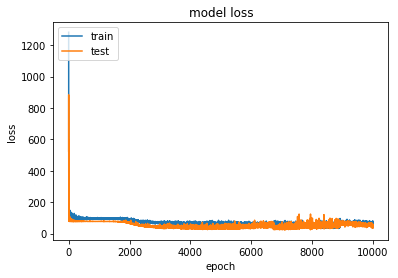

In [16]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig("deltaloss.png")

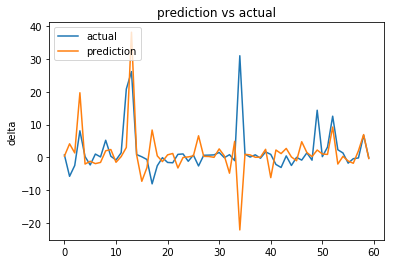

In [17]:
fig = plt.figure()
plt.plot(y_test)
plt.plot(model.predict(x_test))
plt.title('prediction vs actual')
plt.ylabel('delta')
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()

fig.savefig("deltaincrease.png")